Hiring Model ipums@umn.edu Thu, Nov 28, 12:31 PM (2 days ago) to me Your Higher Ed extract is ready. To retrieve your data, codebook, and command files, go to the link below. Account: naeemahaz@gmail.com Extract: 2 Link: https://highered.ipums.org/highered-action/extract_requests/download Publications and research reports based on the Higher Ed database must cite it appropriately. The citation should include the following: Minnesota Population Center. IPUMS Higher Ed: Version 1.0 [dataset]. Minneapolis, MN: University of Minnesota, 2016. https://doi.org/10.18128/D100.V1.0 For policy briefs or articles in the popular press that use the Higher Ed database, we recommend that you cite the use of Higher Ed data as follows: Higher Ed, University of Minnesota, www.ipums.org Thank you for your support. Sincerely, The Higher Ed Team

In [96]:
%matplotlib inline
import pandas as pd
import numpy as np
import csv
import pydotplus
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn import tree
import collections
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt
import pydotplus
import os
from sklearn import tree
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
from sklearn import preprocessing 
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz 

import os

from tqdm import tqdm_notebook as tqdm
import time 
for i in tqdm(range(50)):
    time.sleep(0.1)
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.plotting import figure, show
from bokeh.io import output_file
from bokeh.models import ColumnDataSource, CategoricalColorMapper, Div
from bokeh.layouts import gridplot, column
from bokeh.io import output_file, output_notebook
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.layouts import row, column, gridplot
from bokeh.models.widgets import Tabs, Panel
from bokeh.plotting import figure, show
from bokeh.io import output_file
from bokeh.models import ColumnDataSource
import seaborn as sns
import matplotlib.pyplot as plt
import pydotplus as pydot
from sklearn import tree
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_columns', 1000)

In [97]:
empdata = pd.read_csv('employnewdb.csv')
perdata = pd.read_csv('persondata.csv')
edudata = pd.read_csv('education.csv')

C:\Users\Naeemah\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [98]:
empdata.sample(5)

,REFID,YEAR,LABOR_STATUS,HOURS_WORKED,WEEKS_WORKED,HAVE_HEALTH_CARE,HAVE_PENSION,HAVE_PROFIT_SHARE,HAVE_VACATION,LOOKING_FOR_WORK,PARTTIME_BUT_WANT_FULLTIME,PARTTIME_FOR_FAMILY,PARTTIME_NOT_WANT,PARTTIME_NO_FULLTIME,PARTTIME_OTHER,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE,PRINCIPAL_POSITION,PRINCIPAL_MAJOR_GROUP,EMPLOYER_SECTOR,EMPLOYER_SIZE,EMPLOYER_NEW_BUSINESS,EMPLOYER_GOVERNMENT,EMPLOYER_EDUCATION,EMPLOYER_FEDERAL_SUPPORT,EMPLOYER_DEFENSE,EMPLOYER_ENERGY,FEDERAL_HEALTH_SERVICES,FEDERAL_NIH,FEDERAL_NSF,FEDERAL_OTHER,WORK_ACTIVITY,WORK_ACTIVITY_SUM,WORK_ACTIVITY_SECOND,WORK_ACTIVITY_SCEOND_SUM,COMPUTER,DEVELOPMENT_AND_DESIGN,MANAGEMENT_SALES,RESEARCH_AND_DEVELOPMENT,RESEARCH_DEVE_TEACHING,ACTIVITY_RESEARCH,ACTIVITY_TEACHING,WORK_DEVELOPMENT,WORK_DESIGN,WORK_EMPLOYEE_RELATIONS,WORK_MANAGEMENT_ADMIN,WORK_OTHER,WORK_PRODUCTION,WORK_QUALITY_MANAGEMENT,WORK_SALES_MARKETING,WORK_PROFESSIONAL_SERVICES,WORK_TEACHING,WORK_FINANCE,WORK_APPLIED_RESEARCH,WORK_RESEARCH,WORK_COMPUTER_APPLICATIONS,SUPERVISORY_WORK,MEMEBERSHIP,ATTENED_PROFESSIONAL_MEET,SALARY,WORK_OUTSIDE_DEGREE_FOR_FIRST_REASON,WORK_OUTSIDE_DEGREE_FOR_SECOND_REASON,WORK_OUTSIDE_DEGREE_FOR_CAREER_CHANGE,WORK_OUTSIDE_DEGREE_FOR_WORK_COND,WORK_OUTSIDE_DEGREE_FOR_FAMILY,WORK_OUTSIDE_DEGREE_FOR_LOC,WORK_OUTSIDE_DEGREE_FOR_NOT_AVAIL,WORK_OUTSIDE_DEGREE_FOR_OTHER,WORK_OUTSIDE_DEGREE_FOR_PAY_PROMOTE,SATISFACTION_JOB,SATISFACTION_JOB_ADVANCE,SATISFACTION_JOB_BENEFITS,SATISFACTION_JOB_CHALLENGE,SATISFACTION_JOB_INDEP,SATISFACTION_JOB_LOC,SATISFACTION_JOB_RESP,SATISFACTION_JOB_SALARY,SATISFACTION_JOB_SECURITY,SATISFACTION_JOB_CONTRIB_SOCIETY,ATTEND_TRAINING_WORK_RELATE,ATTEND_TRAINING,ATTEND_TRAINING_CHANGE_FIELD,ATTEND_TRAINING_BY_EMPLOYER,ATTEND_TRAINING_CERT,ATTEND_TRAINING_INCREASE_ADV_CUR,ATTEND_TRAINING_OTHER,ATTEND_TRAINING_PERSONAL,ATTEND_TRAINING_ACQUIRE_SKILL,JOB_REQUIRED_TECH_NATURAL_SCIENCES,JOB_REQUIRED_TECH_OTHER,JOB_REQUIRED_TECH_SOCIAL_SCIENCES,NOT_WORKING_LAYOFF,NOT_WORKING_NO_NEED_TO_WORK,NOT_WORKING_NO_JOB,NOT_WORKING_SICK,NOT_WORKING_STUDENT
80924,E11705688,2013,Not in the labor force,None,None,No,No,No,No,No,No,No,No,No,No,No,None,None,Other,None,No,No,No,No,No,No,No,No,No,No,No,No,No Secondary Activity,No Secondary Activity,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1 membership,No,"$9,999,998.00",No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Other,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No
35999,D09544048,2010,Employed,Greater than 40 hours,40-52 weeks,Yes,Yes,No,Yes,No,No,No,No,No,No,Somewhat related,Science and engineering pre-college teachers,Science and engineering related occupations,2 year college or other school system,100-499 employees,No,No,No,No,No,No,No,No,No,No,Teaching,Teaching,Management and Administration,Management and Administration,No,No,Yes,No,Yes,No,Yes,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,Yes,1 membership,No,"$56,000.00",No,No,No,No,No,No,No,No,No,Very satisfied,Somewhat satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Yes,To learn skills needed for a recently acquired...,No,Yes,Yes,No,No,Yes,Yes,Yes,No,No,No,No,No,No,No
36320,D09572080,2010,Employed,Greater than 40 hours,40-52 weeks,Yes,Yes,No,Yes,No,No,No,No,No,No,Closely related,Other social scientists,Social and related scientists,Business or industry,1000-4999 employees,No,No,No,No,No,No,No,No,No,No,Basic research,Research and Development,Development,Research and Development,No,Yes,No,Yes,Yes,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No memberships,No,"$72,000.00",No,No,No,No,No,No,No,No,No,Somewhat dissatisfied,Somewhat dissatisfied,Somewhat satisfied,Somewhat dissatisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat dissatisfied,Somewhat dissatisfied,Yes,To learn skills needed for a recently acquired...,No,Yes,No,No,No,No,No,No,Yes,No,No,No,No,No,No
52747,E11196102,2013,Employed,Greater than 40 hours,4

In [99]:
perdata.sample(5)

,REFID,YEAR,AGE,GENDER,MINORITY,RACE,BIRTH_PLACE,US_CITIZENSHIP,US_CITIZEN_TYPE,TOTAL_CHILDREN
26744,E11128873,2013,27,Female,No,Asian,Not in the US,No,None,None
17606,D09470517,2010,34,Female,Yes,Under-represented minorities,United States,Yes,Born in US or US territories,None
69004,500331758,2010,37,Male,No,Asian,Not in the US,Yes,By naturalization,None
12653,D09129451,2010,39,Female,No,White,United States,Yes,Born in US or US territories,None
78369,500415864,2010,45,Male,No,White,Not in the US,Yes,By naturalization,One child


In [100]:
edudata.sample(5)

,Unnamed: 0,REFID,YEAR,FIELD_MAJOR_GROUP_BACHELOR_DEGREE,HIGHEST_DEGREE,FIELD_MAJOR_HIGHEST_DEGREE,FIELD_MAJOR_GROUP_HIGHEST_DEGREE,RECENT_DEGREE,FIELD_MAJOR_RECENT_DEGREE,FIELD_MAJOR_GROUP_RECENT_DEGREE,STUDENT_STATUS,REASON_EDUCATION_ADVANCE_OPPORTUNITIES,REASON_EDUCATION_BEFORE_CAREER,REASON_EDUCATION_CHANGE_CAREER,REASON_EDUCATION_PERSONAL,REASON_EDUCATION_CERIFICATION,REASON_EDUCATION_BY_EMPLOYER,REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD,REASON_EDUCATION_PAID_BY_EMPLOYER
74931,179515,E11600574,2013,Engineering,Bachelor,"Electrical, electronics and communications eng...",Engineering,Bachelor,"Electrical, electronics and communications eng...",Engineering,None,No,No,No,No,No,No,No,No
57098,161682,E11279601,2013,Social and related sciences,Bachelor,Political and related sciences,Social and related sciences,Bachelor,Political and related sciences,Social and related sciences,None,No,No,No,No,No,No,No,No
88636,257559,2I938KK20,2010,Science and engineering-related fields,Doctorate,Health-related fields,Science and engineering-related fields,No Degree,Health-related fields,Science and engineering-related fields,None,No,No,No,No,No,No,No,No
80075,184659,E11691813,2013,Science and engineering-related fields,Bachelor,Other science and engineering-related,Science and engineering-related fields,Bachelor,Other science and engineering-related,Science and engineering-related fields,None,No,No,No,No,No,No,No,No
33975,48868,D09359314,2010,Engineering,Bachelor,Other engineering,Engineering,Bachelor,Other engineering,Engineering,None,No,No,No,No,No,No,No,No


In [101]:
edudata.columns

Index(['Unnamed: 0', 'REFID', 'YEAR', 'FIELD_MAJOR_GROUP_BACHELOR_DEGREE', 'HIGHEST_DEGREE', 'FIELD_MAJOR_HIGHEST_DEGREE', 'FIELD_MAJOR_GROUP_HIGHEST_DEGREE', 'RECENT_DEGREE', 'FIELD_MAJOR_RECENT_DEGREE', 'FIELD_MAJOR_GROUP_RECENT_DEGREE', 'STUDENT_STATUS', 'REASON_EDUCATION_ADVANCE_OPPORTUNITIES', 'REASON_EDUCATION_BEFORE_CAREER', 'REASON_EDUCATION_CHANGE_CAREER', 'REASON_EDUCATION_PERSONAL', 'REASON_EDUCATION_CERIFICATION', 'REASON_EDUCATION_BY_EMPLOYER', 'REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD', 'REASON_EDUCATION_PAID_BY_EMPLOYER'], dtype='object')

In [102]:
edudata = edudata[['REFID', 'YEAR', 'FIELD_MAJOR_GROUP_BACHELOR_DEGREE', 'HIGHEST_DEGREE', 'FIELD_MAJOR_HIGHEST_DEGREE', 'FIELD_MAJOR_GROUP_HIGHEST_DEGREE', 'RECENT_DEGREE', 'FIELD_MAJOR_RECENT_DEGREE', 'FIELD_MAJOR_GROUP_RECENT_DEGREE', 'STUDENT_STATUS', 'REASON_EDUCATION_ADVANCE_OPPORTUNITIES', 'REASON_EDUCATION_BEFORE_CAREER', 'REASON_EDUCATION_CHANGE_CAREER', 'REASON_EDUCATION_PERSONAL', 'REASON_EDUCATION_CERIFICATION', 'REASON_EDUCATION_BY_EMPLOYER', 'REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD', 'REASON_EDUCATION_PAID_BY_EMPLOYER']]

In [103]:
edudata.sample(5)

,REFID,YEAR,FIELD_MAJOR_GROUP_BACHELOR_DEGREE,HIGHEST_DEGREE,FIELD_MAJOR_HIGHEST_DEGREE,FIELD_MAJOR_GROUP_HIGHEST_DEGREE,RECENT_DEGREE,FIELD_MAJOR_RECENT_DEGREE,FIELD_MAJOR_GROUP_RECENT_DEGREE,STUDENT_STATUS,REASON_EDUCATION_ADVANCE_OPPORTUNITIES,REASON_EDUCATION_BEFORE_CAREER,REASON_EDUCATION_CHANGE_CAREER,REASON_EDUCATION_PERSONAL,REASON_EDUCATION_CERIFICATION,REASON_EDUCATION_BY_EMPLOYER,REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD,REASON_EDUCATION_PAID_BY_EMPLOYER
71133,E11534294,2013,Science and engineering-related fields,Bachelor,Other science and engineering-related,Science and engineering-related fields,Bachelor,Other science and engineering-related,Science and engineering-related fields,None,No,No,No,No,No,No,No,No
25691,A06469399,2010,Computer and mathematical sciences,Master,Computer and mathematical science,Computer and mathematical sciences,Master,Computer and mathematical science,Computer and mathematical sciences,None,No,No,No,No,No,No,No,No
69008,E11496163,2013,Engineering,Master,"Electrical, electronics and communications eng...",Engineering,Master,"Electrical, electronics and communications eng...",Engineering,None,No,No,No,No,No,No,No,No
53407,E11208428,2013,Non-science and engineering fields,Master,Psychology,Social and related sciences,Master,Psychology,Social and related sciences,None,No,No,No,No,No,No,No,No
13792,500427838,2010,Social and related sciences,Professional,Other non-science and engineering,Non-science and engineering fields,Professional,Other non-science and engineering,Non-science and engineering fields,None,No,No,No,No,No,No,No,No


In [104]:
allnewdataperedu = pd.merge(left=perdata, right=edudata, left_on='REFID', right_on='REFID')

In [105]:
allnewdataperedu.sample(5)

,REFID,YEAR_x,AGE,GENDER,MINORITY,RACE,BIRTH_PLACE,US_CITIZENSHIP,US_CITIZEN_TYPE,TOTAL_CHILDREN,YEAR_y,FIELD_MAJOR_GROUP_BACHELOR_DEGREE,HIGHEST_DEGREE,FIELD_MAJOR_HIGHEST_DEGREE,FIELD_MAJOR_GROUP_HIGHEST_DEGREE,RECENT_DEGREE,FIELD_MAJOR_RECENT_DEGREE,FIELD_MAJOR_GROUP_RECENT_DEGREE,STUDENT_STATUS,REASON_EDUCATION_ADVANCE_OPPORTUNITIES,REASON_EDUCATION_BEFORE_CAREER,REASON_EDUCATION_CHANGE_CAREER,REASON_EDUCATION_PERSONAL,REASON_EDUCATION_CERIFICATION,REASON_EDUCATION_BY_EMPLOYER,REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD,REASON_EDUCATION_PAID_BY_EMPLOYER
82298,500453543,2010,53,Male,No,White,United States,Yes,Born in US or US territories,None,2010,Social and related sciences,Master,Political and related sciences,Social and related sciences,Master,Political and related sciences,Social and related sciences,None,No,No,No,No,No,No,No,No
23719,E11071354,2013,28,Male,No,White,United States,Yes,Born in US or US territories,None,2013,Computer and mathematical sciences,Bachelor,Computer and mathematical science,Computer and mathematical sciences,Bachelor,Computer and mathematical science,Computer and mathematical sciences,Part-Time,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
15736,D09343888,2013,28,Female,No,White,United States,Yes,Born in US or US territories,Two or more children,2013,Science and engineering-related fields,Master,Health-related fields,Science and engineering-related fields,Master,Health-related fields,Science and engineering-related fields,None,No,No,No,No,No,No,No,No
60454,E11736493,2013,41,Female,Yes,Under-represented minorities,Not in the US,Yes,By naturalization,None,2013,Non-science and engineering fields,Bachelor,Health-related fields,Science and engineering-related fields,Bachelor,Health-related fields,Science and engineering-related fields,None,No,No,No,No,No,No,No,No
65740,E11828753,2013,27,Male,No,White,Not in the US,No,None,None,2013,"Biological, agricultural and environmental lif...",Bachelor,Biological sciences,"Biological, agricultural and environmental lif...",Bachelor,Biological sciences,"Biological, agricultural and environmental lif...",None,No,No,No,No,No,No,No,No


In [106]:
allnewdatame = pd.merge(left=allnewdataperedu, right=empdata, left_on='REFID', right_on='REFID')

In [107]:
allnewdatame.sample(5)

,REFID,YEAR_x,AGE,GENDER,MINORITY,RACE,BIRTH_PLACE,US_CITIZENSHIP,US_CITIZEN_TYPE,TOTAL_CHILDREN,YEAR_y,FIELD_MAJOR_GROUP_BACHELOR_DEGREE,HIGHEST_DEGREE,FIELD_MAJOR_HIGHEST_DEGREE,FIELD_MAJOR_GROUP_HIGHEST_DEGREE,RECENT_DEGREE,FIELD_MAJOR_RECENT_DEGREE,FIELD_MAJOR_GROUP_RECENT_DEGREE,STUDENT_STATUS,REASON_EDUCATION_ADVANCE_OPPORTUNITIES,REASON_EDUCATION_BEFORE_CAREER,REASON_EDUCATION_CHANGE_CAREER,REASON_EDUCATION_PERSONAL,REASON_EDUCATION_CERIFICATION,REASON_EDUCATION_BY_EMPLOYER,REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD,REASON_EDUCATION_PAID_BY_EMPLOYER,YEAR,LABOR_STATUS,HOURS_WORKED,WEEKS_WORKED,HAVE_HEALTH_CARE,HAVE_PENSION,HAVE_PROFIT_SHARE,HAVE_VACATION,LOOKING_FOR_WORK,PARTTIME_BUT_WANT_FULLTIME,PARTTIME_FOR_FAMILY,PARTTIME_NOT_WANT,PARTTIME_NO_FULLTIME,PARTTIME_OTHER,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE,PRINCIPAL_POSITION,PRINCIPAL_MAJOR_GROUP,EMPLOYER_SECTOR,EMPLOYER_SIZE,EMPLOYER_NEW_BUSINESS,EMPLOYER_GOVERNMENT,EMPLOYER_EDUCATION,EMPLOYER_FEDERAL_SUPPORT,EMPLOYER_DEFENSE,EMPLOYER_ENERGY,FEDERAL_HEALTH_SERVICES,FEDERAL_NIH,FEDERAL_NSF,FEDERAL_OTHER,WORK_ACTIVITY,WORK_ACTIVITY_SUM,WORK_ACTIVITY_SECOND,WORK_ACTIVITY_SCEOND_SUM,COMPUTER,DEVELOPMENT_AND_DESIGN,MANAGEMENT_SALES,RESEARCH_AND_DEVELOPMENT,RESEARCH_DEVE_TEACHING,ACTIVITY_RESEARCH,ACTIVITY_TEACHING,WORK_DEVELOPMENT,WORK_DESIGN,WORK_EMPLOYEE_RELATIONS,WORK_MANAGEMENT_ADMIN,WORK_OTHER,WORK_PRODUCTION,WORK_QUALITY_MANAGEMENT,WORK_SALES_MARKETING,WORK_PROFESSIONAL_SERVICES,WORK_TEACHING,WORK_FINANCE,WORK_APPLIED_RESEARCH,WORK_RESEARCH,WORK_COMPUTER_APPLICATIONS,SUPERVISORY_WORK,MEMEBERSHIP,ATTENED_PROFESSIONAL_MEET,SALARY,WORK_OUTSIDE_DEGREE_FOR_FIRST_REASON,WORK_OUTSIDE_DEGREE_FOR_SECOND_REASON,WORK_OUTSIDE_DEGREE_FOR_CAREER_CHANGE,WORK_OUTSIDE_DEGREE_FOR_WORK_COND,WORK_OUTSIDE_DEGREE_FOR_FAMILY,WORK_OUTSIDE_DEGREE_FOR_LOC,WORK_OUTSIDE_DEGREE_FOR_NOT_AVAIL,WORK_OUTSIDE_DEGREE_FOR_OTHER,WORK_OUTSIDE_DEGREE_FOR_PAY_PROMOTE,SATISFACTION_JOB,SATISFACTION_JOB_ADVANCE,SATISFACTION_JOB_BENEFITS,SATISFACTION_JOB_CHALLENGE,SATISFACTION_JOB_INDEP,SATISFACTION_JOB_LOC,SATISFACTION_JOB_RESP,SATISFACTION_JOB_SALARY,SATISFACTION_JOB_SECURITY,SATISFACTION_JOB_CONTRIB_SOCIETY,ATTEND_TRAINING_WORK_RELATE,ATTEND_TRAINING,ATTEND_TRAINING_CHANGE_FIELD,ATTEND_TRAINING_BY_EMPLOYER,ATTEND_TRAINING_CERT,ATTEND_TRAINING_INCREASE_ADV_CUR,ATTEND_TRAINING_OTHER,ATTEND_TRAINING_PERSONAL,ATTEND_TRAINING_ACQUIRE_SKILL,JOB_REQUIRED_TECH_NATURAL_SCIENCES,JOB_REQUIRED_TECH_OTHER,JOB_REQUIRED_TECH_SOCIAL_SCIENCES,NOT_WORKING_LAYOFF,NOT_WORKING_NO_NEED_TO_WORK,NOT_WORKING_NO_JOB,NOT_WORKING_SICK,NOT_WORKING_STUDENT
68473,500476832,2010,75,Male,No,White,United States,Yes,Born in US or US territories,None,2010,Physical and related sciences,Bachelor,"Chemistry, except biochemistry",Physical and related sciences,Bachelor,"Chemistry, except biochemistry",Physical and related sciences,None,No,No,No,No,No,No,No,No,2010,Not in the labor force,None,None,No,No,No,No,No,No,No,No,No,No,No,None,None,Other,None,No,No,No,No,No,No,No,No,No,No,No,No,No Secondary Activity,No Secondary Activity,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,2 memberships,Yes,"$9,999,998.00",No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Other,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No
69683,500487386,2010,73,Male,No,White,United States,Yes,Born in US or US territories,None,2010,Computer and mathematical sciences,Bachelor,Computer and mathematical science,Computer and mathematical sciences,Bachelor,Computer and mathematical science,Computer and mathematical sciences,None,No,No,No,No,No,No,No,No,2010,Not in the labor force,None,None,No,No,No,No,No,No,No,No,No,No,No,None,None,Other,None,No,No,No,No,No,No,No,No,No,No,No,No,No Secondary Activity,No Secondary Activity,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No memberships,No,"$9,999,998.00",No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Other,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No
36789,E11317062,2013,45,Male,

In [108]:
print(allnewdatame.columns.values)

['REFID' 'YEAR_x' 'AGE' 'GENDER' 'MINORITY' 'RACE' 'BIRTH_PLACE'
 'US_CITIZENSHIP' 'US_CITIZEN_TYPE' 'TOTAL_CHILDREN' 'YEAR_y'
 'FIELD_MAJOR_GROUP_BACHELOR_DEGREE' 'HIGHEST_DEGREE'
 'FIELD_MAJOR_HIGHEST_DEGREE' 'FIELD_MAJOR_GROUP_HIGHEST_DEGREE'
 'RECENT_DEGREE' 'FIELD_MAJOR_RECENT_DEGREE'
 'FIELD_MAJOR_GROUP_RECENT_DEGREE' 'STUDENT_STATUS'
 'REASON_EDUCATION_ADVANCE_OPPORTUNITIES' 'REASON_EDUCATION_BEFORE_CAREER'
 'REASON_EDUCATION_CHANGE_CAREER' 'REASON_EDUCATION_PERSONAL'
 'REASON_EDUCATION_CERIFICATION' 'REASON_EDUCATION_BY_EMPLOYER'
 'REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD'
 'REASON_EDUCATION_PAID_BY_EMPLOYER' 'YEAR' 'LABOR_STATUS' 'HOURS_WORKED'
 'WEEKS_WORKED' 'HAVE_HEALTH_CARE' 'HAVE_PENSION' 'HAVE_PROFIT_SHARE'
 'HAVE_VACATION' 'LOOKING_FOR_WORK' 'PARTTIME_BUT_WANT_FULLTIME'
 'PARTTIME_FOR_FAMILY' 'PARTTIME_NOT_WANT' 'PARTTIME_NO_FULLTIME'
 'PARTTIME_OTHER' 'PRINCIPAL_POSITION_RELATED_HIGH_DEGREE'
 'PRINCIPAL_POSITION' 'PRINCIPAL_MAJOR_GROUP' 'EMPLOYER_SECTOR'
 'EMPLOYER_SIZE

In [109]:
allnewdatanow = allnewdatame[['REFID', 'YEAR', 'AGE', 'GENDER', 'RACE', 'BIRTH_PLACE',
 'US_CITIZENSHIP','US_CITIZEN_TYPE','TOTAL_CHILDREN',
 'FIELD_MAJOR_GROUP_BACHELOR_DEGREE','HIGHEST_DEGREE',
 'FIELD_MAJOR_HIGHEST_DEGREE','FIELD_MAJOR_GROUP_HIGHEST_DEGREE',
 'RECENT_DEGREE','FIELD_MAJOR_RECENT_DEGREE',
 'FIELD_MAJOR_GROUP_RECENT_DEGREE','STUDENT_STATUS',
 'REASON_EDUCATION_ADVANCE_OPPORTUNITIES','REASON_EDUCATION_BEFORE_CAREER',
 'REASON_EDUCATION_CHANGE_CAREER','REASON_EDUCATION_PERSONAL',
 'REASON_EDUCATION_CERIFICATION','REASON_EDUCATION_BY_EMPLOYER',
 'REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD',
 'REASON_EDUCATION_PAID_BY_EMPLOYER','LABOR_STATUS','HOURS_WORKED',
 'WEEKS_WORKED','HAVE_HEALTH_CARE','HAVE_PENSION','HAVE_PROFIT_SHARE',
 'HAVE_VACATION','LOOKING_FOR_WORK','PARTTIME_BUT_WANT_FULLTIME',
 'PARTTIME_FOR_FAMILY','PARTTIME_NOT_WANT','PARTTIME_NO_FULLTIME',
 'PARTTIME_OTHER','PRINCIPAL_POSITION_RELATED_HIGH_DEGREE',
 'PRINCIPAL_POSITION','PRINCIPAL_MAJOR_GROUP','EMPLOYER_SECTOR',
 'EMPLOYER_SIZE','EMPLOYER_NEW_BUSINESS','EMPLOYER_GOVERNMENT',
 'EMPLOYER_EDUCATION','EMPLOYER_FEDERAL_SUPPORT' ,'EMPLOYER_DEFENSE',
 'EMPLOYER_ENERGY', 'FEDERAL_HEALTH_SERVICES' ,'FEDERAL_NIH', 'FEDERAL_NSF',
 'FEDERAL_OTHER', 'WORK_ACTIVITY', 'WORK_ACTIVITY_SUM',
 'WORK_ACTIVITY_SECOND', 'WORK_ACTIVITY_SCEOND_SUM', 'COMPUTER',
 'DEVELOPMENT_AND_DESIGN', 'MANAGEMENT_SALES', 'RESEARCH_AND_DEVELOPMENT',
 'RESEARCH_DEVE_TEACHING' ,'ACTIVITY_RESEARCH', 'ACTIVITY_TEACHING',
 'WORK_DEVELOPMENT', 'WORK_DESIGN', 'WORK_EMPLOYEE_RELATIONS',
 'WORK_MANAGEMENT_ADMIN', 'WORK_OTHER', 'WORK_PRODUCTION',
 'WORK_QUALITY_MANAGEMENT', 'WORK_SALES_MARKETING',
 'WORK_PROFESSIONAL_SERVICES', 'WORK_TEACHING', 'WORK_FINANCE',
 'WORK_APPLIED_RESEARCH' ,'WORK_RESEARCH', 'WORK_COMPUTER_APPLICATIONS',
 'SUPERVISORY_WORK', 'MEMEBERSHIP', 'ATTENED_PROFESSIONAL_MEET', ' SALARY ',
 'WORK_OUTSIDE_DEGREE_FOR_FIRST_REASON',
 'WORK_OUTSIDE_DEGREE_FOR_SECOND_REASON',
 'WORK_OUTSIDE_DEGREE_FOR_CAREER_CHANGE',
 'WORK_OUTSIDE_DEGREE_FOR_WORK_COND', 'WORK_OUTSIDE_DEGREE_FOR_FAMILY',
 'WORK_OUTSIDE_DEGREE_FOR_LOC', 'WORK_OUTSIDE_DEGREE_FOR_NOT_AVAIL',
 'WORK_OUTSIDE_DEGREE_FOR_OTHER', 'WORK_OUTSIDE_DEGREE_FOR_PAY_PROMOTE',
 'SATISFACTION_JOB', 'SATISFACTION_JOB_ADVANCE', 'SATISFACTION_JOB_BENEFITS',
 'SATISFACTION_JOB_CHALLENGE' , 'SATISFACTION_JOB_INDEP',
 'SATISFACTION_JOB_LOC', 'SATISFACTION_JOB_RESP', 'SATISFACTION_JOB_SALARY',
 'SATISFACTION_JOB_SECURITY', 'SATISFACTION_JOB_CONTRIB_SOCIETY',
 'ATTEND_TRAINING_WORK_RELATE', 'ATTEND_TRAINING',
 'ATTEND_TRAINING_CHANGE_FIELD', 'ATTEND_TRAINING_BY_EMPLOYER',
 'ATTEND_TRAINING_CERT', 'ATTEND_TRAINING_INCREASE_ADV_CUR',
 'ATTEND_TRAINING_OTHER', 'ATTEND_TRAINING_PERSONAL',
 'ATTEND_TRAINING_ACQUIRE_SKILL', 'JOB_REQUIRED_TECH_NATURAL_SCIENCES',
 'JOB_REQUIRED_TECH_OTHER', 'JOB_REQUIRED_TECH_SOCIAL_SCIENCES',
 'NOT_WORKING_LAYOFF', 'NOT_WORKING_NO_NEED_TO_WORK','NOT_WORKING_NO_JOB',
 'NOT_WORKING_SICK', 'NOT_WORKING_STUDENT']]

In [110]:
allnewdatanow.sample(5)

,REFID,YEAR,AGE,GENDER,RACE,BIRTH_PLACE,US_CITIZENSHIP,US_CITIZEN_TYPE,TOTAL_CHILDREN,FIELD_MAJOR_GROUP_BACHELOR_DEGREE,HIGHEST_DEGREE,FIELD_MAJOR_HIGHEST_DEGREE,FIELD_MAJOR_GROUP_HIGHEST_DEGREE,RECENT_DEGREE,FIELD_MAJOR_RECENT_DEGREE,FIELD_MAJOR_GROUP_RECENT_DEGREE,STUDENT_STATUS,REASON_EDUCATION_ADVANCE_OPPORTUNITIES,REASON_EDUCATION_BEFORE_CAREER,REASON_EDUCATION_CHANGE_CAREER,REASON_EDUCATION_PERSONAL,REASON_EDUCATION_CERIFICATION,REASON_EDUCATION_BY_EMPLOYER,REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD,REASON_EDUCATION_PAID_BY_EMPLOYER,LABOR_STATUS,HOURS_WORKED,WEEKS_WORKED,HAVE_HEALTH_CARE,HAVE_PENSION,HAVE_PROFIT_SHARE,HAVE_VACATION,LOOKING_FOR_WORK,PARTTIME_BUT_WANT_FULLTIME,PARTTIME_FOR_FAMILY,PARTTIME_NOT_WANT,PARTTIME_NO_FULLTIME,PARTTIME_OTHER,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE,PRINCIPAL_POSITION,PRINCIPAL_MAJOR_GROUP,EMPLOYER_SECTOR,EMPLOYER_SIZE,EMPLOYER_NEW_BUSINESS,EMPLOYER_GOVERNMENT,EMPLOYER_EDUCATION,EMPLOYER_FEDERAL_SUPPORT,EMPLOYER_DEFENSE,EMPLOYER_ENERGY,FEDERAL_HEALTH_SERVICES,FEDERAL_NIH,FEDERAL_NSF,FEDERAL_OTHER,WORK_ACTIVITY,WORK_ACTIVITY_SUM,WORK_ACTIVITY_SECOND,WORK_ACTIVITY_SCEOND_SUM,COMPUTER,DEVELOPMENT_AND_DESIGN,MANAGEMENT_SALES,RESEARCH_AND_DEVELOPMENT,RESEARCH_DEVE_TEACHING,ACTIVITY_RESEARCH,ACTIVITY_TEACHING,WORK_DEVELOPMENT,WORK_DESIGN,WORK_EMPLOYEE_RELATIONS,WORK_MANAGEMENT_ADMIN,WORK_OTHER,WORK_PRODUCTION,WORK_QUALITY_MANAGEMENT,WORK_SALES_MARKETING,WORK_PROFESSIONAL_SERVICES,WORK_TEACHING,WORK_FINANCE,WORK_APPLIED_RESEARCH,WORK_RESEARCH,WORK_COMPUTER_APPLICATIONS,SUPERVISORY_WORK,MEMEBERSHIP,ATTENED_PROFESSIONAL_MEET,SALARY,WORK_OUTSIDE_DEGREE_FOR_FIRST_REASON,WORK_OUTSIDE_DEGREE_FOR_SECOND_REASON,WORK_OUTSIDE_DEGREE_FOR_CAREER_CHANGE,WORK_OUTSIDE_DEGREE_FOR_WORK_COND,WORK_OUTSIDE_DEGREE_FOR_FAMILY,WORK_OUTSIDE_DEGREE_FOR_LOC,WORK_OUTSIDE_DEGREE_FOR_NOT_AVAIL,WORK_OUTSIDE_DEGREE_FOR_OTHER,WORK_OUTSIDE_DEGREE_FOR_PAY_PROMOTE,SATISFACTION_JOB,SATISFACTION_JOB_ADVANCE,SATISFACTION_JOB_BENEFITS,SATISFACTION_JOB_CHALLENGE,SATISFACTION_JOB_INDEP,SATISFACTION_JOB_LOC,SATISFACTION_JOB_RESP,SATISFACTION_JOB_SALARY,SATISFACTION_JOB_SECURITY,SATISFACTION_JOB_CONTRIB_SOCIETY,ATTEND_TRAINING_WORK_RELATE,ATTEND_TRAINING,ATTEND_TRAINING_CHANGE_FIELD,ATTEND_TRAINING_BY_EMPLOYER,ATTEND_TRAINING_CERT,ATTEND_TRAINING_INCREASE_ADV_CUR,ATTEND_TRAINING_OTHER,ATTEND_TRAINING_PERSONAL,ATTEND_TRAINING_ACQUIRE_SKILL,JOB_REQUIRED_TECH_NATURAL_SCIENCES,JOB_REQUIRED_TECH_OTHER,JOB_REQUIRED_TECH_SOCIAL_SCIENCES,NOT_WORKING_LAYOFF,NOT_WORKING_NO_NEED_TO_WORK,NOT_WORKING_NO_JOB,NOT_WORKING_SICK,NOT_WORKING_STUDENT
25869,E11112612,2013,46,Female,Under-represented minorities,United States,Yes,Born in US or US territories,None,Computer and mathematical sciences,Bachelor,Computer and mathematical science,Computer and mathematical sciences,Bachelor,Computer and mathematical science,Computer and mathematical sciences,None,No,No,No,No,No,No,No,No,Employed,20 or less,40-52 weeks,No,Yes,No,Yes,No,Yes,No,No,Yes,No,Not related,Other Non-science and engineering occupations,Non-science and engineering occupations,Business or industry,5000-24999 employees,No,No,No,No,No,No,No,No,No,No,"Sales, purchasing, marketing",Management and Administration,No Secondary Activity,No Secondary Activity,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,1 membership,No,"$8,000.00",Job in highest degree field not available,"Pay, promotion opportunities",No,No,No,No,Yes,No,Yes,Very dissatisfied,Very dissatisfied,Very dissatisfied,Very dissatisfied,Very dissatisfied,Somewhat dissatisfied,Very dissatisfied,Very dissatisfied,Very dissatisfied,Very dissatisfied,No,Other,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
29326,E11177102,2013,27,Male,White,Not in the US,No,None,None,Social and related sciences,Master,Economics,Social and related sciences,Master,Economics,Social and related sciences,Part-Time,Yes,Yes,No,No,No,No,Yes,No,Employed,20 or less,40-52 weeks,Yes,No,No,No,No,No,No,Yes,No,Yes,Closely related,Postsecondary teachers-Social an

In [111]:
allnewdatanow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73292 entries, 0 to 73291
Columns: 118 entries, REFID to NOT_WORKING_STUDENT
dtypes: int64(2), object(116)
memory usage: 66.5+ MB


In [112]:
allnewdatanow['AGE'] = pd.to_numeric(allnewdatanow['AGE'])

C:\Users\Naeemah\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [113]:
bins = [20, 30,  40,  50,  60,  70,  80]
allnewdatanow['AGE_BINS'] = pd.cut(allnewdatanow['AGE'], bins)

C:\Users\Naeemah\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [114]:
allnewdatanow[' SALARY '] = allnewdatanow[' SALARY '].fillna(0)

C:\Users\Naeemah\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [115]:
allnewdatanow['SALARY_NEW'] = allnewdatanow[' SALARY '].str.replace('$', '')

C:\Users\Naeemah\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [116]:
allnewdatanow['SALARY_NEW'] = allnewdatanow['SALARY_NEW'].str.replace(',', '')

C:\Users\Naeemah\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [117]:
allnewdatanow['SALARY'] = allnewdatanow['SALARY_NEW'].str.replace(' -   ', '')

In [118]:
allnewdatanow = allnewdatanow.drop('SALARY_NEW', axis=1)

In [119]:
allnewdatanow['SALARY'] = pd.to_numeric(allnewdatanow['SALARY'], errors='coerce')

In [120]:
bins = [0,  39999,  40000, 79999,  80000,  200000]
allnewdatanow['SALARY_BINS'] = pd.cut(allnewdatanow['SALARY'], bins)

In [121]:
allnewdatanow = allnewdatanow.drop('SALARY', axis=1)

In [122]:
allnewdatanow = allnewdatanow.drop(' SALARY ', axis=1)

In [123]:
allnewdatanow.sample(5)

,REFID,YEAR,AGE,GENDER,RACE,BIRTH_PLACE,US_CITIZENSHIP,US_CITIZEN_TYPE,TOTAL_CHILDREN,FIELD_MAJOR_GROUP_BACHELOR_DEGREE,HIGHEST_DEGREE,FIELD_MAJOR_HIGHEST_DEGREE,FIELD_MAJOR_GROUP_HIGHEST_DEGREE,RECENT_DEGREE,FIELD_MAJOR_RECENT_DEGREE,FIELD_MAJOR_GROUP_RECENT_DEGREE,STUDENT_STATUS,REASON_EDUCATION_ADVANCE_OPPORTUNITIES,REASON_EDUCATION_BEFORE_CAREER,REASON_EDUCATION_CHANGE_CAREER,REASON_EDUCATION_PERSONAL,REASON_EDUCATION_CERIFICATION,REASON_EDUCATION_BY_EMPLOYER,REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD,REASON_EDUCATION_PAID_BY_EMPLOYER,LABOR_STATUS,HOURS_WORKED,WEEKS_WORKED,HAVE_HEALTH_CARE,HAVE_PENSION,HAVE_PROFIT_SHARE,HAVE_VACATION,LOOKING_FOR_WORK,PARTTIME_BUT_WANT_FULLTIME,PARTTIME_FOR_FAMILY,PARTTIME_NOT_WANT,PARTTIME_NO_FULLTIME,PARTTIME_OTHER,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE,PRINCIPAL_POSITION,PRINCIPAL_MAJOR_GROUP,EMPLOYER_SECTOR,EMPLOYER_SIZE,EMPLOYER_NEW_BUSINESS,EMPLOYER_GOVERNMENT,EMPLOYER_EDUCATION,EMPLOYER_FEDERAL_SUPPORT,EMPLOYER_DEFENSE,EMPLOYER_ENERGY,FEDERAL_HEALTH_SERVICES,FEDERAL_NIH,FEDERAL_NSF,FEDERAL_OTHER,WORK_ACTIVITY,WORK_ACTIVITY_SUM,WORK_ACTIVITY_SECOND,WORK_ACTIVITY_SCEOND_SUM,COMPUTER,DEVELOPMENT_AND_DESIGN,MANAGEMENT_SALES,RESEARCH_AND_DEVELOPMENT,RESEARCH_DEVE_TEACHING,ACTIVITY_RESEARCH,ACTIVITY_TEACHING,WORK_DEVELOPMENT,WORK_DESIGN,WORK_EMPLOYEE_RELATIONS,WORK_MANAGEMENT_ADMIN,WORK_OTHER,WORK_PRODUCTION,WORK_QUALITY_MANAGEMENT,WORK_SALES_MARKETING,WORK_PROFESSIONAL_SERVICES,WORK_TEACHING,WORK_FINANCE,WORK_APPLIED_RESEARCH,WORK_RESEARCH,WORK_COMPUTER_APPLICATIONS,SUPERVISORY_WORK,MEMEBERSHIP,ATTENED_PROFESSIONAL_MEET,WORK_OUTSIDE_DEGREE_FOR_FIRST_REASON,WORK_OUTSIDE_DEGREE_FOR_SECOND_REASON,WORK_OUTSIDE_DEGREE_FOR_CAREER_CHANGE,WORK_OUTSIDE_DEGREE_FOR_WORK_COND,WORK_OUTSIDE_DEGREE_FOR_FAMILY,WORK_OUTSIDE_DEGREE_FOR_LOC,WORK_OUTSIDE_DEGREE_FOR_NOT_AVAIL,WORK_OUTSIDE_DEGREE_FOR_OTHER,WORK_OUTSIDE_DEGREE_FOR_PAY_PROMOTE,SATISFACTION_JOB,SATISFACTION_JOB_ADVANCE,SATISFACTION_JOB_BENEFITS,SATISFACTION_JOB_CHALLENGE,SATISFACTION_JOB_INDEP,SATISFACTION_JOB_LOC,SATISFACTION_JOB_RESP,SATISFACTION_JOB_SALARY,SATISFACTION_JOB_SECURITY,SATISFACTION_JOB_CONTRIB_SOCIETY,ATTEND_TRAINING_WORK_RELATE,ATTEND_TRAINING,ATTEND_TRAINING_CHANGE_FIELD,ATTEND_TRAINING_BY_EMPLOYER,ATTEND_TRAINING_CERT,ATTEND_TRAINING_INCREASE_ADV_CUR,ATTEND_TRAINING_OTHER,ATTEND_TRAINING_PERSONAL,ATTEND_TRAINING_ACQUIRE_SKILL,JOB_REQUIRED_TECH_NATURAL_SCIENCES,JOB_REQUIRED_TECH_OTHER,JOB_REQUIRED_TECH_SOCIAL_SCIENCES,NOT_WORKING_LAYOFF,NOT_WORKING_NO_NEED_TO_WORK,NOT_WORKING_NO_JOB,NOT_WORKING_SICK,NOT_WORKING_STUDENT,AGE_BINS,SALARY_BINS
53444,E11616349,2013,32,Male,White,Not in the US,No,None,None,NaN,Master,Computer and mathematical science,Computer and mathematical sciences,Master,Computer and mathematical science,Computer and mathematical sciences,None,No,No,No,No,No,No,No,No,Employed,36 - 40 hours,40-52 weeks,Yes,Yes,No,Yes,No,No,No,No,No,No,Closely related,Computer scientists and mathematicians,Computer and mathematical scientists,Business or industry,25000+ employees,No,No,No,No,No,No,No,No,No,No,"Design of equipment, processes, structures, mo...",Computer Applications,No Secondary Activity,No Secondary Activity,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No memberships,No,No,No,No,No,No,No,No,No,No,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Very satisfied,Somewhat satisfied,No,Other,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,"(30, 40]","(79999.0, 80000.0]"
65683,E11827821,2013,27,Female,White,United States,Yes,Born in US or US territories,None,Social and related sciences,Master,Psychology,Social and related sciences,Master,Psychology,Social and related sciences,None,No,No,No,No,No,No,No,No,Employed,Greater than 40 hours,40-52 weeks,Yes,Yes,No,Yes,No,No,No,No,No,No,Closely related,Psychologists,Social and related scientists,Business or industry,25-99 employees,No,Yes,Yes,No,No,No,No,No,No,

In [124]:
allnewdatanow = allnewdatanow.drop(['STUDENT_STATUS','LABOR_STATUS','LOOKING_FOR_WORK','PARTTIME_BUT_WANT_FULLTIME','PARTTIME_FOR_FAMILY','PARTTIME_NOT_WANT','PARTTIME_NO_FULLTIME','PARTTIME_OTHER','JOB_REQUIRED_TECH_NATURAL_SCIENCES','JOB_REQUIRED_TECH_OTHER','JOB_REQUIRED_TECH_SOCIAL_SCIENCES','NOT_WORKING_LAYOFF','NOT_WORKING_NO_NEED_TO_WORK','NOT_WORKING_NO_JOB','NOT_WORKING_SICK','NOT_WORKING_STUDENT'], axis=1)

In [125]:
allnewdatanow.sample(5)

,REFID,YEAR,AGE,GENDER,RACE,BIRTH_PLACE,US_CITIZENSHIP,US_CITIZEN_TYPE,TOTAL_CHILDREN,FIELD_MAJOR_GROUP_BACHELOR_DEGREE,HIGHEST_DEGREE,FIELD_MAJOR_HIGHEST_DEGREE,FIELD_MAJOR_GROUP_HIGHEST_DEGREE,RECENT_DEGREE,FIELD_MAJOR_RECENT_DEGREE,FIELD_MAJOR_GROUP_RECENT_DEGREE,REASON_EDUCATION_ADVANCE_OPPORTUNITIES,REASON_EDUCATION_BEFORE_CAREER,REASON_EDUCATION_CHANGE_CAREER,REASON_EDUCATION_PERSONAL,REASON_EDUCATION_CERIFICATION,REASON_EDUCATION_BY_EMPLOYER,REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD,REASON_EDUCATION_PAID_BY_EMPLOYER,HOURS_WORKED,WEEKS_WORKED,HAVE_HEALTH_CARE,HAVE_PENSION,HAVE_PROFIT_SHARE,HAVE_VACATION,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE,PRINCIPAL_POSITION,PRINCIPAL_MAJOR_GROUP,EMPLOYER_SECTOR,EMPLOYER_SIZE,EMPLOYER_NEW_BUSINESS,EMPLOYER_GOVERNMENT,EMPLOYER_EDUCATION,EMPLOYER_FEDERAL_SUPPORT,EMPLOYER_DEFENSE,EMPLOYER_ENERGY,FEDERAL_HEALTH_SERVICES,FEDERAL_NIH,FEDERAL_NSF,FEDERAL_OTHER,WORK_ACTIVITY,WORK_ACTIVITY_SUM,WORK_ACTIVITY_SECOND,WORK_ACTIVITY_SCEOND_SUM,COMPUTER,DEVELOPMENT_AND_DESIGN,MANAGEMENT_SALES,RESEARCH_AND_DEVELOPMENT,RESEARCH_DEVE_TEACHING,ACTIVITY_RESEARCH,ACTIVITY_TEACHING,WORK_DEVELOPMENT,WORK_DESIGN,WORK_EMPLOYEE_RELATIONS,WORK_MANAGEMENT_ADMIN,WORK_OTHER,WORK_PRODUCTION,WORK_QUALITY_MANAGEMENT,WORK_SALES_MARKETING,WORK_PROFESSIONAL_SERVICES,WORK_TEACHING,WORK_FINANCE,WORK_APPLIED_RESEARCH,WORK_RESEARCH,WORK_COMPUTER_APPLICATIONS,SUPERVISORY_WORK,MEMEBERSHIP,ATTENED_PROFESSIONAL_MEET,WORK_OUTSIDE_DEGREE_FOR_FIRST_REASON,WORK_OUTSIDE_DEGREE_FOR_SECOND_REASON,WORK_OUTSIDE_DEGREE_FOR_CAREER_CHANGE,WORK_OUTSIDE_DEGREE_FOR_WORK_COND,WORK_OUTSIDE_DEGREE_FOR_FAMILY,WORK_OUTSIDE_DEGREE_FOR_LOC,WORK_OUTSIDE_DEGREE_FOR_NOT_AVAIL,WORK_OUTSIDE_DEGREE_FOR_OTHER,WORK_OUTSIDE_DEGREE_FOR_PAY_PROMOTE,SATISFACTION_JOB,SATISFACTION_JOB_ADVANCE,SATISFACTION_JOB_BENEFITS,SATISFACTION_JOB_CHALLENGE,SATISFACTION_JOB_INDEP,SATISFACTION_JOB_LOC,SATISFACTION_JOB_RESP,SATISFACTION_JOB_SALARY,SATISFACTION_JOB_SECURITY,SATISFACTION_JOB_CONTRIB_SOCIETY,ATTEND_TRAINING_WORK_RELATE,ATTEND_TRAINING,ATTEND_TRAINING_CHANGE_FIELD,ATTEND_TRAINING_BY_EMPLOYER,ATTEND_TRAINING_CERT,ATTEND_TRAINING_INCREASE_ADV_CUR,ATTEND_TRAINING_OTHER,ATTEND_TRAINING_PERSONAL,ATTEND_TRAINING_ACQUIRE_SKILL,AGE_BINS,SALARY_BINS
27033,E11134442,2013,44,Male,White,United States,Yes,Born in US or US territories,Two or more children,Social and related sciences,Bachelor,Psychology,Social and related sciences,Bachelor,Psychology,Social and related sciences,No,No,No,No,No,No,No,No,36 - 40 hours,40-52 weeks,Yes,Yes,No,Yes,Not related,Health-related occupations,Science and engineering related occupations,Business or industry,25000+ employees,No,No,No,No,No,No,No,No,No,No,Professional services,Other,Management and Administration,Management and Administration,No,No,Yes,No,No,No,No,No,No,Yes,Yes,No,No,Yes,No,Yes,Yes,No,Yes,No,No,Yes,No memberships,No,"Pay, promotion opportunities",Job in highest degree field not available,No,No,No,No,Yes,No,Yes,Very dissatisfied,Somewhat dissatisfied,Somewhat dissatisfied,Very satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat dissatisfied,Somewhat satisfied,Somewhat dissatisfied,Very satisfied,Yes,To learn skills needed for a recently acquired...,No,Yes,Yes,No,No,No,Yes,"(40, 50]","(40000, 79999]"
21417,E11028222,2013,27,Male,White,United States,Yes,Born in US or US territories,None,Computer and mathematical sciences,Bachelor,Computer and mathematical science,Computer and mathematical sciences,Bachelor,Computer and mathematical science,Computer and mathematical sciences,No,No,No,No,No,No,No,No,36 - 40 hours,40-52 weeks,Yes,Yes,No,Yes,Closely related,Computer scientists and mathematicians,Computer and mathematical scientists,Business or industry,500-999 employees,No,No,No,No,No,No,No,No,No,No,"Design of equipment, processes, structures, mo...",Computer Applications,Basic research,Research and Development,Yes,No,No,Yes,Yes,Yes,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,No,No memberships,No,No,No,No,No,No,No,No,No,No,Very s

In [126]:
allnewdatanow = allnewdatanow[allnewdatanow['SATISFACTION_JOB']!='No']
allnewdatanow = allnewdatanow[allnewdatanow['SATISFACTION_JOB_ADVANCE']!='No']
allnewdatanow = allnewdatanow[allnewdatanow['SATISFACTION_JOB_BENEFITS']!='No']
allnewdatanow = allnewdatanow[allnewdatanow['SATISFACTION_JOB_CHALLENGE']!='No']
allnewdatanow = allnewdatanow[allnewdatanow['SATISFACTION_JOB_INDEP']!='No']
allnewdatanow = allnewdatanow[allnewdatanow['SATISFACTION_JOB_LOC']!='No']
allnewdatanow = allnewdatanow[allnewdatanow['SATISFACTION_JOB_RESP']!='No']
allnewdatanow = allnewdatanow[allnewdatanow['SATISFACTION_JOB_SALARY']!='No']
allnewdatanow = allnewdatanow[allnewdatanow['SATISFACTION_JOB_SECURITY']!='No']
allnewdatanow = allnewdatanow[allnewdatanow['SATISFACTION_JOB_CONTRIB_SOCIETY']!='No']

In [127]:
print(allnewdatanow.columns.values)

['REFID' 'YEAR' 'AGE' 'GENDER' 'RACE' 'BIRTH_PLACE' 'US_CITIZENSHIP'
 'US_CITIZEN_TYPE' 'TOTAL_CHILDREN' 'FIELD_MAJOR_GROUP_BACHELOR_DEGREE'
 'HIGHEST_DEGREE' 'FIELD_MAJOR_HIGHEST_DEGREE'
 'FIELD_MAJOR_GROUP_HIGHEST_DEGREE' 'RECENT_DEGREE'
 'FIELD_MAJOR_RECENT_DEGREE' 'FIELD_MAJOR_GROUP_RECENT_DEGREE'
 'REASON_EDUCATION_ADVANCE_OPPORTUNITIES' 'REASON_EDUCATION_BEFORE_CAREER'
 'REASON_EDUCATION_CHANGE_CAREER' 'REASON_EDUCATION_PERSONAL'
 'REASON_EDUCATION_CERIFICATION' 'REASON_EDUCATION_BY_EMPLOYER'
 'REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD'
 'REASON_EDUCATION_PAID_BY_EMPLOYER' 'HOURS_WORKED' 'WEEKS_WORKED'
 'HAVE_HEALTH_CARE' 'HAVE_PENSION' 'HAVE_PROFIT_SHARE' 'HAVE_VACATION'
 'PRINCIPAL_POSITION_RELATED_HIGH_DEGREE' 'PRINCIPAL_POSITION'
 'PRINCIPAL_MAJOR_GROUP' 'EMPLOYER_SECTOR' 'EMPLOYER_SIZE'
 'EMPLOYER_NEW_BUSINESS' 'EMPLOYER_GOVERNMENT' 'EMPLOYER_EDUCATION'
 'EMPLOYER_FEDERAL_SUPPORT' 'EMPLOYER_DEFENSE' 'EMPLOYER_ENERGY'
 'FEDERAL_HEALTH_SERVICES' 'FEDERAL_NIH' 'FEDERAL_NSF' 'FEDE

In [128]:
allnewdatanow['RECENT_DEGREE'].fillna("No Degree")

0        No Degree
1        No Degree
2        No Degree
3        No Degree
4        No Degree
5        No Degree
6        No Degree
7        No Degree
8        No Degree
9        No Degree
10       No Degree
11       No Degree
12       No Degree
13       No Degree
14       No Degree
15       No Degree
16       No Degree
17       No Degree
18       No Degree
19       No Degree
20       No Degree
21       No Degree
22       No Degree
23       No Degree
24       No Degree
25       No Degree
26       No Degree
27       No Degree
28       No Degree
29       No Degree
           ...    
73260     Bachelor
73261     Bachelor
73262       Master
73263     Bachelor
73264     Bachelor
73265       Master
73266       Master
73267       Master
73269       Master
73270       Master
73271       Master
73272       Master
73273     Bachelor
73274       Master
73275     Bachelor
73276       Master
73277     Bachelor
73279     Bachelor
73280       Master
73281     Bachelor
73282       Master
73283       

In [129]:
allnewdatanow.isnull().sum()

REFID                                         0
YEAR                                          0
AGE                                           0
GENDER                                        0
RACE                                          0
BIRTH_PLACE                                   0
US_CITIZENSHIP                                0
US_CITIZEN_TYPE                               0
TOTAL_CHILDREN                                0
FIELD_MAJOR_GROUP_BACHELOR_DEGREE          2117
HIGHEST_DEGREE                                0
FIELD_MAJOR_HIGHEST_DEGREE                    0
FIELD_MAJOR_GROUP_HIGHEST_DEGREE              0
RECENT_DEGREE                                 0
FIELD_MAJOR_RECENT_DEGREE                  1068
FIELD_MAJOR_GROUP_RECENT_DEGREE               0
REASON_EDUCATION_ADVANCE_OPPORTUNITIES        0
REASON_EDUCATION_BEFORE_CAREER                0
REASON_EDUCATION_CHANGE_CAREER                0
REASON_EDUCATION_PERSONAL                     0
REASON_EDUCATION_CERIFICATION           

In [130]:
allnewdatanow['FIELD_MAJOR_RECENT_DEGREE'].fillna("No Degree")

0                                    Physics and astronomy
1                                                No Degree
2                               Sociology and anthropology
3                           Political and related sciences
4                                                Economics
5                                        Other engineering
6                                        Other engineering
7                                        Other engineering
8                                      Biological sciences
9                           Chemistry, except biochemistry
10                                       Other engineering
11                                  Mechanical engineering
12                              Sociology and anthropology
13                       Computer and mathematical science
14                                     Biological sciences
15                              Sociology and anthropology
16                                  Mechanical engineeri

In [131]:
allnewdatanow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62373 entries, 0 to 73291
Columns: 103 entries, REFID to SALARY_BINS
dtypes: category(2), int64(2), object(99)
memory usage: 48.7+ MB


# INFORMATON ABOUT YEAR OF SAMPLE AND AGE

In [132]:
allnewdatanow.describe()

,YEAR,AGE
count,62373.000000,62373.000000
mean,2012.035448,39.954179
std,1.401188,12.476050
min,2010.000000,23.000000
25%,2010.000000,29.000000
50%,2013.000000,36.000000
75%,2013.000000,50.000000
max,2013.000000,75.000000


In [133]:
allnewdatanow.head(5)

,REFID,YEAR,AGE,GENDER,RACE,BIRTH_PLACE,US_CITIZENSHIP,US_CITIZEN_TYPE,TOTAL_CHILDREN,FIELD_MAJOR_GROUP_BACHELOR_DEGREE,HIGHEST_DEGREE,FIELD_MAJOR_HIGHEST_DEGREE,FIELD_MAJOR_GROUP_HIGHEST_DEGREE,RECENT_DEGREE,FIELD_MAJOR_RECENT_DEGREE,FIELD_MAJOR_GROUP_RECENT_DEGREE,REASON_EDUCATION_ADVANCE_OPPORTUNITIES,REASON_EDUCATION_BEFORE_CAREER,REASON_EDUCATION_CHANGE_CAREER,REASON_EDUCATION_PERSONAL,REASON_EDUCATION_CERIFICATION,REASON_EDUCATION_BY_EMPLOYER,REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD,REASON_EDUCATION_PAID_BY_EMPLOYER,HOURS_WORKED,WEEKS_WORKED,HAVE_HEALTH_CARE,HAVE_PENSION,HAVE_PROFIT_SHARE,HAVE_VACATION,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE,PRINCIPAL_POSITION,PRINCIPAL_MAJOR_GROUP,EMPLOYER_SECTOR,EMPLOYER_SIZE,EMPLOYER_NEW_BUSINESS,EMPLOYER_GOVERNMENT,EMPLOYER_EDUCATION,EMPLOYER_FEDERAL_SUPPORT,EMPLOYER_DEFENSE,EMPLOYER_ENERGY,FEDERAL_HEALTH_SERVICES,FEDERAL_NIH,FEDERAL_NSF,FEDERAL_OTHER,WORK_ACTIVITY,WORK_ACTIVITY_SUM,WORK_ACTIVITY_SECOND,WORK_ACTIVITY_SCEOND_SUM,COMPUTER,DEVELOPMENT_AND_DESIGN,MANAGEMENT_SALES,RESEARCH_AND_DEVELOPMENT,RESEARCH_DEVE_TEACHING,ACTIVITY_RESEARCH,ACTIVITY_TEACHING,WORK_DEVELOPMENT,WORK_DESIGN,WORK_EMPLOYEE_RELATIONS,WORK_MANAGEMENT_ADMIN,WORK_OTHER,WORK_PRODUCTION,WORK_QUALITY_MANAGEMENT,WORK_SALES_MARKETING,WORK_PROFESSIONAL_SERVICES,WORK_TEACHING,WORK_FINANCE,WORK_APPLIED_RESEARCH,WORK_RESEARCH,WORK_COMPUTER_APPLICATIONS,SUPERVISORY_WORK,MEMEBERSHIP,ATTENED_PROFESSIONAL_MEET,WORK_OUTSIDE_DEGREE_FOR_FIRST_REASON,WORK_OUTSIDE_DEGREE_FOR_SECOND_REASON,WORK_OUTSIDE_DEGREE_FOR_CAREER_CHANGE,WORK_OUTSIDE_DEGREE_FOR_WORK_COND,WORK_OUTSIDE_DEGREE_FOR_FAMILY,WORK_OUTSIDE_DEGREE_FOR_LOC,WORK_OUTSIDE_DEGREE_FOR_NOT_AVAIL,WORK_OUTSIDE_DEGREE_FOR_OTHER,WORK_OUTSIDE_DEGREE_FOR_PAY_PROMOTE,SATISFACTION_JOB,SATISFACTION_JOB_ADVANCE,SATISFACTION_JOB_BENEFITS,SATISFACTION_JOB_CHALLENGE,SATISFACTION_JOB_INDEP,SATISFACTION_JOB_LOC,SATISFACTION_JOB_RESP,SATISFACTION_JOB_SALARY,SATISFACTION_JOB_SECURITY,SATISFACTION_JOB_CONTRIB_SOCIETY,ATTEND_TRAINING_WORK_RELATE,ATTEND_TRAINING,ATTEND_TRAINING_CHANGE_FIELD,ATTEND_TRAINING_BY_EMPLOYER,ATTEND_TRAINING_CERT,ATTEND_TRAINING_INCREASE_ADV_CUR,ATTEND_TRAINING_OTHER,ATTEND_TRAINING_PERSONAL,ATTEND_TRAINING_ACQUIRE_SKILL,AGE_BINS,SALARY_BINS
0,20901QY86,2010,37,Male,Asian,Not in the US,No,None,One child,Physical and related sciences,Doctorate,Physics and astronomy,Physical and related sciences,No Degree,Physics and astronomy,Physical and related sciences,No,No,No,No,No,No,No,No,36 - 40 hours,40-52 weeks,Yes,Yes,No,Yes,Closely related,Physicists and astronomers,Physical and related scientists,4 year college or medical institution,100-499 employees,No,No,No,No,No,No,No,No,No,No,Applied research,Research and Development,Management and Administration,Management and Administration,No,No,Yes,Yes,Yes,Yes,No,No,No,No,Yes,No,No,No,No,Yes,Yes,No,No,Yes,No,Yes,3 memberships,Yes,No,No,No,No,No,No,No,No,No,Very satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Very satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,No,Other,No,No,No,No,No,No,No,"(30, 40]","(79999, 80000]"
1,20902AN23,2013,44,Male,White,Not in the US,No,None,Two or more children,Physical and related sciences,Doctorate,Other physical and related sciences,Physical and related sciences,No Degree,NaN,Physical and related sciences,No,No,No,No,No,No,No,No,Greater than 40 hours,40-52 weeks,Yes,Yes,No,Yes,Closely related,Physicists and astronomers,Physical and related scientists,Non-US government,5000-24999 employees,No,No,No,No,No,No,No,No,No,No,Management and Administration,Management and Administration,"Computer applications, programming, systems de...",Research and Development,No,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No memberships,No,No,No,No,No,No,No,No,No,No,Very satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Somewhat satisfied,

# SAMPLE YEARS

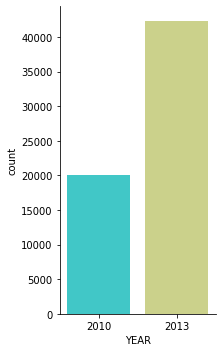

In [134]:
sns.catplot(x="YEAR",
               data=allnewdatanow, kind="count", palette='rainbow',
               height=5, aspect=0.6)

# RACE, GENDER, DEGREE

In [135]:
allnewdatanow.pivot_table(index=['GENDER','RACE'], values=['REFID'], aggfunc='count')

REFID
GENDER RACE                               
Female Asian                          4358
       Under-represented minorities   7552
       White                         15414
Male   Asian                          6420
       Under-represented minorities   6826
       White                         21803

In [136]:
allnewdatanow.pivot_table(index=['GENDER','RECENT_DEGREE'], values=['REFID'], aggfunc='count')

REFID
GENDER RECENT_DEGREE       
Female Bachelor       13777
       Doctorate        791
       Master         11064
       No Degree        457
       Professional    1235
Male   Bachelor       19564
       Doctorate       1174
       Master         11664
       No Degree        972
       Professional    1675

In [137]:
allnewdatanow.pivot_table(index=['RACE','RECENT_DEGREE'], values=['REFID'], aggfunc='count')

REFID
RACE                         RECENT_DEGREE       
Asian                        Bachelor        4720
                             Doctorate        524
                             Master          4362
                             No Degree        683
                             Professional     489
Under-represented minorities Bachelor        8358
                             Doctorate        324
                             Master          4863
                             No Degree        231
                             Professional     602
White                        Bachelor       20263
                             Doctorate       1117
                             Master         13503
                             No Degree        515
                             Professional    1819

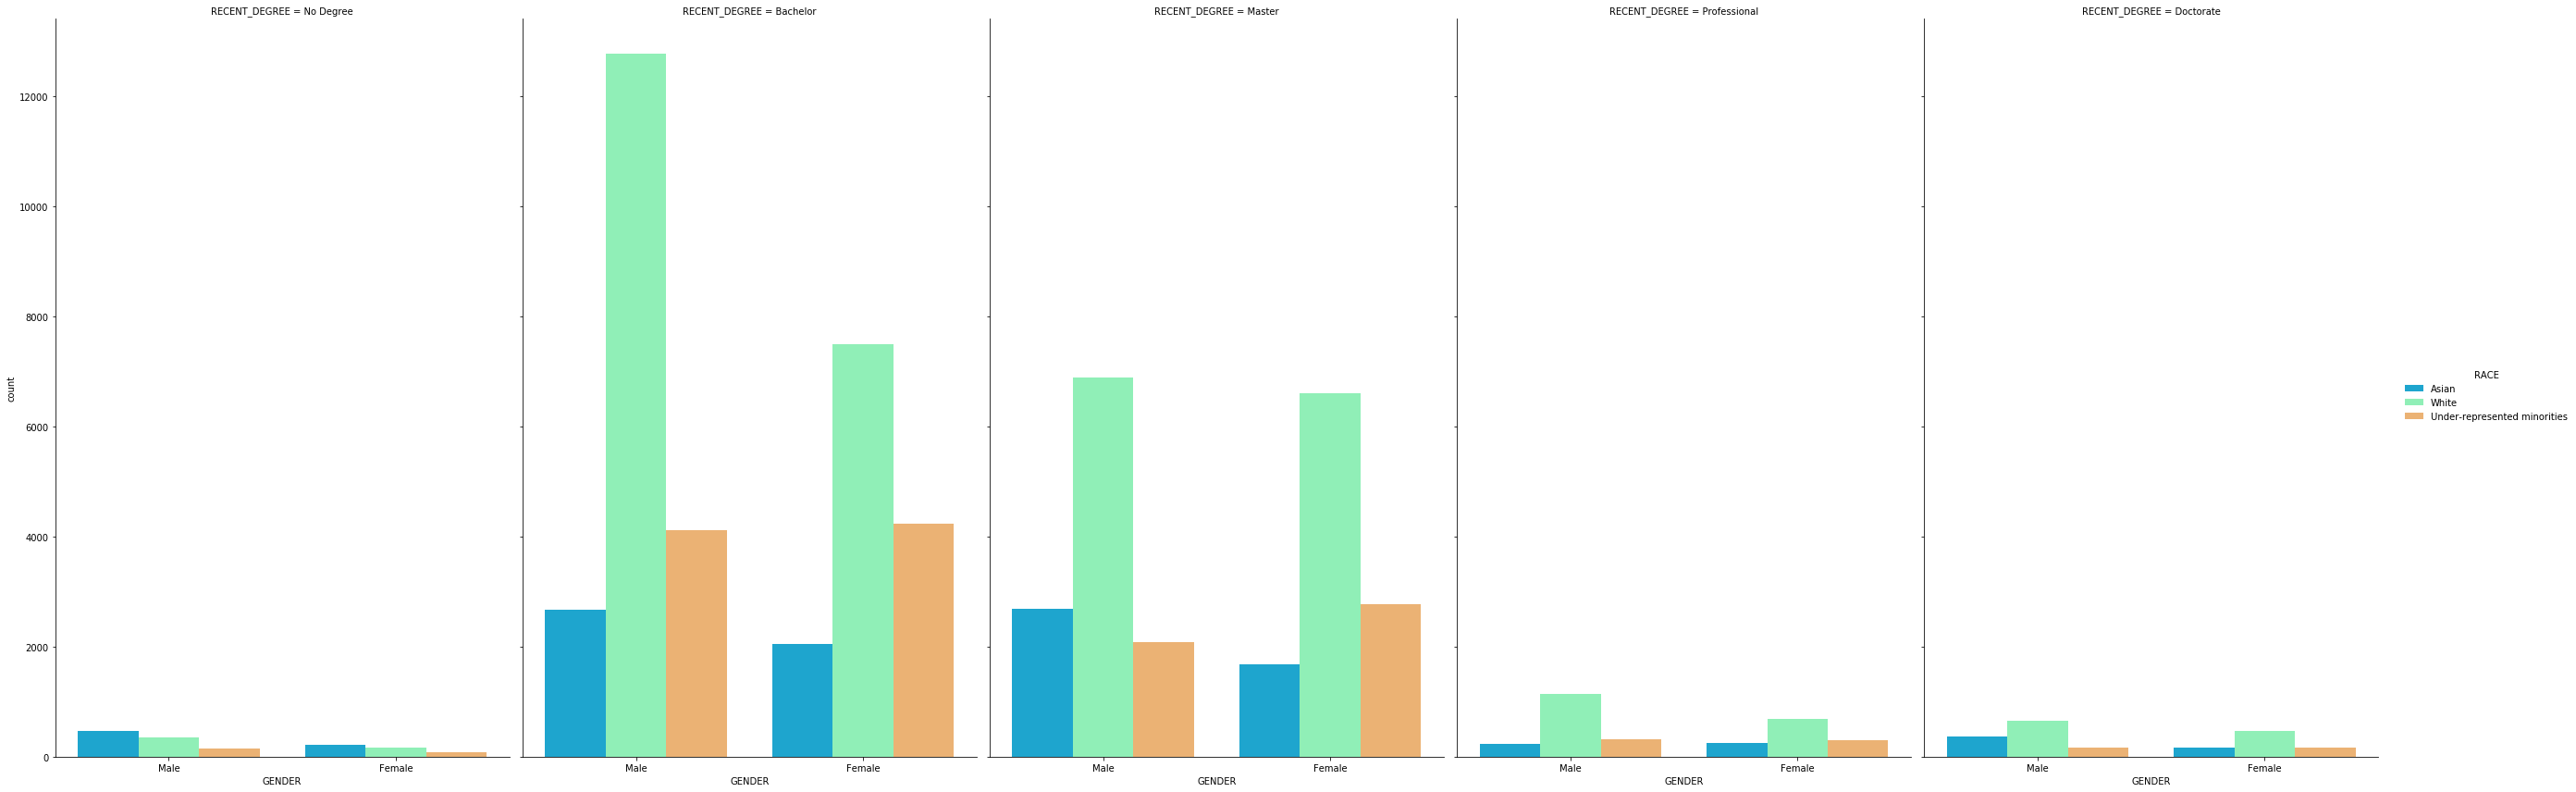

In [138]:
sns.catplot(x="GENDER", hue="RACE", col="RECENT_DEGREE",
               data=allnewdatanow, kind="count", palette='rainbow',
               height=12, aspect=0.6)

# CITIZENSHIP

In [139]:
allnewdatanow.pivot_table(index=['US_CITIZEN_TYPE'], values=['REFID'], aggfunc='count')

,REFID
US_CITIZEN_TYPE,
Born abroad of American parents,891
Born in US or US territories,46325
By naturalization,7988
None,7169


In [140]:
allnewdatanow.pivot_table(index=['US_CITIZENSHIP','GENDER','RACE'], values=['REFID'], aggfunc='count')

REFID
US_CITIZENSHIP GENDER RACE                               
No             Female Asian                          1470
                      Under-represented minorities    423
                      White                           620
               Male   Asian                          2656
                      Under-represented minorities    776
                      White                          1224
Yes            Female Asian                          2888
                      Under-represented minorities   7129
                      White                         14794
               Male   Asian                          3764
                      Under-represented minorities   6050
                      White                         20579

In [141]:
allnewdatanow.pivot_table(index=['US_CITIZEN_TYPE','TOTAL_CHILDREN'], values=['REFID'], aggfunc='count')

REFID
US_CITIZEN_TYPE                 TOTAL_CHILDREN             
Born abroad of American parents None                    512
                                One child               157
                                Two or more children    222
Born in US or US territories    None                  27843
                                One child              7656
                                Two or more children  10826
By naturalization               None                   3891
                                One child              1580
                                Two or more children   2517
None                            None                   4301
                                One child              1441
                                Two or more children   1427

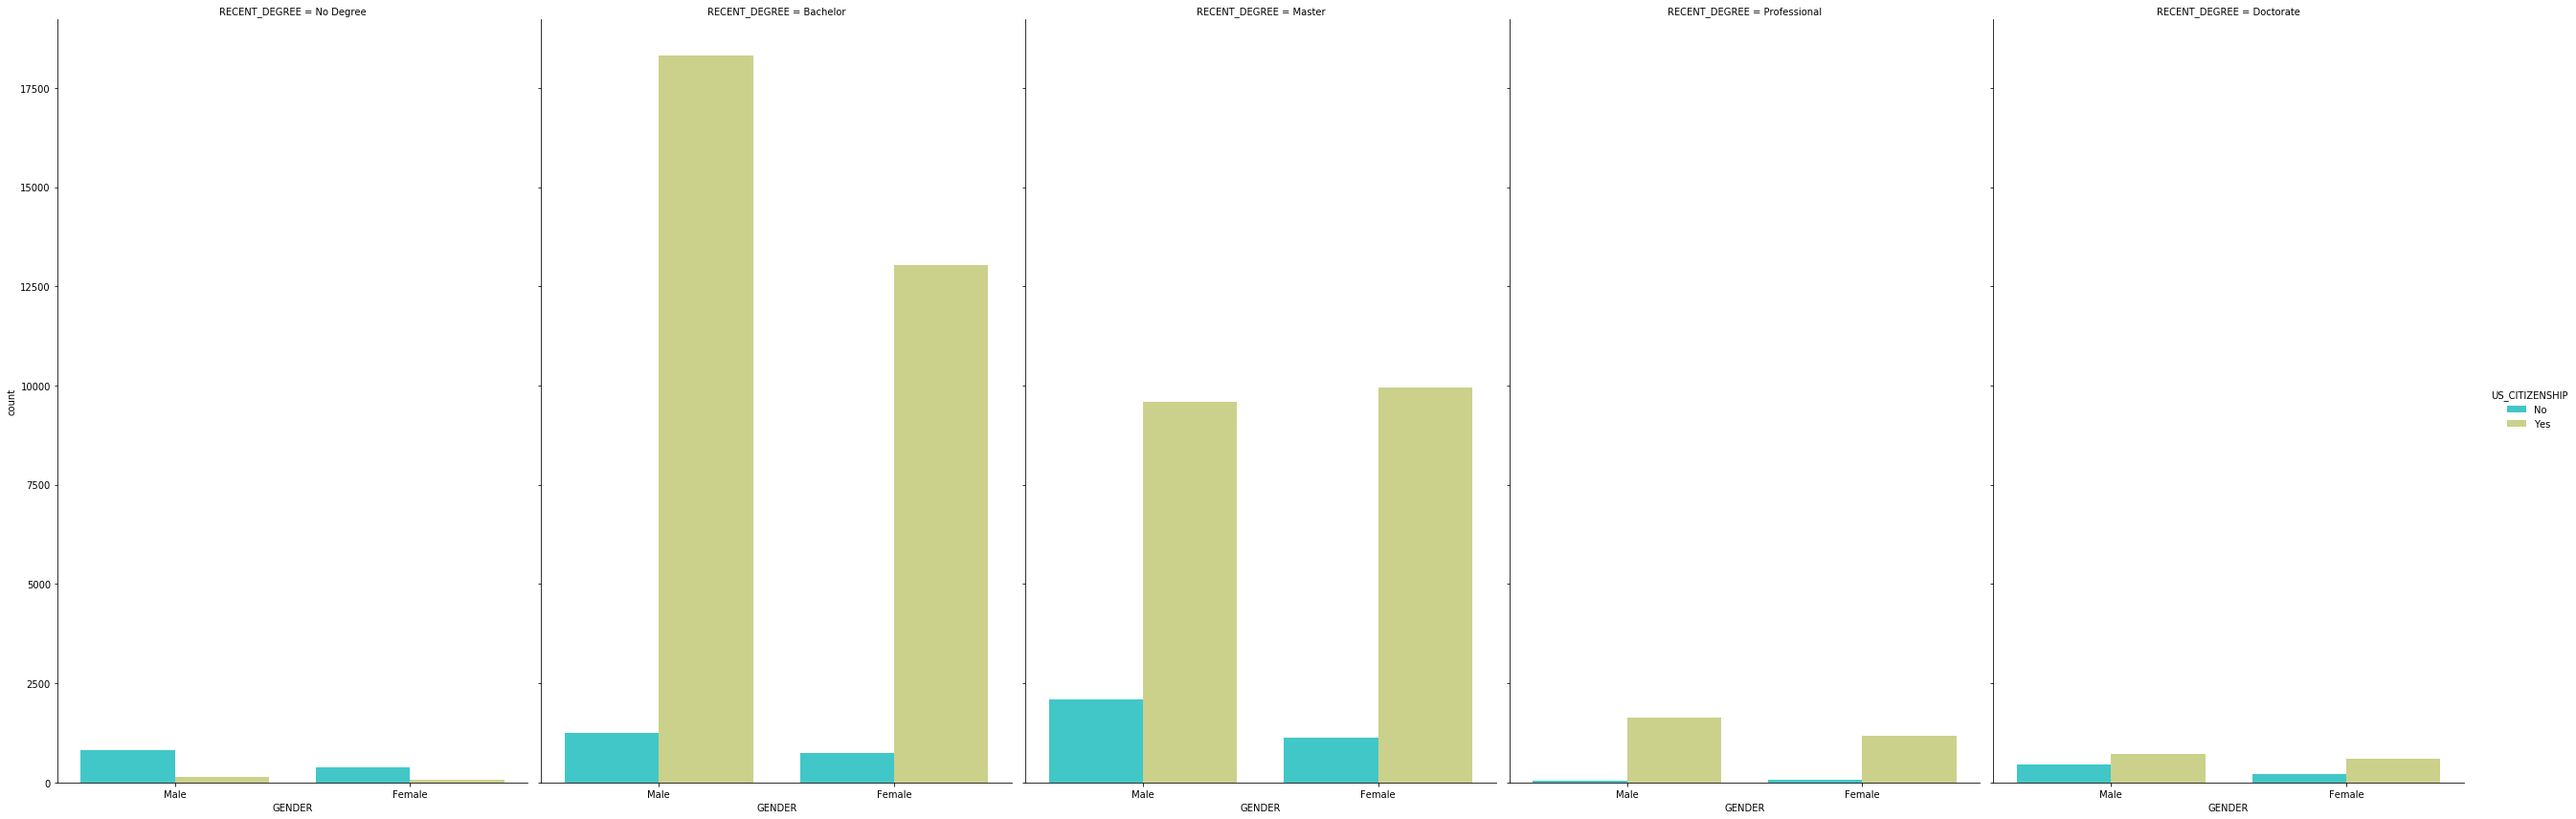

In [142]:
sns.catplot(x="GENDER", hue="US_CITIZENSHIP", col="RECENT_DEGREE",
               data=allnewdatanow, kind="count", palette='rainbow',
               height=12, aspect=0.6)

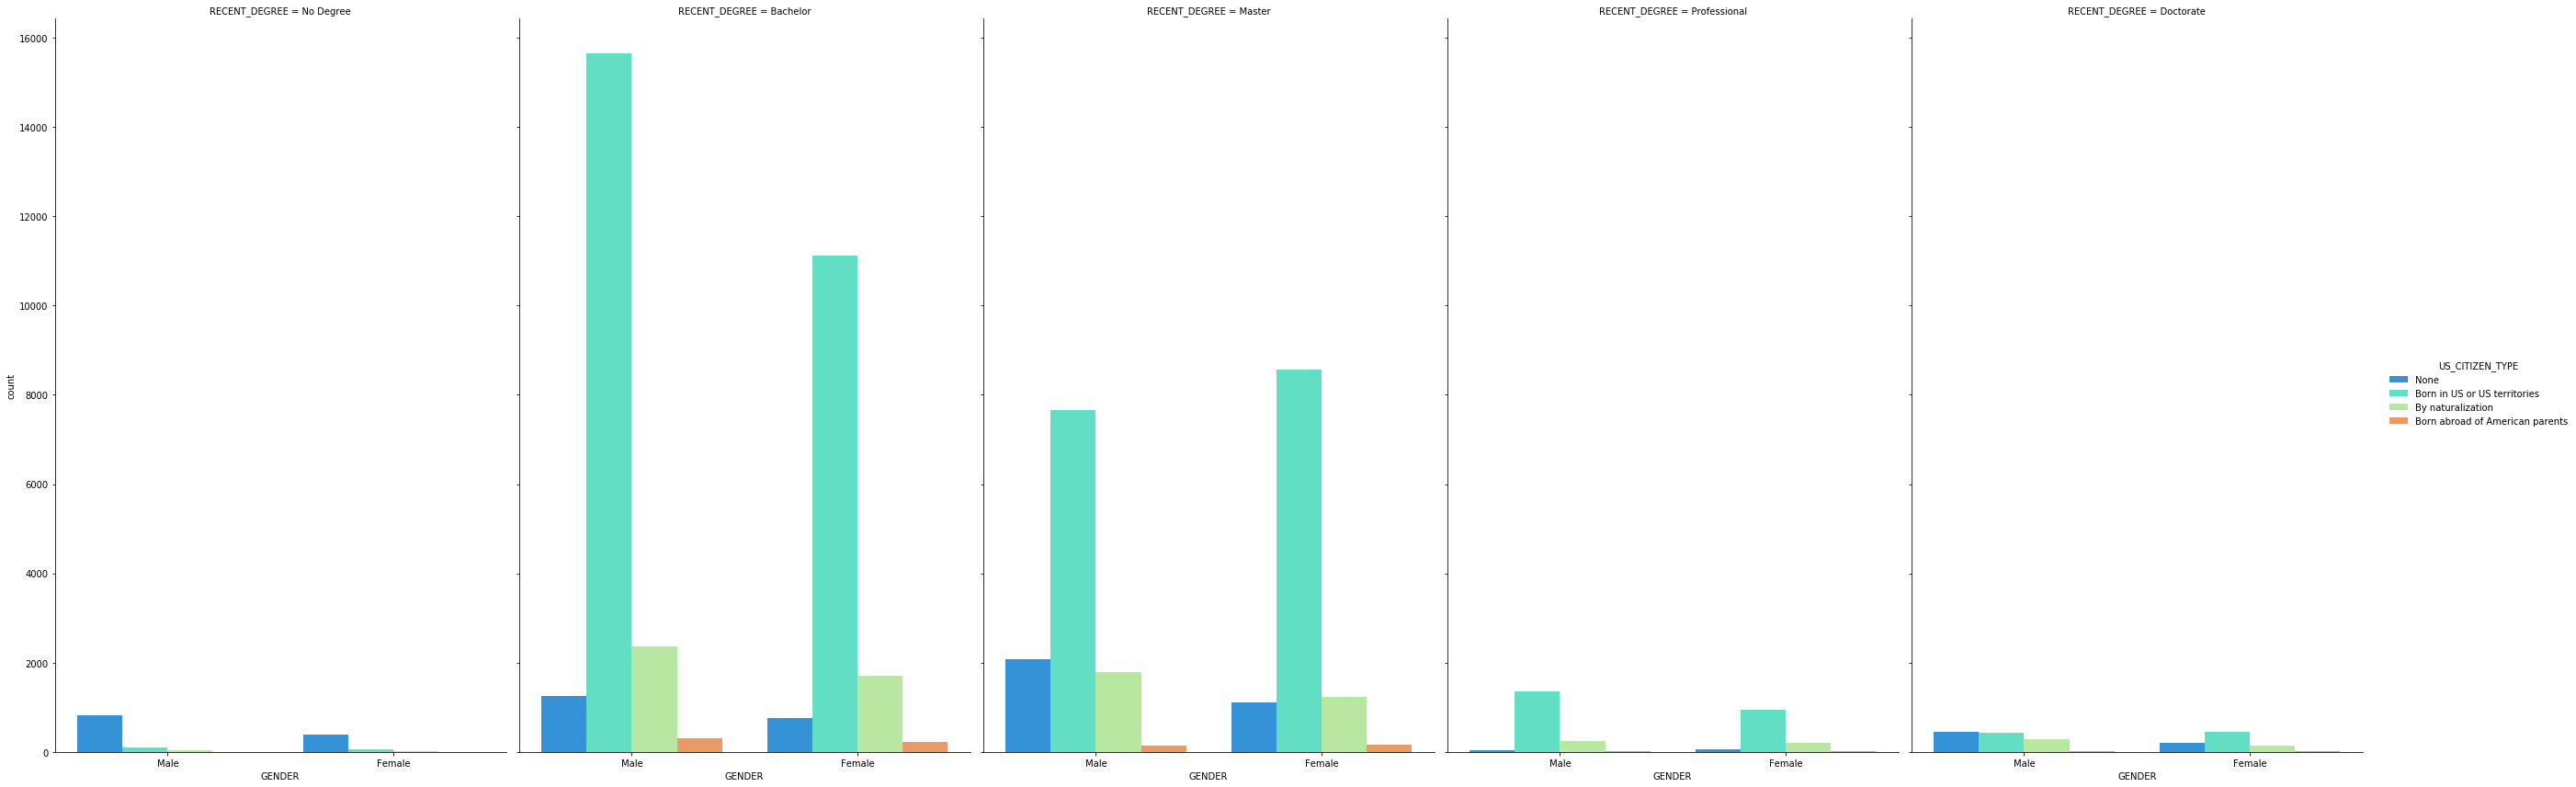

In [143]:
sns.catplot(x="GENDER", hue="US_CITIZEN_TYPE", col="RECENT_DEGREE",
               data=allnewdatanow, kind="count", palette='rainbow',
               height=12, aspect=0.6)

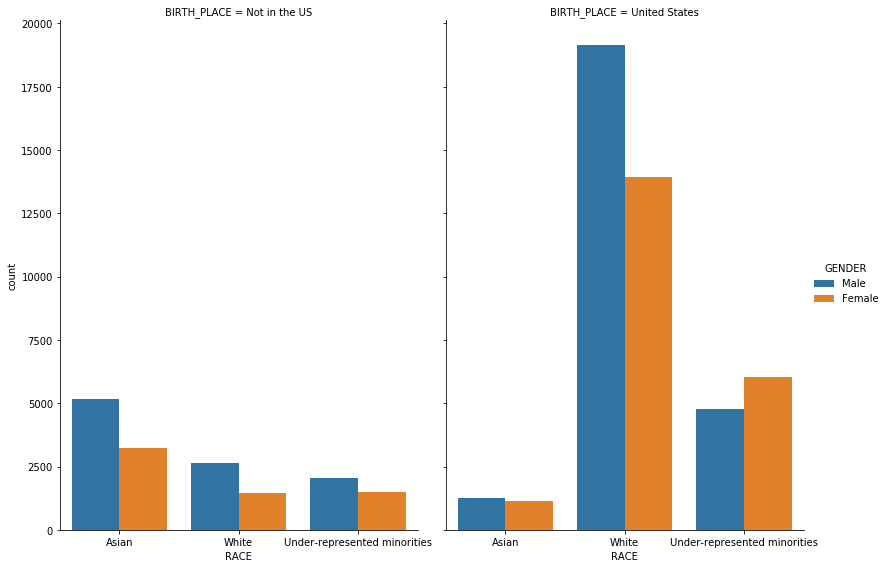

In [144]:
sns.catplot(x="RACE", hue="GENDER", col="BIRTH_PLACE",
               data=allnewdatanow, kind="count",
               height=8, aspect=.7)

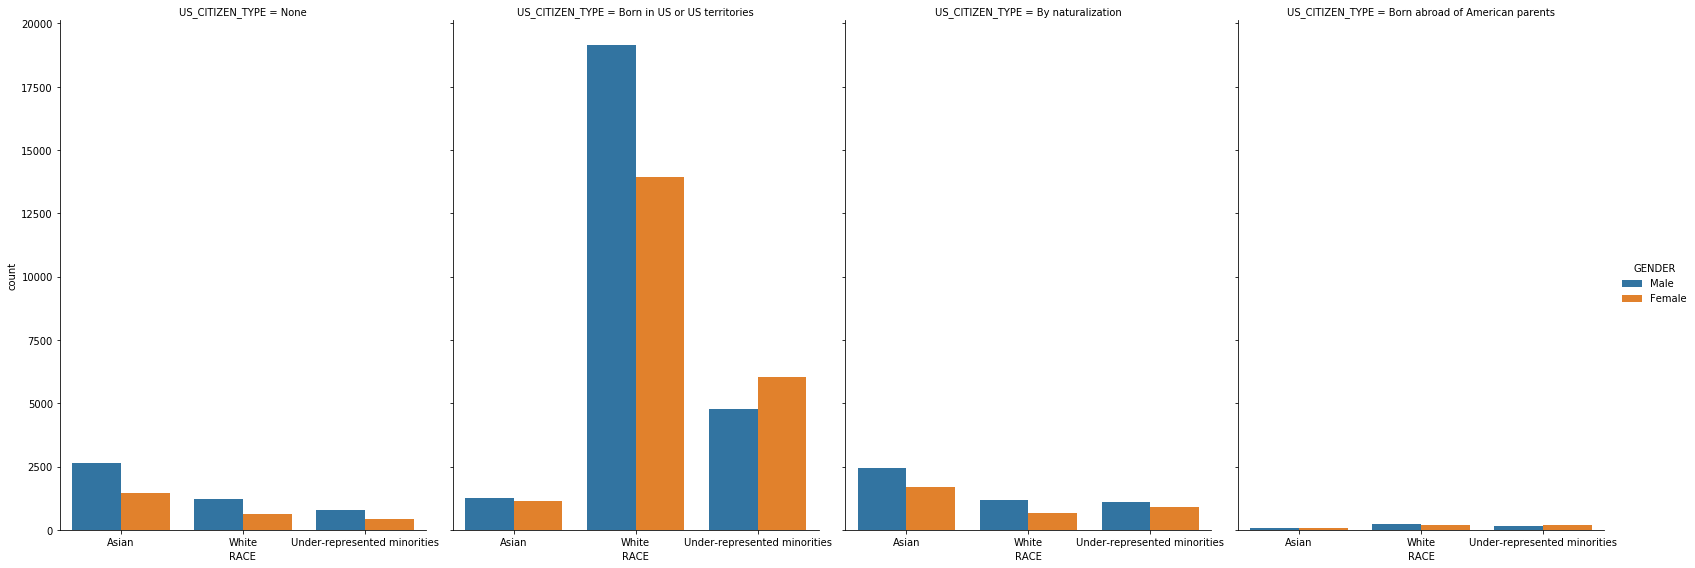

In [145]:
sns.catplot(x="RACE", hue="GENDER", col="US_CITIZEN_TYPE",
               data=allnewdatanow, kind="count",
               height=8, aspect=.7)

# SALARY AND AGE

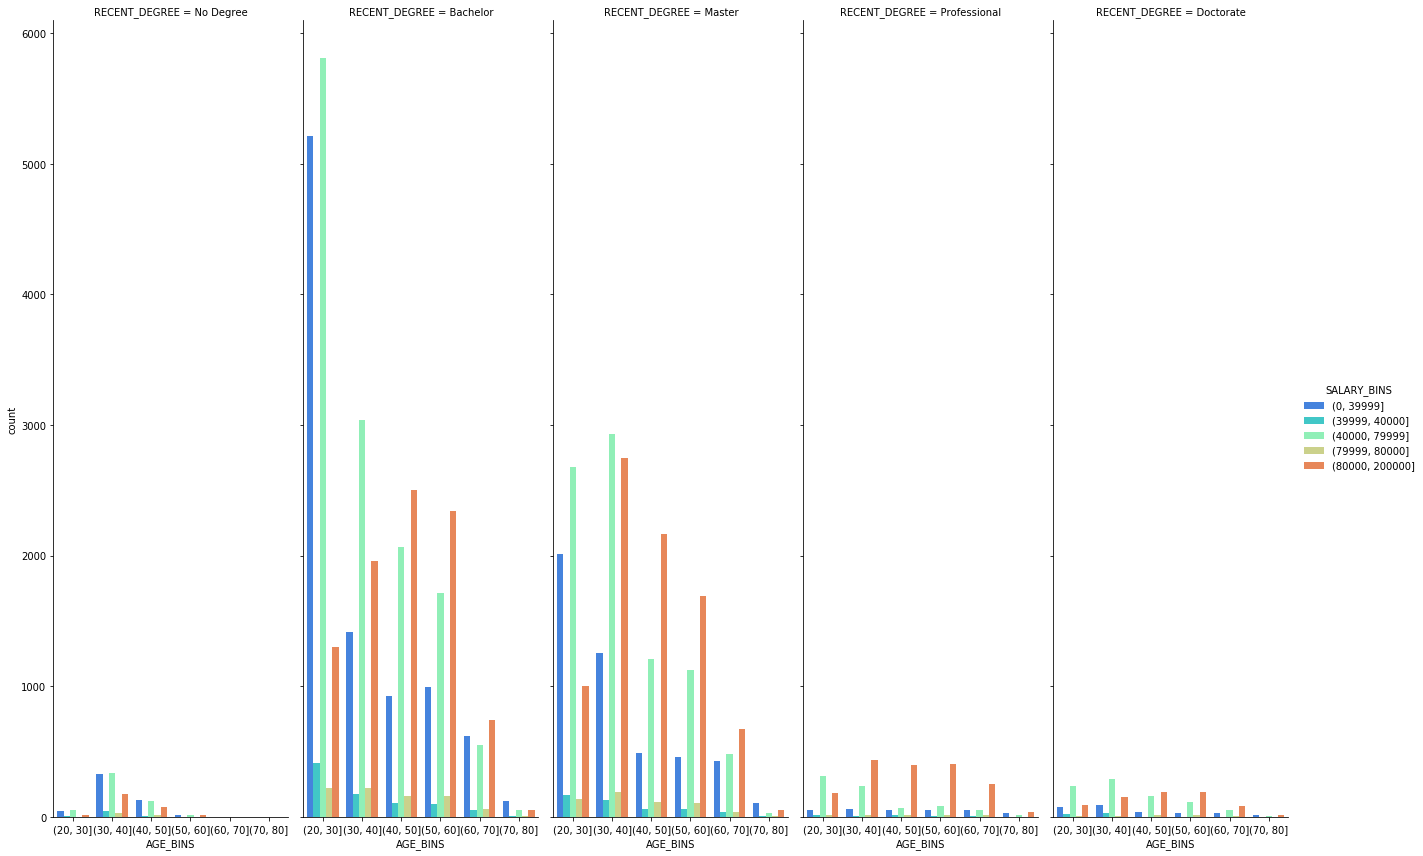

In [146]:
sns.catplot(x="AGE_BINS", hue="SALARY_BINS", col="RECENT_DEGREE",
               data=allnewdatanow, kind="count", palette='rainbow',
               height=12, aspect=.3)

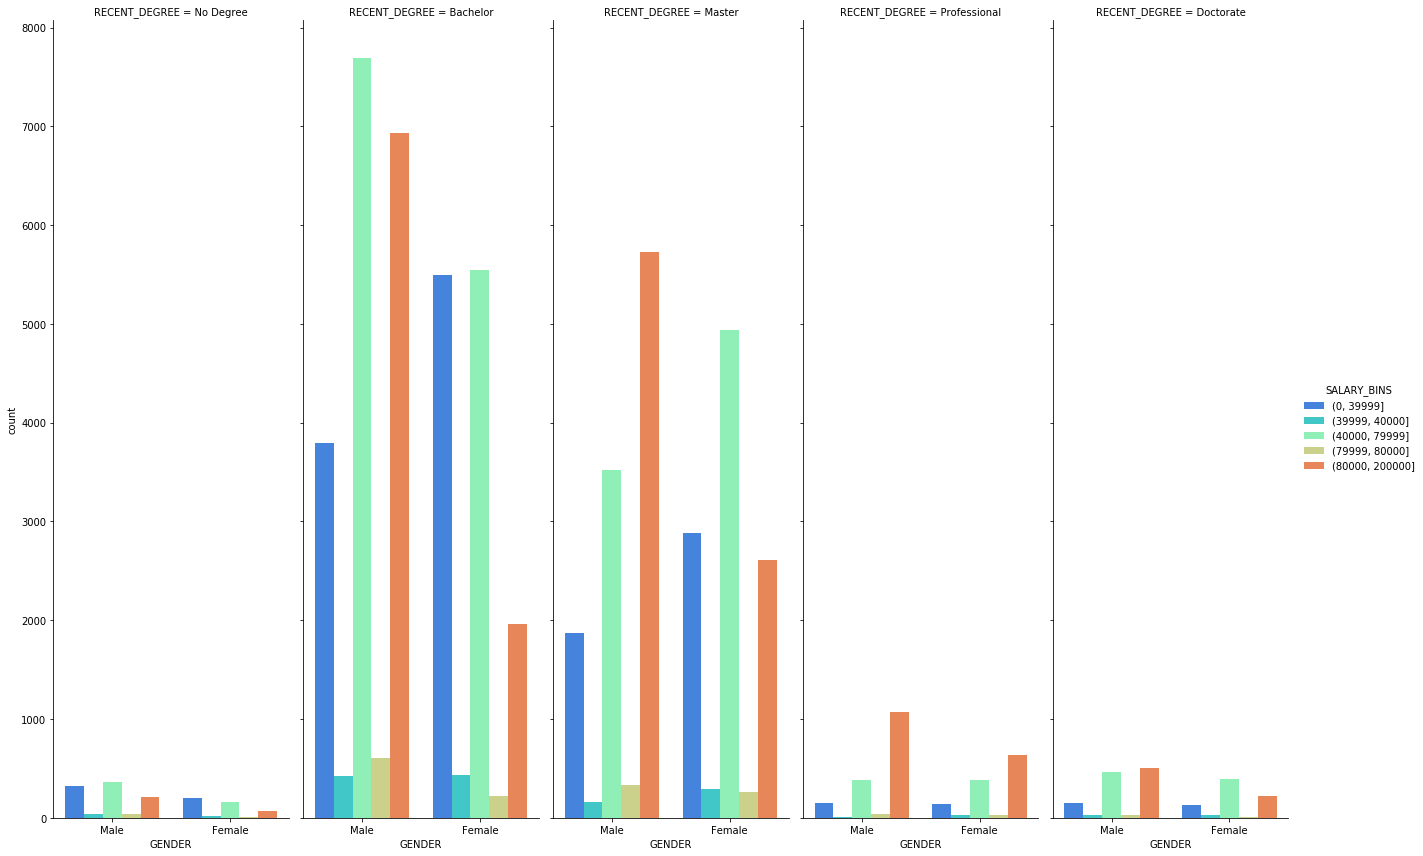

In [147]:
sns.catplot(x="GENDER", hue="SALARY_BINS", col="RECENT_DEGREE",
               data=allnewdatanow, kind="count", palette='rainbow',
               height=12, aspect=.3)

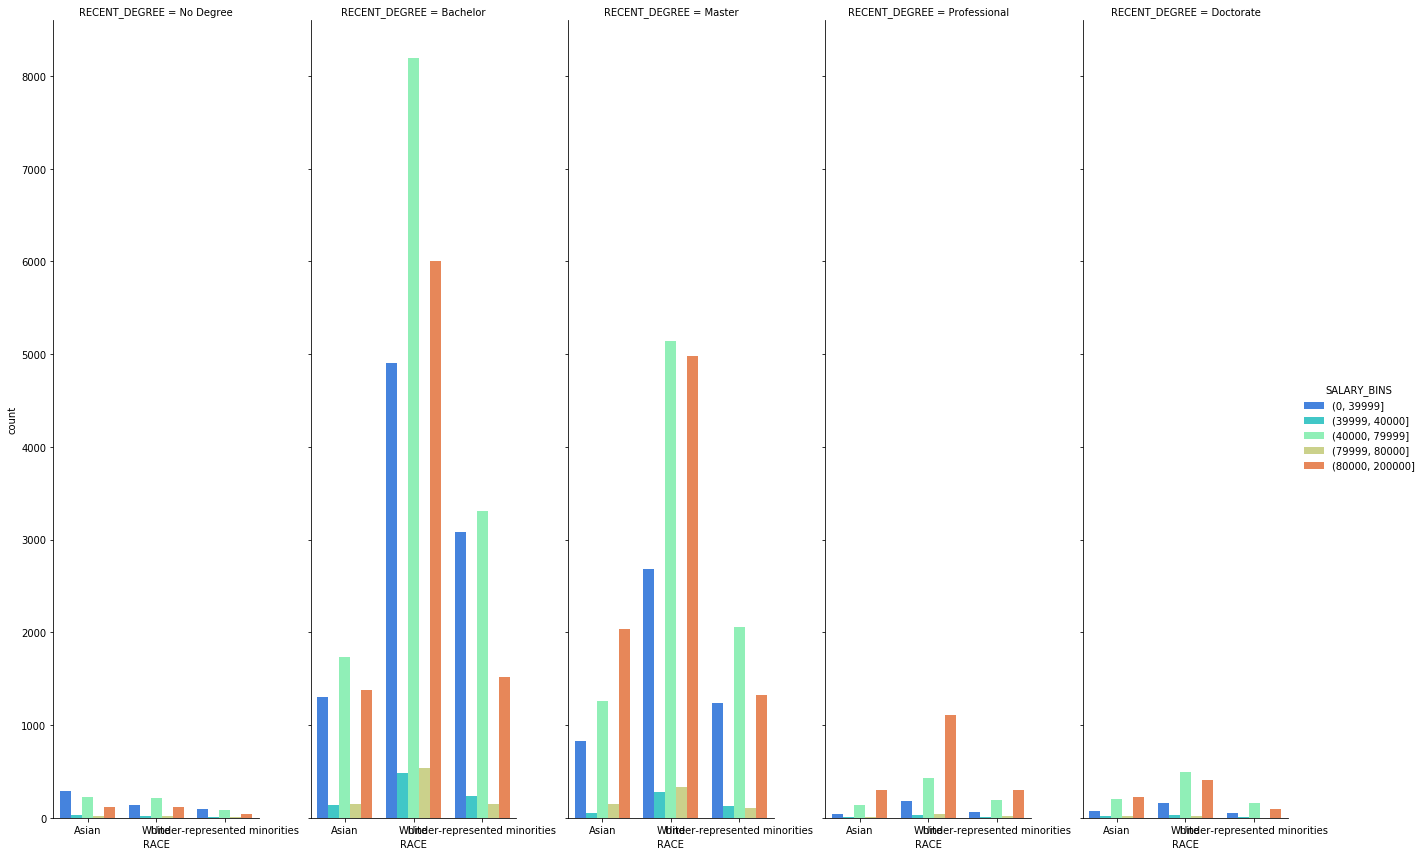

In [148]:
sns.catplot(x="RACE", hue="SALARY_BINS", col="RECENT_DEGREE",
               data=allnewdatanow, kind="count", palette='rainbow',
               height=12, aspect=.3)

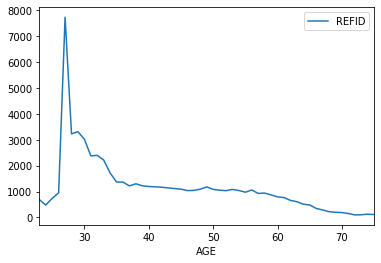

In [149]:
allnewdatanow.pivot_table(index=['AGE'], values=['REFID'], aggfunc='count').plot()

# EMPLOYMENT

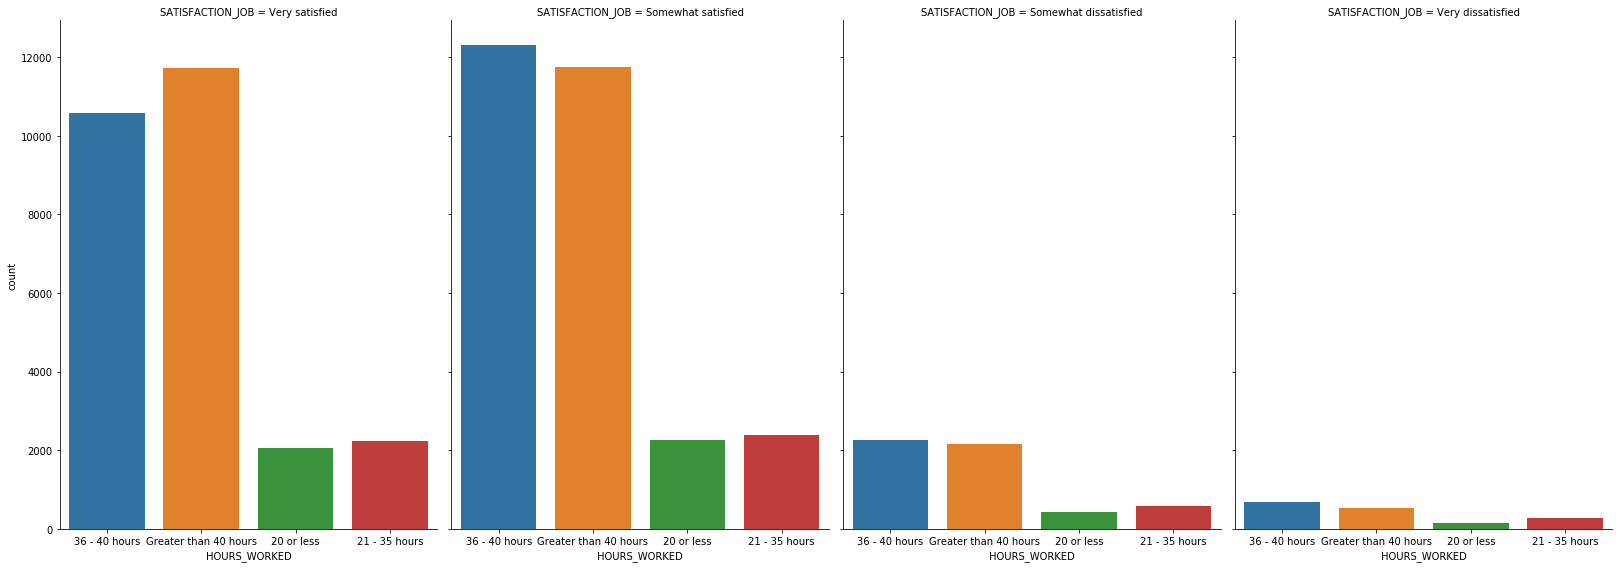

In [150]:
sns.catplot(x="HOURS_WORKED",  col="SATISFACTION_JOB",
               data=allnewdatanow, kind="count",
               height=8, aspect=.7)

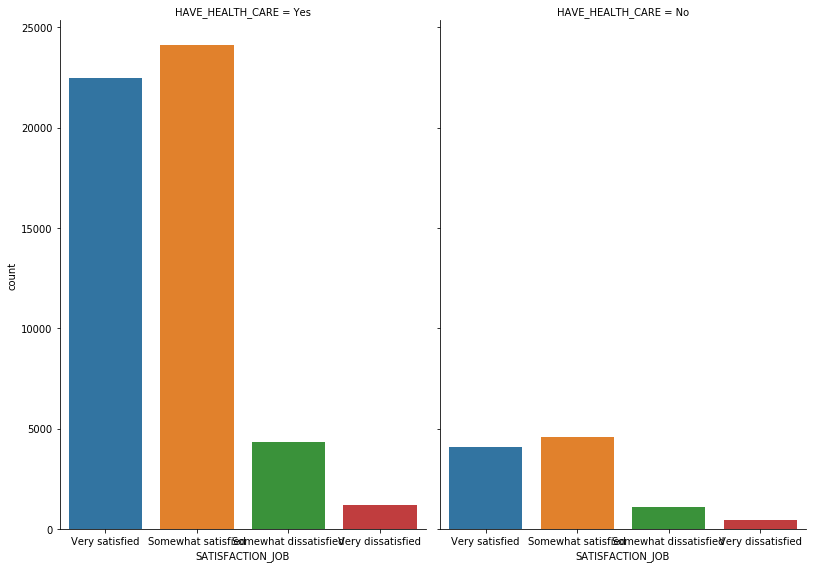

In [151]:
sns.catplot(x="SATISFACTION_JOB", col="HAVE_HEALTH_CARE",
               data=allnewdatanow, kind="count",
               height=8, aspect=.7)

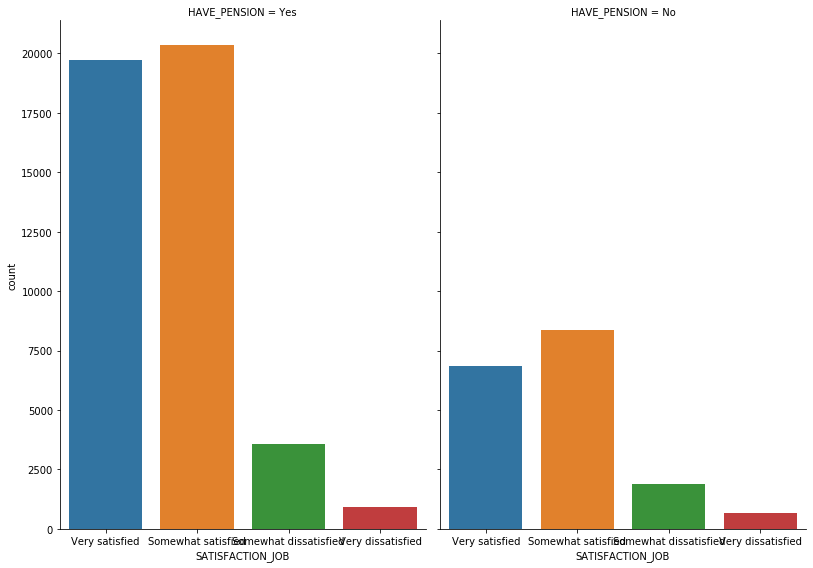

In [152]:
sns.catplot(x="SATISFACTION_JOB", col="HAVE_PENSION",
               data=allnewdatanow, kind="count",
               height=8, aspect=.7)

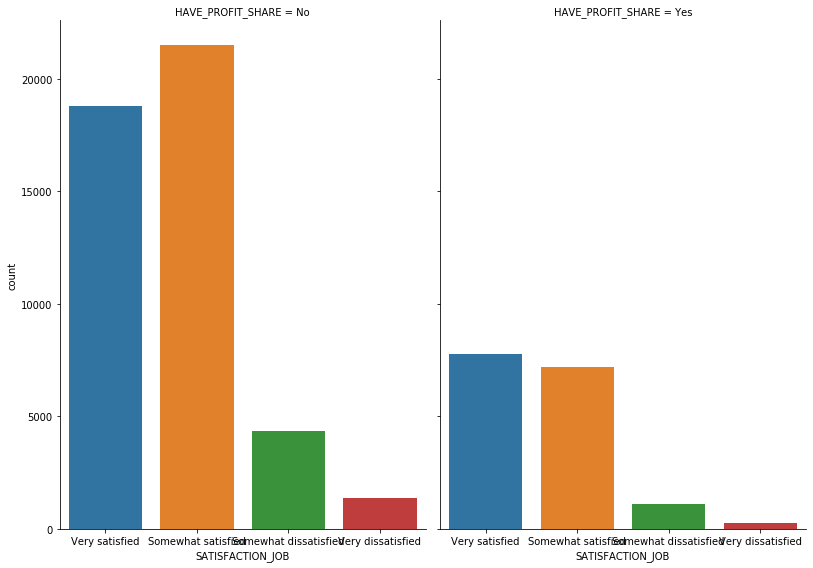

In [153]:
sns.catplot(x="SATISFACTION_JOB", col="HAVE_PROFIT_SHARE",
               data=allnewdatanow, kind="count",
               height=8, aspect=.7)

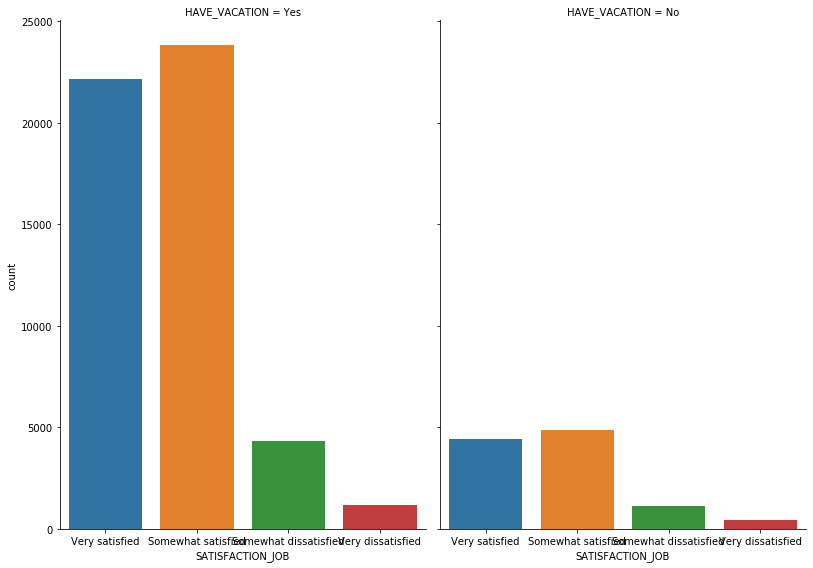

In [154]:
sns.catplot(x="SATISFACTION_JOB", col="HAVE_VACATION",
               data=allnewdatanow, kind="count",
               height=8, aspect=.7)

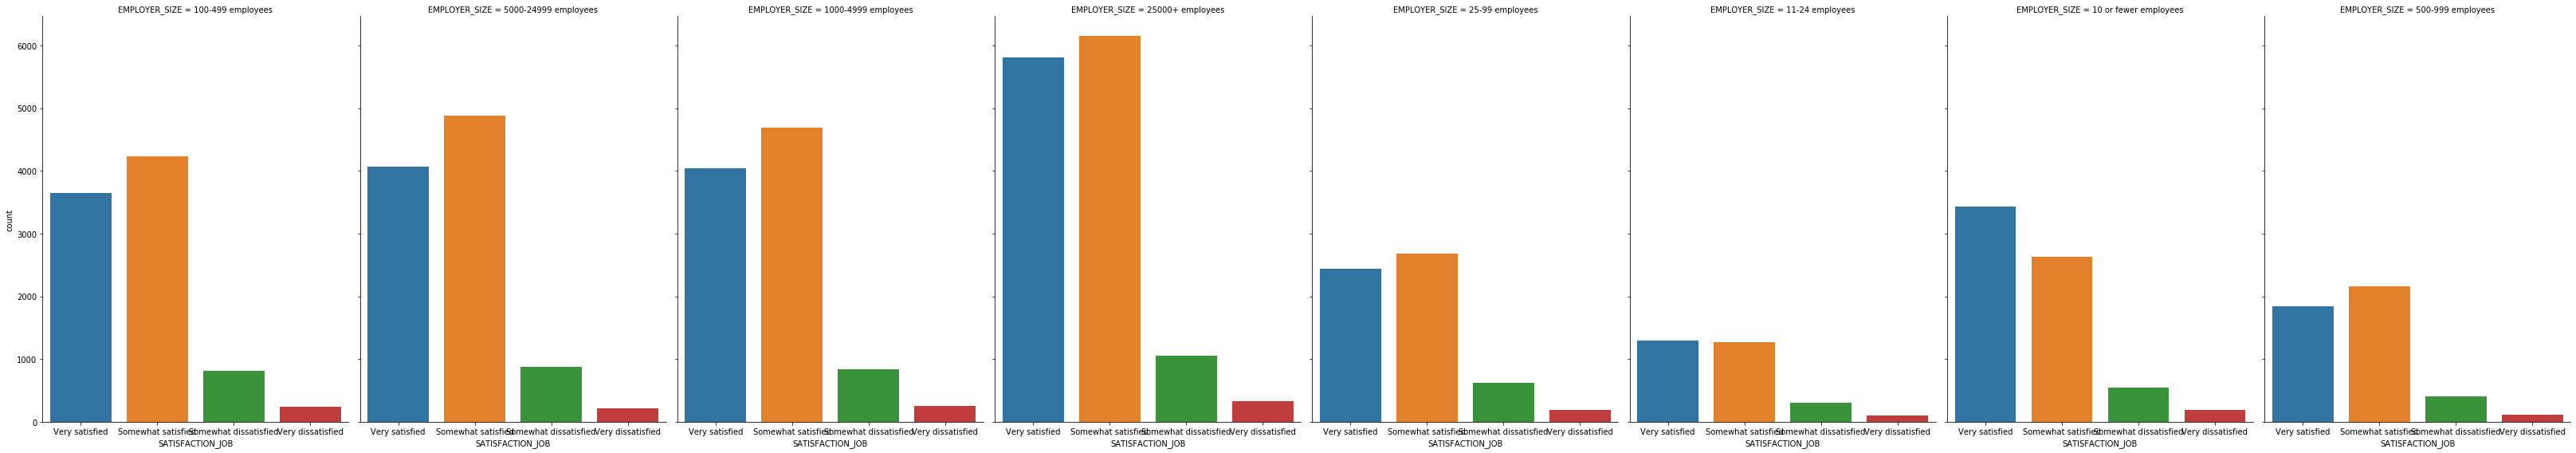

In [155]:
sns.catplot(x="SATISFACTION_JOB", col="EMPLOYER_SIZE",
               data=allnewdatanow, kind="count",
               height=8, aspect=.7)

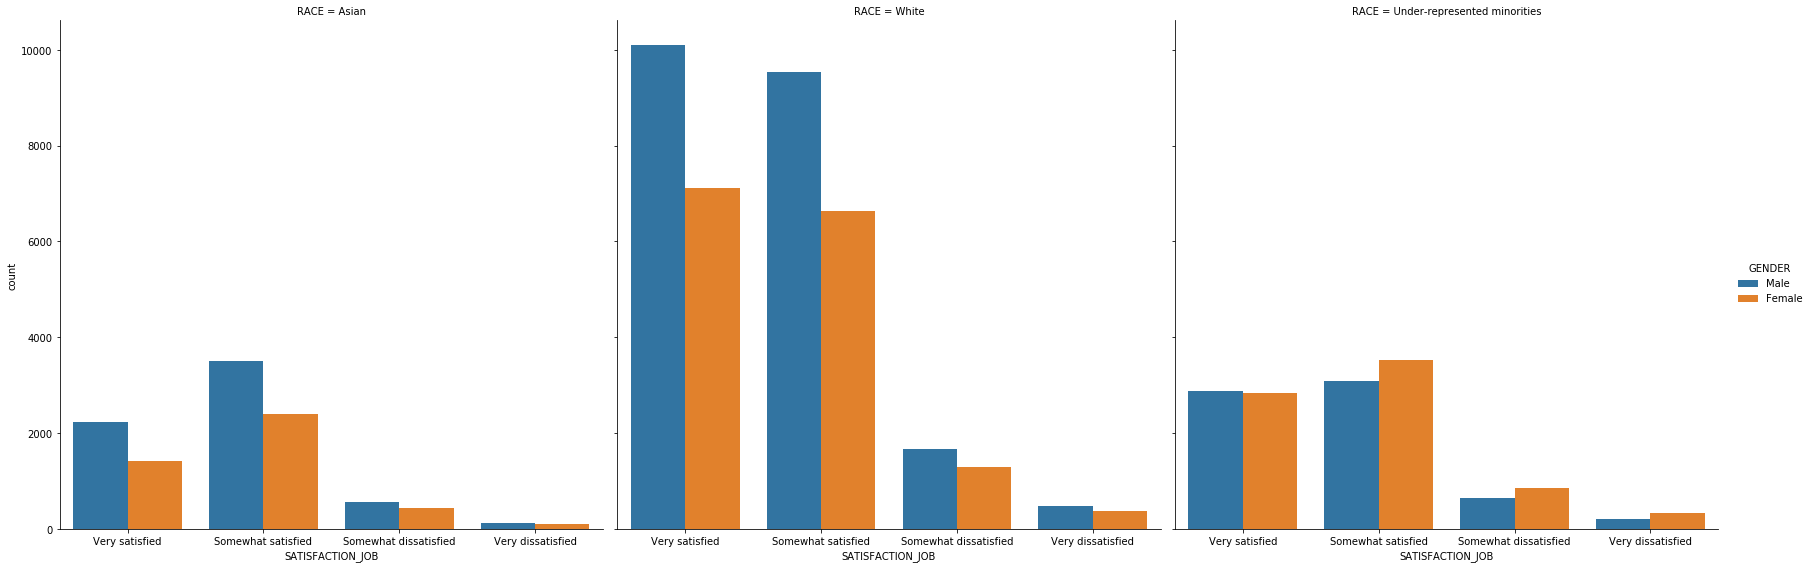

In [156]:
sns.catplot(x="SATISFACTION_JOB",  col= "RACE", hue = "GENDER",
               data=allnewdatanow, kind="count",
               height=8, aspect=1)

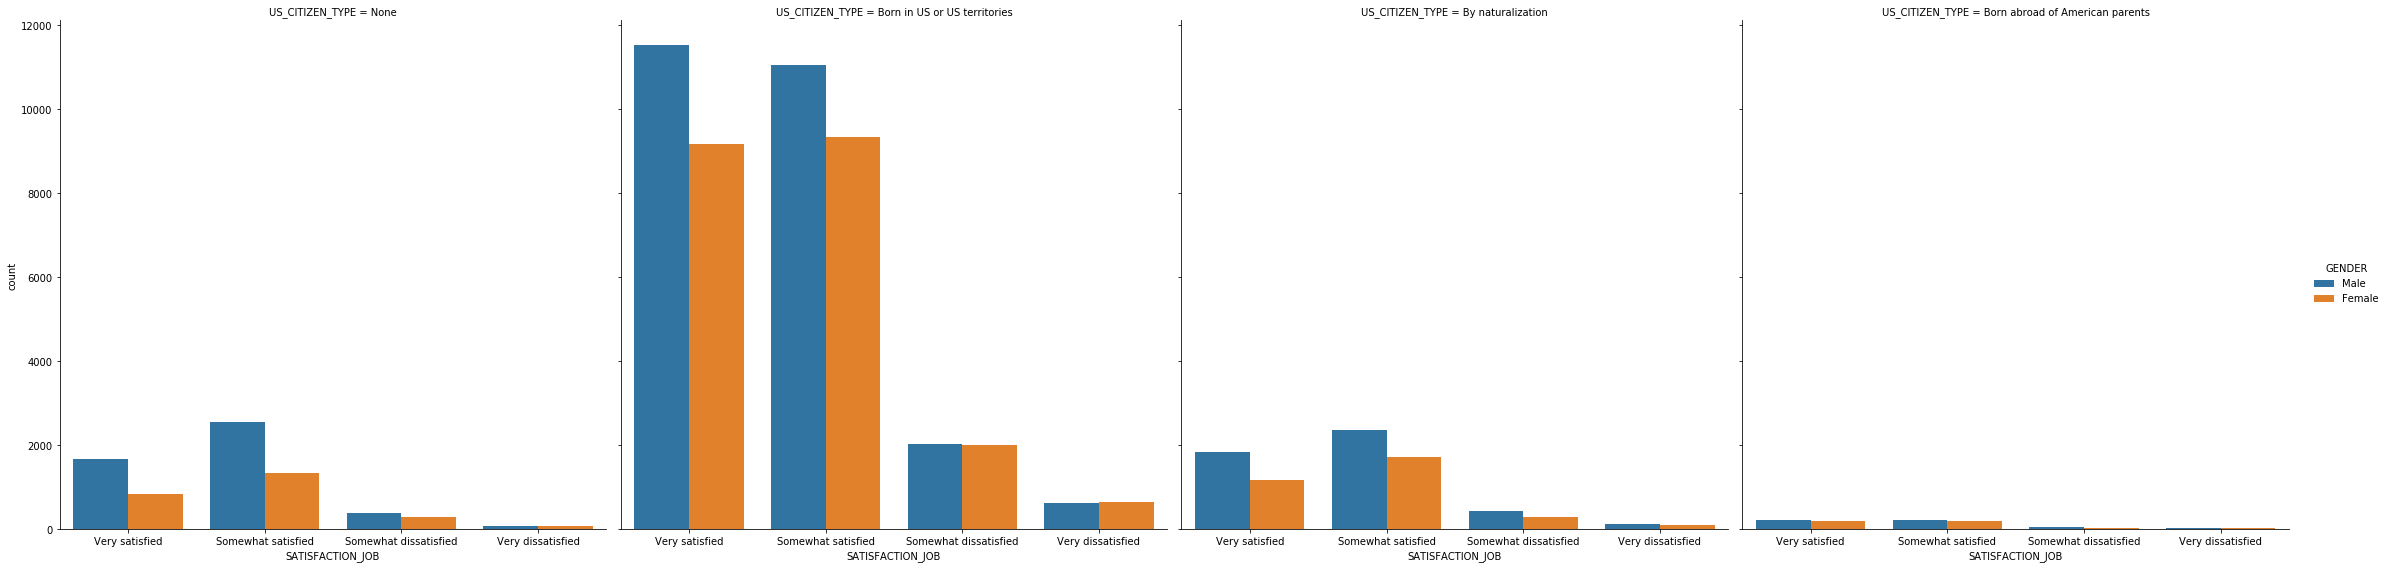

In [157]:
sns.catplot(x="SATISFACTION_JOB",  col= "US_CITIZEN_TYPE", hue = "GENDER",
               data=allnewdatanow, kind="count",
               height=8, aspect=1)

# DEGREE AND EDUCATION

In [158]:
reasonnow = allnewdatanow.pivot_table(index=['REASON_EDUCATION_ADVANCE_OPPORTUNITIES','REASON_EDUCATION_BEFORE_CAREER','REASON_EDUCATION_CHANGE_CAREER','REASON_EDUCATION_PERSONAL'], values=['REFID'], aggfunc='count')

In [159]:
reasonnow.transpose()

REASON_EDUCATION_ADVANCE_OPPORTUNITIES     No                                    Yes                                    
REASON_EDUCATION_BEFORE_CAREER             No                Yes                  No                  Yes               
REASON_EDUCATION_CHANGE_CAREER             No       Yes       No       Yes        No       Yes         No       Yes     
REASON_EDUCATION_PERSONAL                  No  Yes   No Yes   No  Yes   No  Yes   No  Yes   No  Yes    No  Yes   No  Yes
REFID                                   55800  303  119  49  569  212  184  124  883  631  229  197  1048  867  584  574

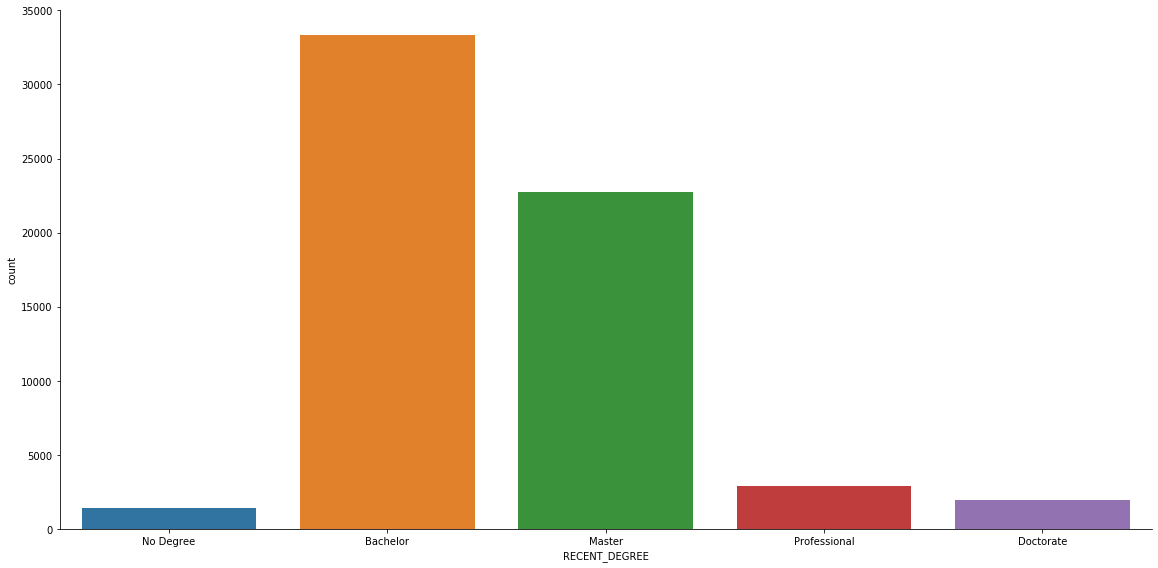

In [160]:
sns.catplot(x="RECENT_DEGREE",
               data=allnewdatanow, kind="count",
               height=8, aspect=2)

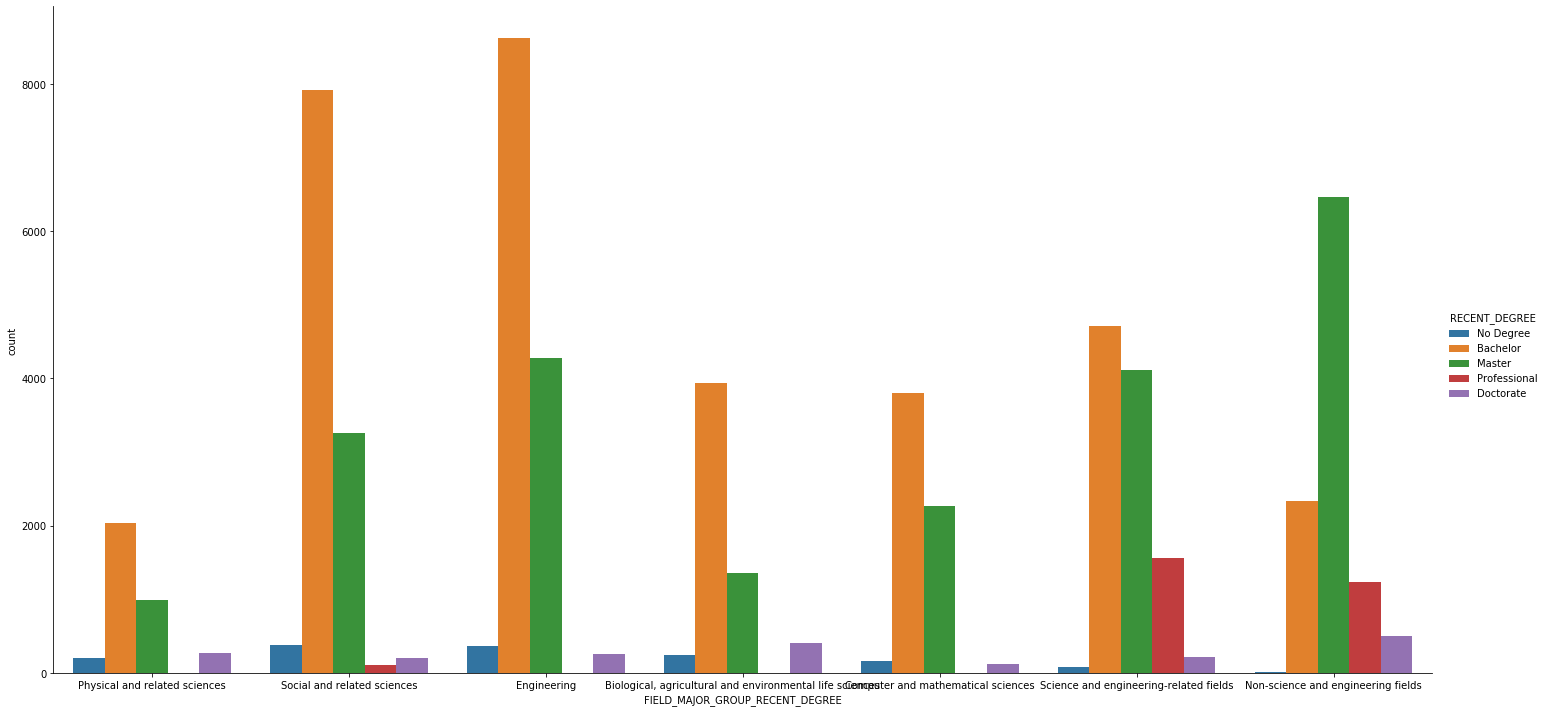

In [161]:
sns.catplot(x="FIELD_MAJOR_GROUP_RECENT_DEGREE", hue="RECENT_DEGREE",
               data=allnewdatanow, kind="count",
               height=10, aspect=2)

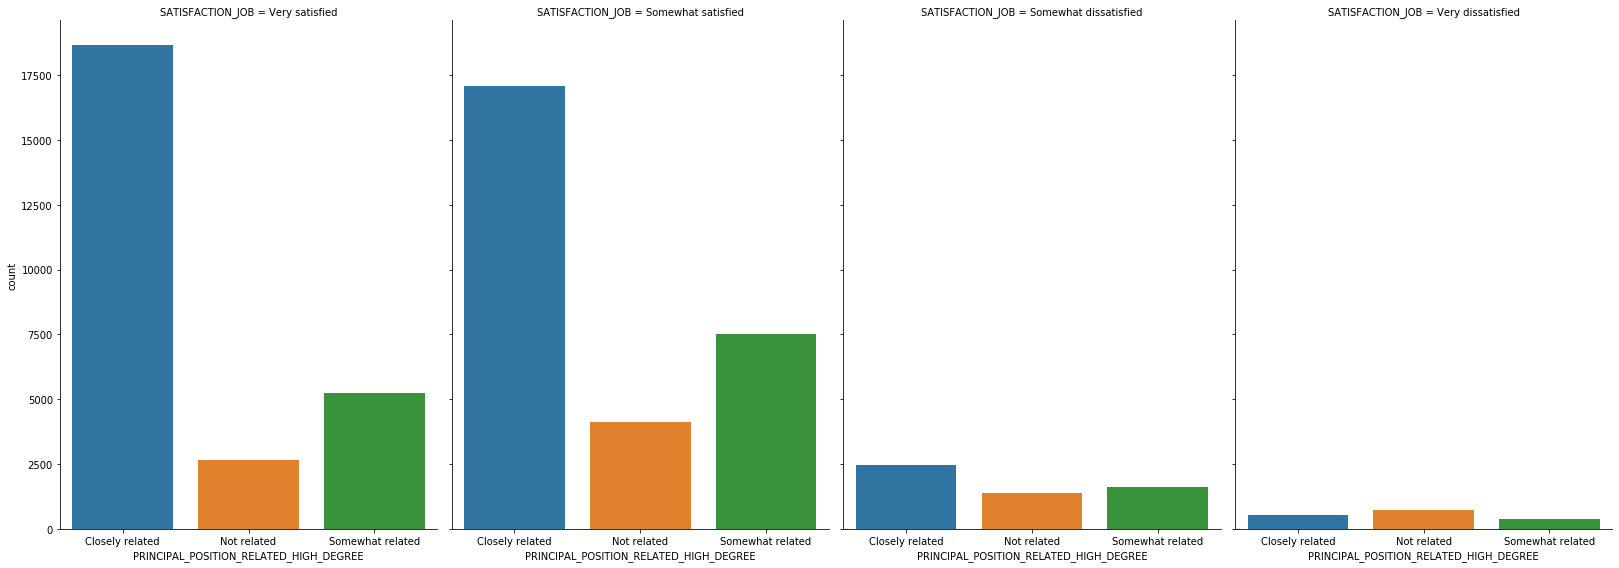

In [162]:
sns.catplot(x="PRINCIPAL_POSITION_RELATED_HIGH_DEGREE", col="SATISFACTION_JOB",
               data=allnewdatanow, kind="count",
               height=8, aspect=.7)

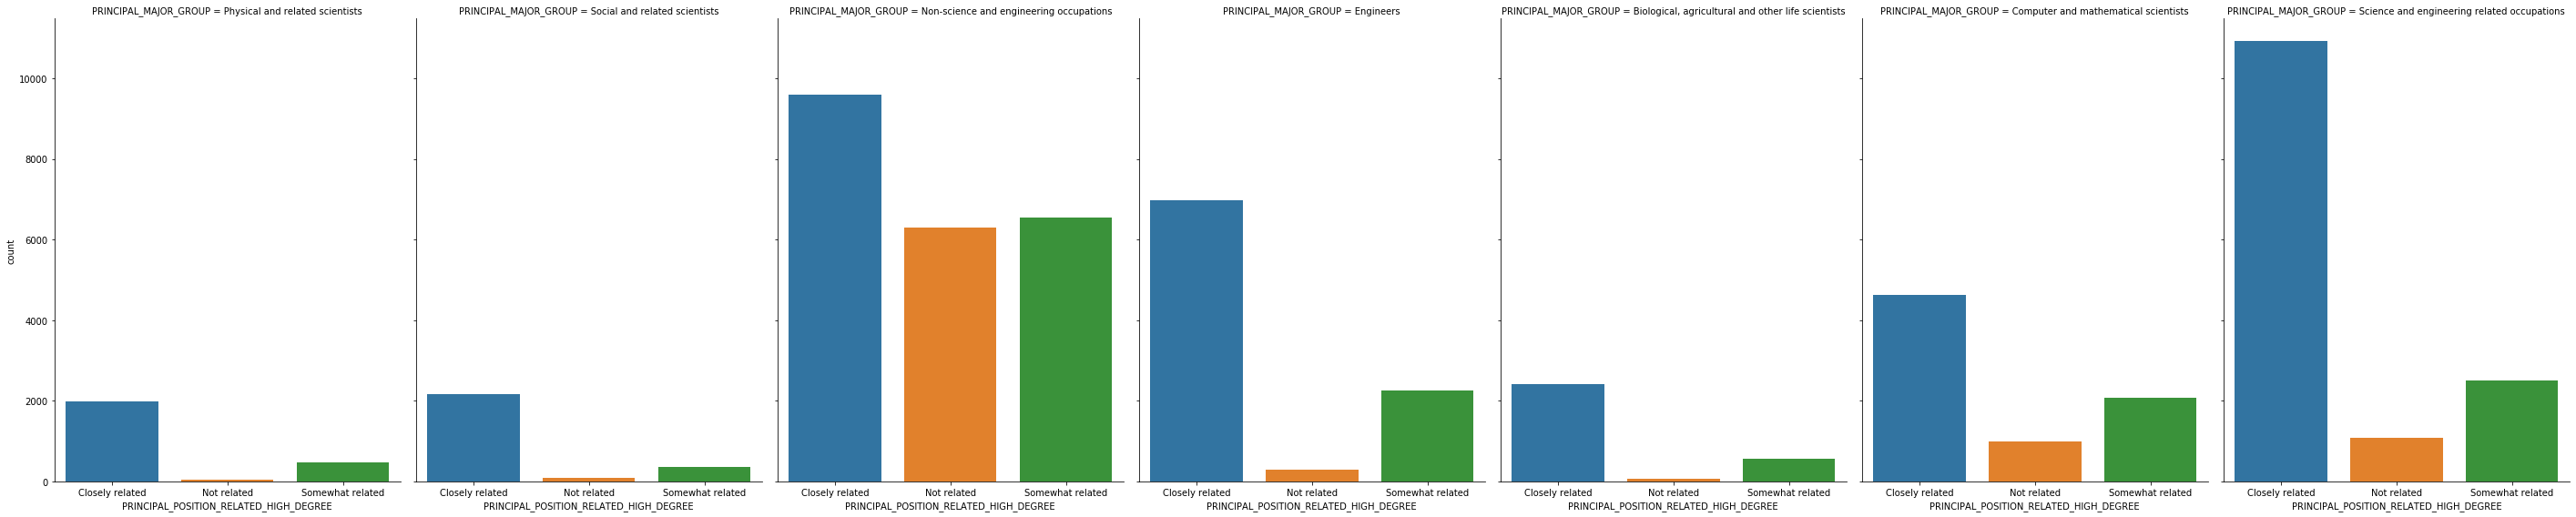

In [163]:
sns.catplot(x="PRINCIPAL_POSITION_RELATED_HIGH_DEGREE", col="PRINCIPAL_MAJOR_GROUP",
               data=allnewdatanow, kind="count",
               height=8, aspect=.7)

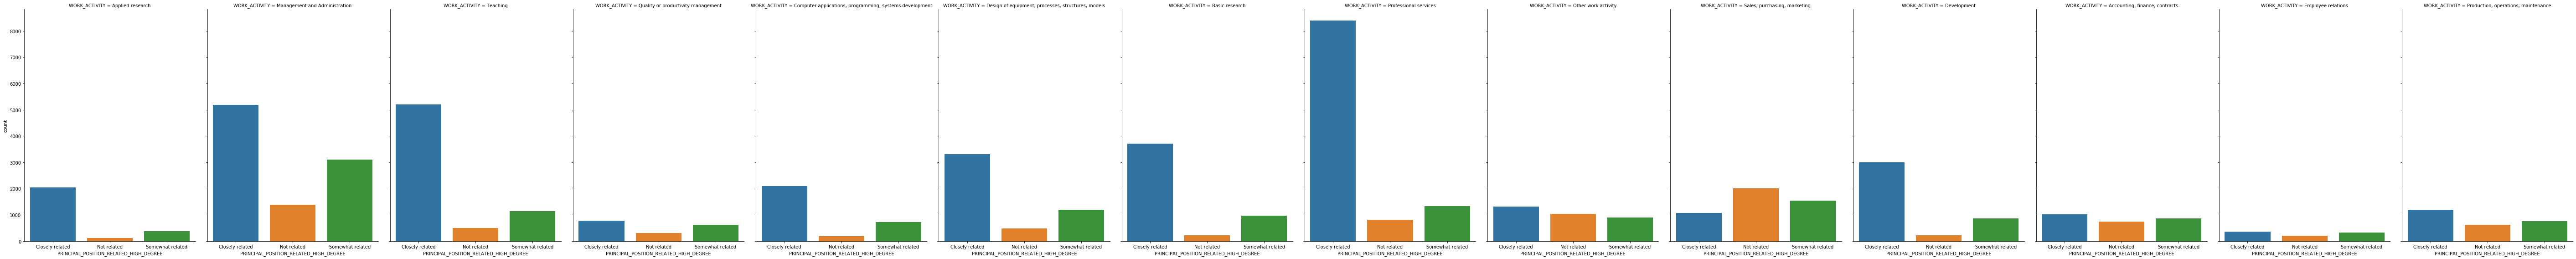

In [164]:
sns.catplot(x="PRINCIPAL_POSITION_RELATED_HIGH_DEGREE", col="WORK_ACTIVITY",
               data=allnewdatanow, kind="count",
               height=8, aspect=.7)

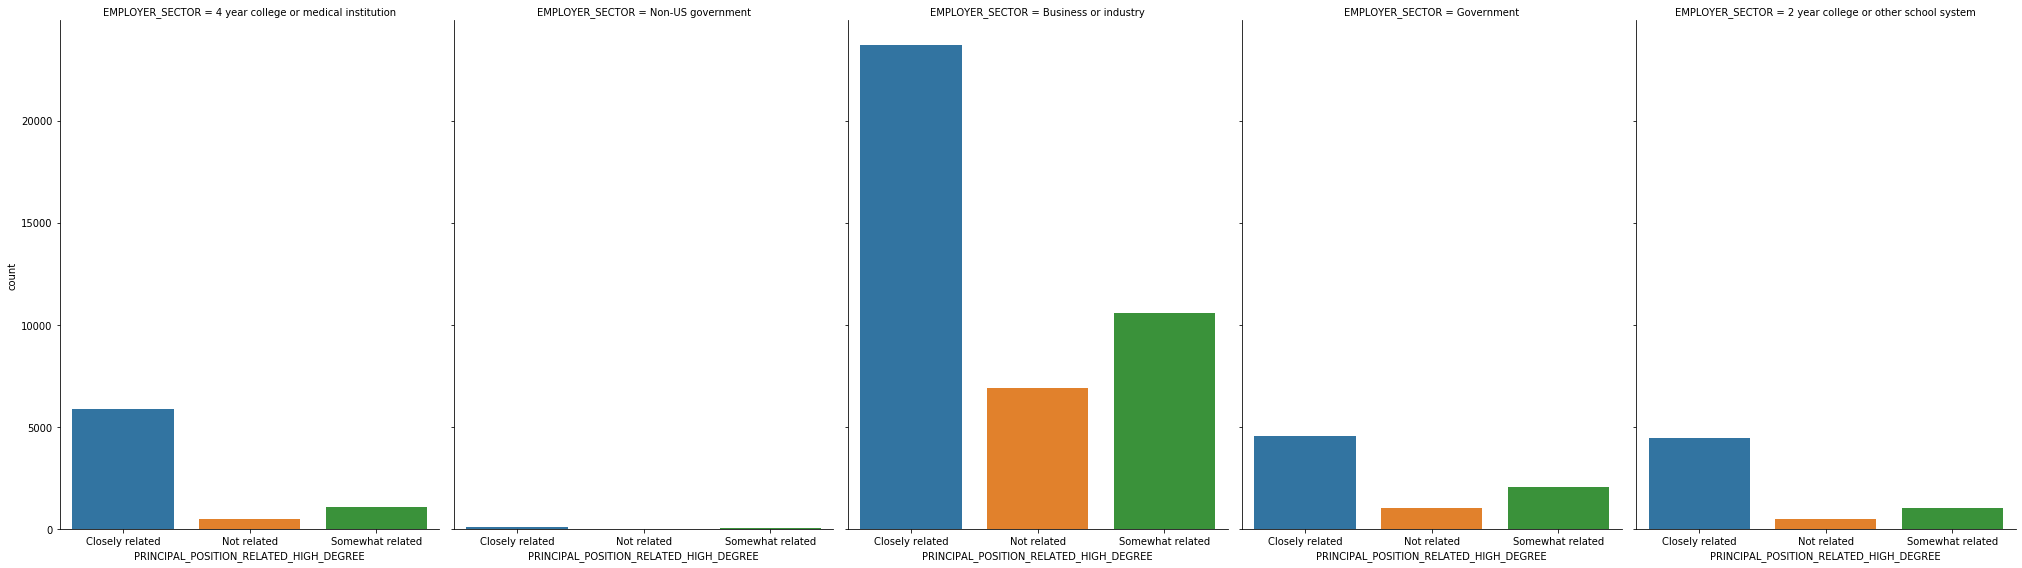

In [165]:
sns.catplot(x="PRINCIPAL_POSITION_RELATED_HIGH_DEGREE", col="EMPLOYER_SECTOR",
               data=allnewdatanow, kind="count",
               height=8, aspect=.7)

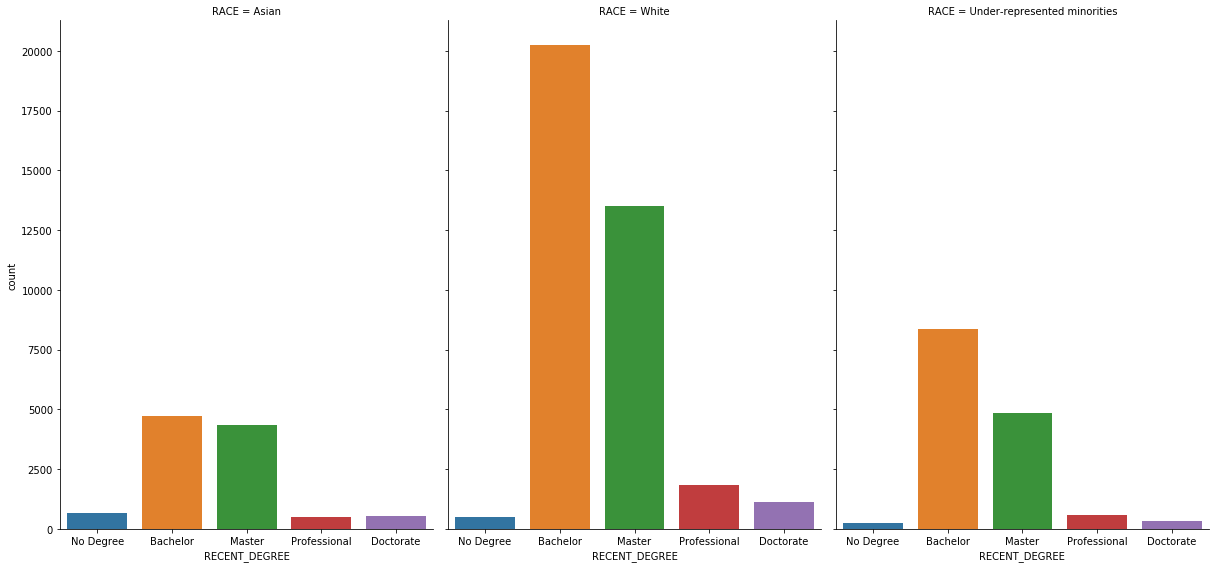

In [166]:
sns.catplot(x="RECENT_DEGREE", col="RACE",
               data=allnewdatanow, kind="count",
               height=8, aspect=.7)

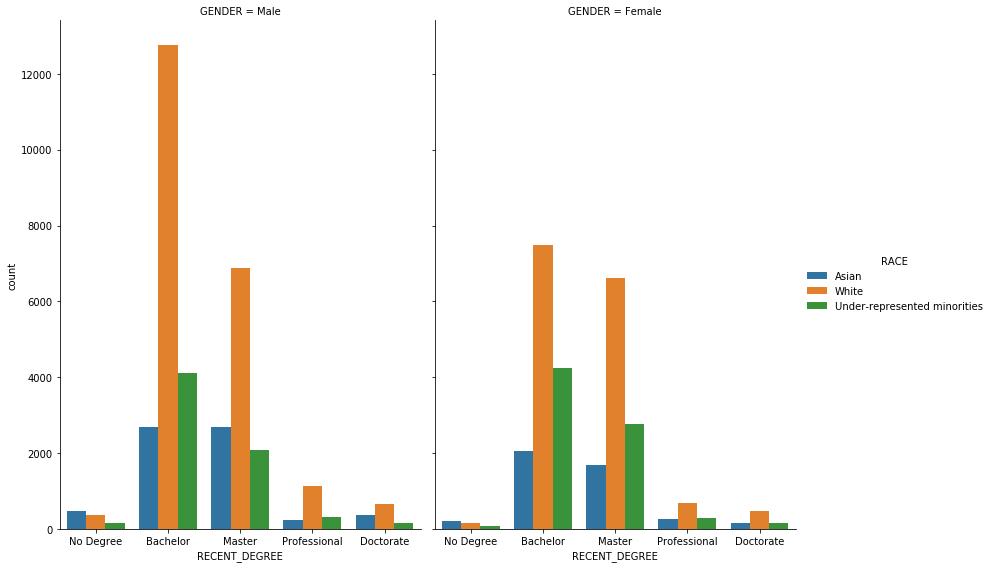

In [167]:
sns.catplot(x="RECENT_DEGREE", col="GENDER", hue = "RACE",
               data=allnewdatanow, kind="count",
               height=8, aspect=.7)

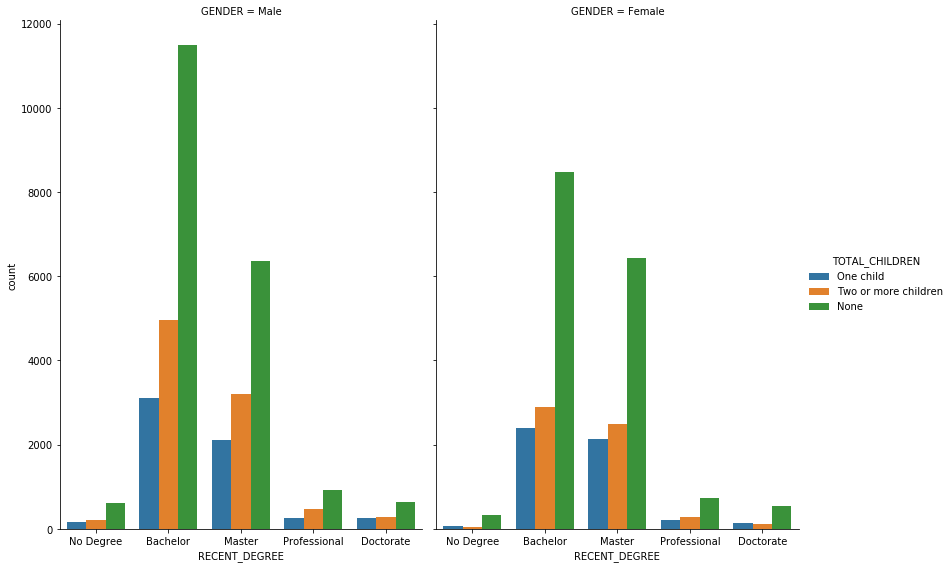

In [168]:
sns.catplot(x="RECENT_DEGREE", col="GENDER", hue = "TOTAL_CHILDREN",
               data=allnewdatanow, kind="count",
               height=8, aspect=.7)

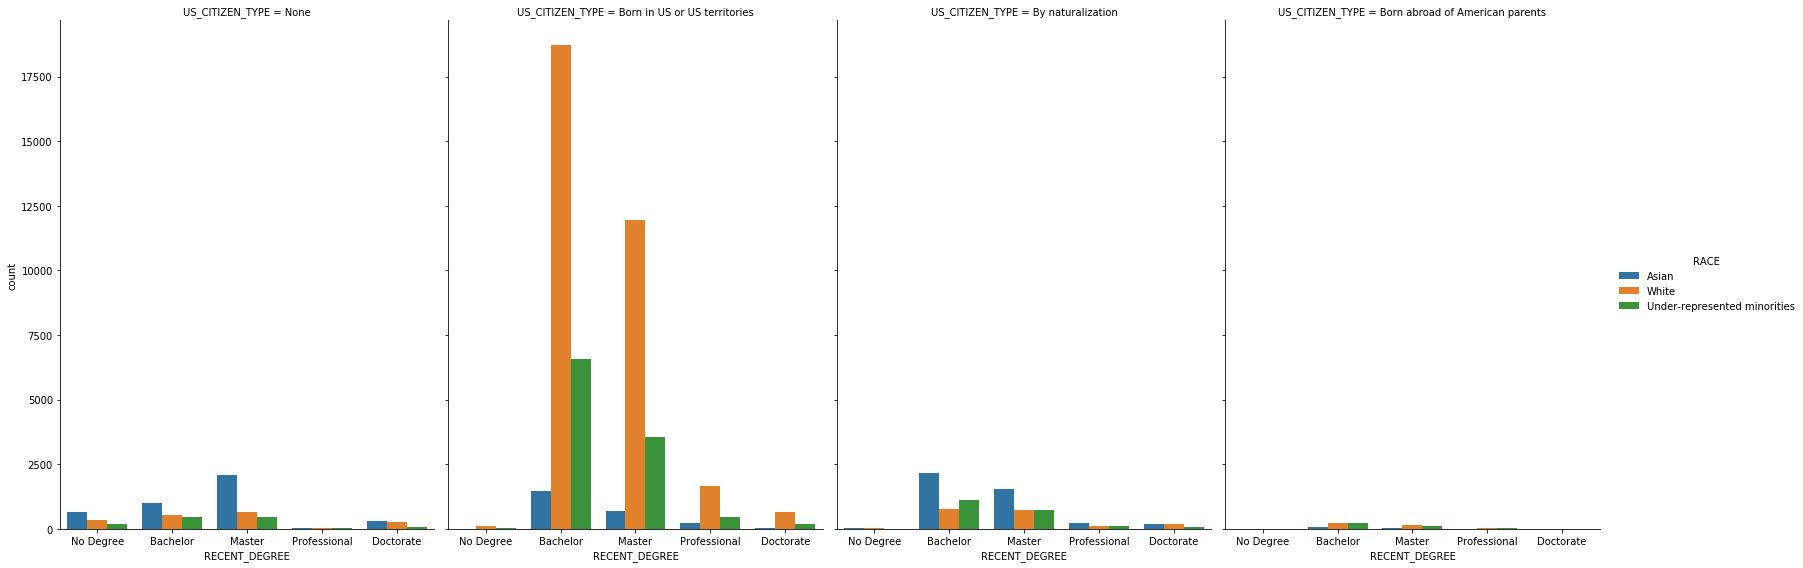

In [169]:
sns.catplot(x="RECENT_DEGREE", col="US_CITIZEN_TYPE", hue = "RACE",
               data=allnewdatanow, kind="count",
               height=8, aspect=.7)

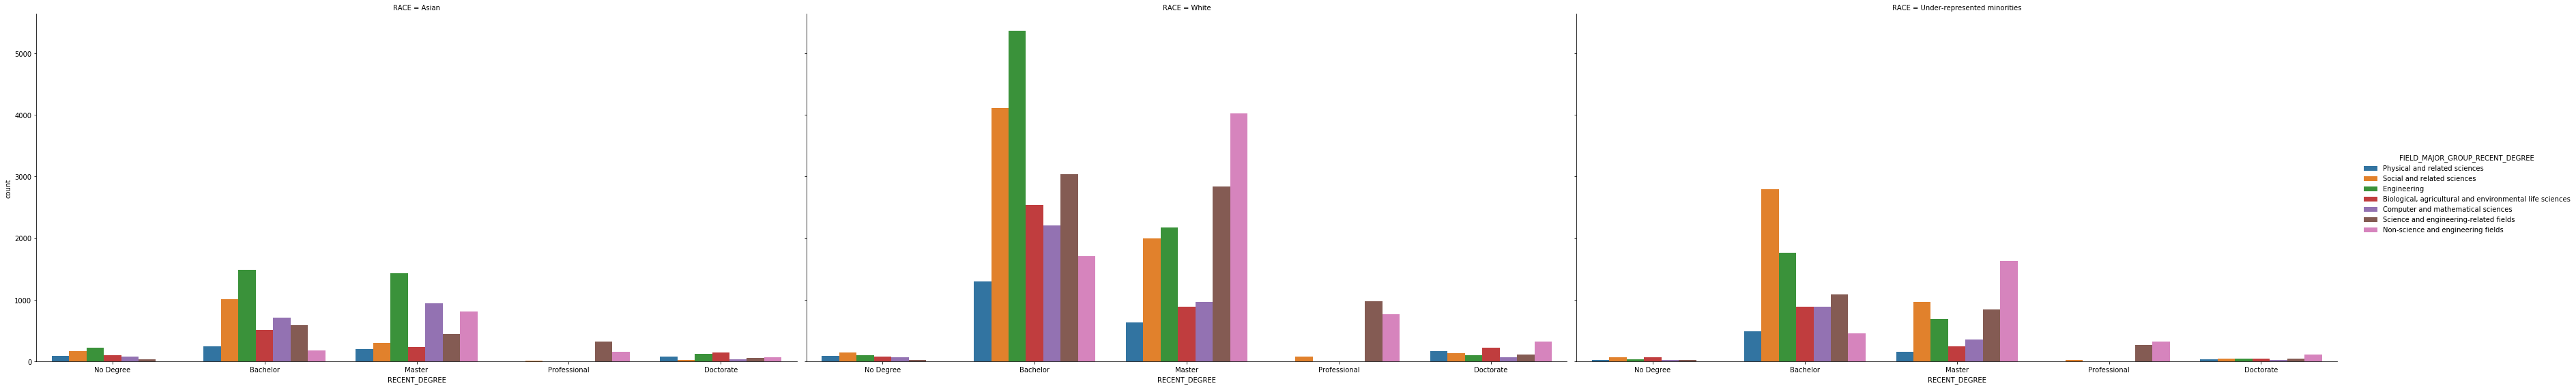

In [170]:
sns.catplot(x="RECENT_DEGREE", col = "RACE", hue = "FIELD_MAJOR_GROUP_RECENT_DEGREE",
               data=allnewdatanow, kind="count",
               height=8, aspect=2)

In [171]:
allnewdatanowvd_vs = allnewdatanow[allnewdatanow.SATISFACTION_JOB.isin(["Very satisfied","Very dissatisfied"])]

In [172]:
allnewdatanowvd_vs

,REFID,YEAR,AGE,GENDER,RACE,BIRTH_PLACE,US_CITIZENSHIP,US_CITIZEN_TYPE,TOTAL_CHILDREN,FIELD_MAJOR_GROUP_BACHELOR_DEGREE,HIGHEST_DEGREE,FIELD_MAJOR_HIGHEST_DEGREE,FIELD_MAJOR_GROUP_HIGHEST_DEGREE,RECENT_DEGREE,FIELD_MAJOR_RECENT_DEGREE,FIELD_MAJOR_GROUP_RECENT_DEGREE,REASON_EDUCATION_ADVANCE_OPPORTUNITIES,REASON_EDUCATION_BEFORE_CAREER,REASON_EDUCATION_CHANGE_CAREER,REASON_EDUCATION_PERSONAL,REASON_EDUCATION_CERIFICATION,REASON_EDUCATION_BY_EMPLOYER,REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD,REASON_EDUCATION_PAID_BY_EMPLOYER,HOURS_WORKED,WEEKS_WORKED,HAVE_HEALTH_CARE,HAVE_PENSION,HAVE_PROFIT_SHARE,HAVE_VACATION,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE,PRINCIPAL_POSITION,PRINCIPAL_MAJOR_GROUP,EMPLOYER_SECTOR,EMPLOYER_SIZE,EMPLOYER_NEW_BUSINESS,EMPLOYER_GOVERNMENT,EMPLOYER_EDUCATION,EMPLOYER_FEDERAL_SUPPORT,EMPLOYER_DEFENSE,EMPLOYER_ENERGY,FEDERAL_HEALTH_SERVICES,FEDERAL_NIH,FEDERAL_NSF,FEDERAL_OTHER,WORK_ACTIVITY,WORK_ACTIVITY_SUM,WORK_ACTIVITY_SECOND,WORK_ACTIVITY_SCEOND_SUM,COMPUTER,DEVELOPMENT_AND_DESIGN,MANAGEMENT_SALES,RESEARCH_AND_DEVELOPMENT,RESEARCH_DEVE_TEACHING,ACTIVITY_RESEARCH,ACTIVITY_TEACHING,WORK_DEVELOPMENT,WORK_DESIGN,WORK_EMPLOYEE_RELATIONS,WORK_MANAGEMENT_ADMIN,WORK_OTHER,WORK_PRODUCTION,WORK_QUALITY_MANAGEMENT,WORK_SALES_MARKETING,WORK_PROFESSIONAL_SERVICES,WORK_TEACHING,WORK_FINANCE,WORK_APPLIED_RESEARCH,WORK_RESEARCH,WORK_COMPUTER_APPLICATIONS,SUPERVISORY_WORK,MEMEBERSHIP,ATTENED_PROFESSIONAL_MEET,WORK_OUTSIDE_DEGREE_FOR_FIRST_REASON,WORK_OUTSIDE_DEGREE_FOR_SECOND_REASON,WORK_OUTSIDE_DEGREE_FOR_CAREER_CHANGE,WORK_OUTSIDE_DEGREE_FOR_WORK_COND,WORK_OUTSIDE_DEGREE_FOR_FAMILY,WORK_OUTSIDE_DEGREE_FOR_LOC,WORK_OUTSIDE_DEGREE_FOR_NOT_AVAIL,WORK_OUTSIDE_DEGREE_FOR_OTHER,WORK_OUTSIDE_DEGREE_FOR_PAY_PROMOTE,SATISFACTION_JOB,SATISFACTION_JOB_ADVANCE,SATISFACTION_JOB_BENEFITS,SATISFACTION_JOB_CHALLENGE,SATISFACTION_JOB_INDEP,SATISFACTION_JOB_LOC,SATISFACTION_JOB_RESP,SATISFACTION_JOB_SALARY,SATISFACTION_JOB_SECURITY,SATISFACTION_JOB_CONTRIB_SOCIETY,ATTEND_TRAINING_WORK_RELATE,ATTEND_TRAINING,ATTEND_TRAINING_CHANGE_FIELD,ATTEND_TRAINING_BY_EMPLOYER,ATTEND_TRAINING_CERT,ATTEND_TRAINING_INCREASE_ADV_CUR,ATTEND_TRAINING_OTHER,ATTEND_TRAINING_PERSONAL,ATTEND_TRAINING_ACQUIRE_SKILL,AGE_BINS,SALARY_BINS
0,20901QY86,2010,37,Male,Asian,Not in the US,No,None,One child,Physical and related sciences,Doctorate,Physics and astronomy,Physical and related sciences,No Degree,Physics and astronomy,Physical and related sciences,No,No,No,No,No,No,No,No,36 - 40 hours,40-52 weeks,Yes,Yes,No,Yes,Closely related,Physicists and astronomers,Physical and related scientists,4 year college or medical institution,100-499 employees,No,No,No,No,No,No,No,No,No,No,Applied research,Research and Development,Management and Administration,Management and Administration,No,No,Yes,Yes,Yes,Yes,No,No,No,No,Yes,No,No,No,No,Yes,Yes,No,No,Yes,No,Yes,3 memberships,Yes,No,No,No,No,No,No,No,No,No,Very satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Very satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,No,Other,No,No,No,No,No,No,No,"(30, 40]","(79999, 80000]"
1,20902AN23,2013,44,Male,White,Not in the US,No,None,Two or more children,Physical and related sciences,Doctorate,Other physical and related sciences,Physical and related sciences,No Degree,NaN,Physical and related sciences,No,No,No,No,No,No,No,No,Greater than 40 hours,40-52 weeks,Yes,Yes,No,Yes,Closely related,Physicists and astronomers,Physical and related scientists,Non-US government,5000-24999 employees,No,No,No,No,No,No,No,No,No,No,Management and Administration,Management and Administration,"Computer applications, programming, systems de...",Research and Development,No,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No memberships,No,No,No,No,No,No,No,No,No,No,Very satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Somewhat satisfied,

# MODEL 

# NOT HAPPY EMPLOYEES MODEL

In [173]:
modelme = allnewdatanowvd_vs

In [174]:
modelme = modelme.drop('REFID', axis=1)
modelme = modelme.drop('AGE', axis=1)

In [175]:
modelme = modelme.drop('SALARY_BINS', axis=1)

In [176]:
modelme = modelme.drop('AGE_BINS', axis=1)

In [177]:
X = modelme.drop('SATISFACTION_JOB', axis=1)

In [178]:
y = modelme['SATISFACTION_JOB']

In [179]:
X = pd.get_dummies(X, prefix_sep='_', drop_first=False)

In [180]:
y = pd.get_dummies(y, prefix_sep='_', drop_first=False)

In [181]:
X.shape

(28206, 369)

In [182]:
y.shape

(28206, 2)

In [183]:
y.sample(5)

,Very dissatisfied,Very satisfied
67793,0,1
19263,0,1
17076,1,0
24544,0,1
57744,0,1


In [184]:
print(X.columns.values)

['YEAR' 'GENDER_Female' 'GENDER_Male' 'RACE_Asian'
 'RACE_Under-represented minorities' 'RACE_White'
 'BIRTH_PLACE_Not in the US' 'BIRTH_PLACE_United States'
 'US_CITIZENSHIP_No' 'US_CITIZENSHIP_Yes'
 'US_CITIZEN_TYPE_Born abroad of American parents'
 'US_CITIZEN_TYPE_Born in US or US territories'
 'US_CITIZEN_TYPE_By naturalization' 'US_CITIZEN_TYPE_None'
 'TOTAL_CHILDREN_None' 'TOTAL_CHILDREN_One child'
 'TOTAL_CHILDREN_Two or more children'
 'FIELD_MAJOR_GROUP_BACHELOR_DEGREE_Biological, agricultural and environmental life sciences'
 'FIELD_MAJOR_GROUP_BACHELOR_DEGREE_Computer and mathematical sciences'
 'FIELD_MAJOR_GROUP_BACHELOR_DEGREE_Engineering'
 'FIELD_MAJOR_GROUP_BACHELOR_DEGREE_Non-science and engineering fields'
 'FIELD_MAJOR_GROUP_BACHELOR_DEGREE_Physical and related sciences'
 'FIELD_MAJOR_GROUP_BACHELOR_DEGREE_Science and engineering-related fields'
 'FIELD_MAJOR_GROUP_BACHELOR_DEGREE_Social and related sciences'
 'HIGHEST_DEGREE_Bachelor' 'HIGHEST_DEGREE_Doctorate'
 'H

In [185]:
y.shape

(28206, 2)

In [186]:
#ysd = y['Somewhat dissatisfied']

In [187]:
#yss = y['Somewhat satisfied']

In [188]:
yvd = y['Very dissatisfied']

In [189]:
yvs = y['Very satisfied']

In [190]:
#X_train, X_test, y_sd_train, y_sd_test = train_test_split(X, ysd, test_size = 0.2)

In [191]:
#X_train, X_test, y_ss_train, y_ss_test = train_test_split(X, yss, test_size = 0.2)

In [192]:
X_train, X_test, y_vd_train, y_vd_test = train_test_split(X, yvd, test_size = 0.2)

In [193]:
X_train, X_test, y_vs_train, y_vs_test = train_test_split(X, yvs, test_size = 0.2)

[1.50748704e-03 1.48208624e-03 1.62160943e-03 8.98100015e-04
 1.46924716e-03 1.48863537e-03 1.10846321e-03 1.11222422e-03
 5.74527164e-04 5.38988847e-04 2.05508291e-04 9.08830048e-04
 9.58713111e-04 7.82673759e-04 1.63608351e-03 9.15664514e-04
 1.35046658e-03 8.21319441e-04 6.34668775e-04 6.87478549e-04
 8.48189111e-04 5.56869827e-04 8.13233318e-04 1.47511681e-03
 1.16726253e-03 5.55217972e-04 1.14426972e-03 6.47451939e-04
 4.99192189e-04 1.36538579e-04 1.37948096e-04 4.32716008e-04
 5.01291533e-04 4.25602442e-04 2.93085514e-04 8.80013791e-04
 5.11684964e-04 4.33052378e-04 4.74677043e-04 6.58939825e-04
 8.20692589e-04 4.91938545e-04 4.16342430e-04 4.62906588e-04
 1.38269959e-04 5.28932982e-04 7.90471064e-04 5.84335665e-04
 7.49414064e-04 4.97471859e-04 8.25818670e-04 9.84552029e-04
 5.24398894e-04 8.45911561e-04 1.05869732e-03 9.75436322e-04
 2.00930121e-04 1.16077442e-03 6.32368240e-04 6.33522191e-04
 5.22325710e-04 2.44088688e-04 2.67107407e-04 3.94468763e-04
 5.12655166e-04 3.046961

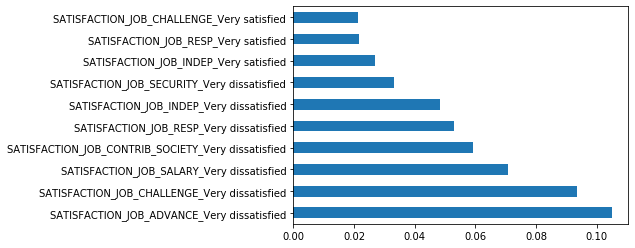

In [194]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
modelvd = RandomForestClassifier(n_estimators=100, random_state=1111)
modelvd.fit(X,yvd)
print(modelvd.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(modelvd.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()
for i in tqdm(range(50)):
    time.sleep(0.1)

In [195]:
print(X.columns.values)

['YEAR' 'GENDER_Female' 'GENDER_Male' 'RACE_Asian'
 'RACE_Under-represented minorities' 'RACE_White'
 'BIRTH_PLACE_Not in the US' 'BIRTH_PLACE_United States'
 'US_CITIZENSHIP_No' 'US_CITIZENSHIP_Yes'
 'US_CITIZEN_TYPE_Born abroad of American parents'
 'US_CITIZEN_TYPE_Born in US or US territories'
 'US_CITIZEN_TYPE_By naturalization' 'US_CITIZEN_TYPE_None'
 'TOTAL_CHILDREN_None' 'TOTAL_CHILDREN_One child'
 'TOTAL_CHILDREN_Two or more children'
 'FIELD_MAJOR_GROUP_BACHELOR_DEGREE_Biological, agricultural and environmental life sciences'
 'FIELD_MAJOR_GROUP_BACHELOR_DEGREE_Computer and mathematical sciences'
 'FIELD_MAJOR_GROUP_BACHELOR_DEGREE_Engineering'
 'FIELD_MAJOR_GROUP_BACHELOR_DEGREE_Non-science and engineering fields'
 'FIELD_MAJOR_GROUP_BACHELOR_DEGREE_Physical and related sciences'
 'FIELD_MAJOR_GROUP_BACHELOR_DEGREE_Science and engineering-related fields'
 'FIELD_MAJOR_GROUP_BACHELOR_DEGREE_Social and related sciences'
 'HIGHEST_DEGREE_Bachelor' 'HIGHEST_DEGREE_Doctorate'
 'H

In [196]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression
Selector_f = SelectPercentile (f_regression, percentile = 10)
Selector_f.fit(X, yvd)
for n, s in zip(X, Selector_f.scores_):
    print('F-score: %3.2f\t for feature %s ' %(s,n))

F-score: 10.98	 for feature YEAR 
F-score: 34.45	 for feature GENDER_Female 
F-score: 34.45	 for feature GENDER_Male 
F-score: 0.28	 for feature RACE_Asian 
F-score: 137.58	 for feature RACE_Under-represented minorities 
F-score: 110.92	 for feature RACE_White 
F-score: 0.10	 for feature BIRTH_PLACE_Not in the US 
F-score: 0.10	 for feature BIRTH_PLACE_United States 
F-score: 4.29	 for feature US_CITIZENSHIP_No 
F-score: 4.29	 for feature US_CITIZENSHIP_Yes 
F-score: 0.04	 for feature US_CITIZEN_TYPE_Born abroad of American parents 
F-score: 0.07	 for feature US_CITIZEN_TYPE_Born in US or US territories 
F-score: 4.65	 for feature US_CITIZEN_TYPE_By naturalization 
F-score: 4.29	 for feature US_CITIZEN_TYPE_None 
F-score: 100.81	 for feature TOTAL_CHILDREN_None 
F-score: 19.96	 for feature TOTAL_CHILDREN_One child 
F-score: 57.11	 for feature TOTAL_CHILDREN_Two or more children 
F-score: 2.98	 for feature FIELD_MAJOR_GROUP_BACHELOR_DEGREE_Biological, agricultural and environmental life

In [197]:
#yvd = y['very dissatisfied']

Xvd = X[['SATISFACTION_JOB_RESP_Somewhat satisfied',
'WORK_OUTSIDE_DEGREE_FOR_NOT_AVAIL_No',
'SATISFACTION_JOB_BENEFITS_Very dissatisfied',
'SATISFACTION_JOB_ADVANCE_Very dissatisfied',
'SATISFACTION_JOB_RESP_Very dissatisfied',
'SATISFACTION_JOB_CONTRIB_SOCIETY_Very dissatisfied',
'SATISFACTION_JOB_SECURITY_Very dissatisfied',
'SATISFACTION_JOB_INDEP_Very dissatisfied',
'SATISFACTION_JOB_SALARY_Very dissatisfied',
'SATISFACTION_JOB_CHALLENGE_Very dissatisfied']]

In [198]:
X_vdtrain, X_vdtest, y_vdtrain, y_vdtest = train_test_split(Xvd, yvd, test_size = 0.2, random_state =1111)

In [199]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_vdtrain = feature_scaler.fit_transform(X_vdtrain)
X_vdtest = feature_scaler.transform(X_vdtest)

In [200]:
from sklearn.ensemble import RandomForestClassifier
model_vd_new = RandomForestClassifier(n_estimators=100, random_state=1111)

In [201]:
model_vd_new

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1111,
                       verbose=0, warm_start=False)

In [202]:
model_vd_new.fit(X_vdtrain, y_vdtrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1111,
                       verbose=0, warm_start=False)

In [203]:
y_predict_vd = model_vd_new.predict(X_vdtest)

In [204]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
accuracy_score(y_vdtest, y_predict_vd)

0.9794399149237859

In [205]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_vdtest, y_predict_vd))
print(classification_report(y_vdtest, y_predict_vd))

[[5273   43]
 [  73  253]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5316
           1       0.85      0.78      0.81       326

    accuracy                           0.98      5642
   macro avg       0.92      0.88      0.90      5642
weighted avg       0.98      0.98      0.98      5642



# NOT HAPPY GRIDSEARCHCV

# NOT HAPPY RANDOMIZEDSEARCHCV

In [206]:
from sklearn.model_selection import RandomizedSearchCV

In [207]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [208]:
# Create the random grid
random_gridvd = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [209]:
pprint(random_gridvd)

Pretty printing has been turned OFF


In [210]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfvd = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_randomvd = RandomizedSearchCV(estimator = rfvd, param_distributions = random_gridvd, n_iter = 100, cv = 5, verbose=2, random_state=1111, n_jobs = -1)
# Fit the random search model
rf_randomvd.fit(X_vdtrain, y_vdtrain)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 35.6min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [211]:
rf_randomvd.best_params_

{'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': True}

In [212]:
bestparamsfromrandomvd = rf_randomvd.best_params_

In [213]:
def evaluate(model_vd_new, X_vdtest, y_vdtest):
    predictions = model_vd_new.predict(X_vdtest)
    errors = abs(predictions - y_vdtest)
    mape = 100 * np.mean(errors / y_vdtest)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_modelvd = RandomForestClassifier(n_estimators = 10, random_state = 1111)
base_modelvd.fit(X_vdtrain, y_vdtrain)
#base_accuracyvd = evaluate(base_modelvd, X_vdtest, y_vdtest)
#base_accuracyvd = eval(base_modelvd, X_vdtest, y_vdtest)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1111,
                       verbose=0, warm_start=False)

In [214]:
#bestparamsfromrandomvdbest_randomvd = rf_randomvd.best_estimator_
#random_accuracyvd = evaluate(best_randomvd, X_vdtest, y_vdtest)
#random_accuracyvd = eval(best_randomvd, X_vdtest, y_vdtest)

In [215]:
#( 100 * (random_accuracyvd - base_accuracyvd) / base_accuracyvd))

# NOT HAPPY GRIDSEARCHCV

In [216]:
from sklearn.model_selection import GridSearchCV

In [217]:
grid_search_cv_vd = GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1111,
                       verbose=0, warm_start=False),
                       param_grid={'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']},
                       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
                       scoring=None, verbose=0)
                       

In [218]:
grid_search_cv_vd.fit(X_vdtrain, y_vdtrain)

GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=1111, verbose=0,
                                              warm_start=False),
             iid='warn', n_jobs=

In [219]:
grid_search_cv_vd.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1111,
                       verbose=0, warm_start=False)

In [220]:
print(grid_search_cv_vd.best_score_)

0.9826271937599717


In [221]:
print(grid_search_cv_vd.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 500}


In [222]:
my_modelvd = grid_search_cv_vd.best_estimator_

In [223]:
my_modelvd

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1111,
                       verbose=0, warm_start=False)

In [224]:
my_modelvd.fit(X_vdtrain, y_vdtrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1111,
                       verbose=0, warm_start=False)

In [225]:
y_predict_vd_my_model = my_modelvd.predict(X_vdtest)

In [226]:
accuracy_score(y_vdtest, y_predict_vd_my_model)

0.9806806097128677

In [227]:
print(confusion_matrix(y_vdtest, y_predict_vd_my_model))
print(classification_report(y_vdtest, y_predict_vd_my_model))

[[5280   36]
 [  73  253]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5316
           1       0.88      0.78      0.82       326

    accuracy                           0.98      5642
   macro avg       0.93      0.88      0.91      5642
weighted avg       0.98      0.98      0.98      5642



In [288]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_vdtest, y_predict_vd_my_model))
print('Mean Squared Error:', metrics.mean_squared_error(y_vdtest, y_predict_vd_my_model))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_vdtest, y_predict_vd_my_model)))

Mean Absolute Error: 3.3057426444523217
Mean Squared Error: 0.019319390287132223
Root Mean Squared Error: 0.138994209545334


In [228]:
from sklearn.datasets import *
from sklearn import tree
from dtreeviz.trees import *
from graphviz import Digraph
from graphviz import Graph

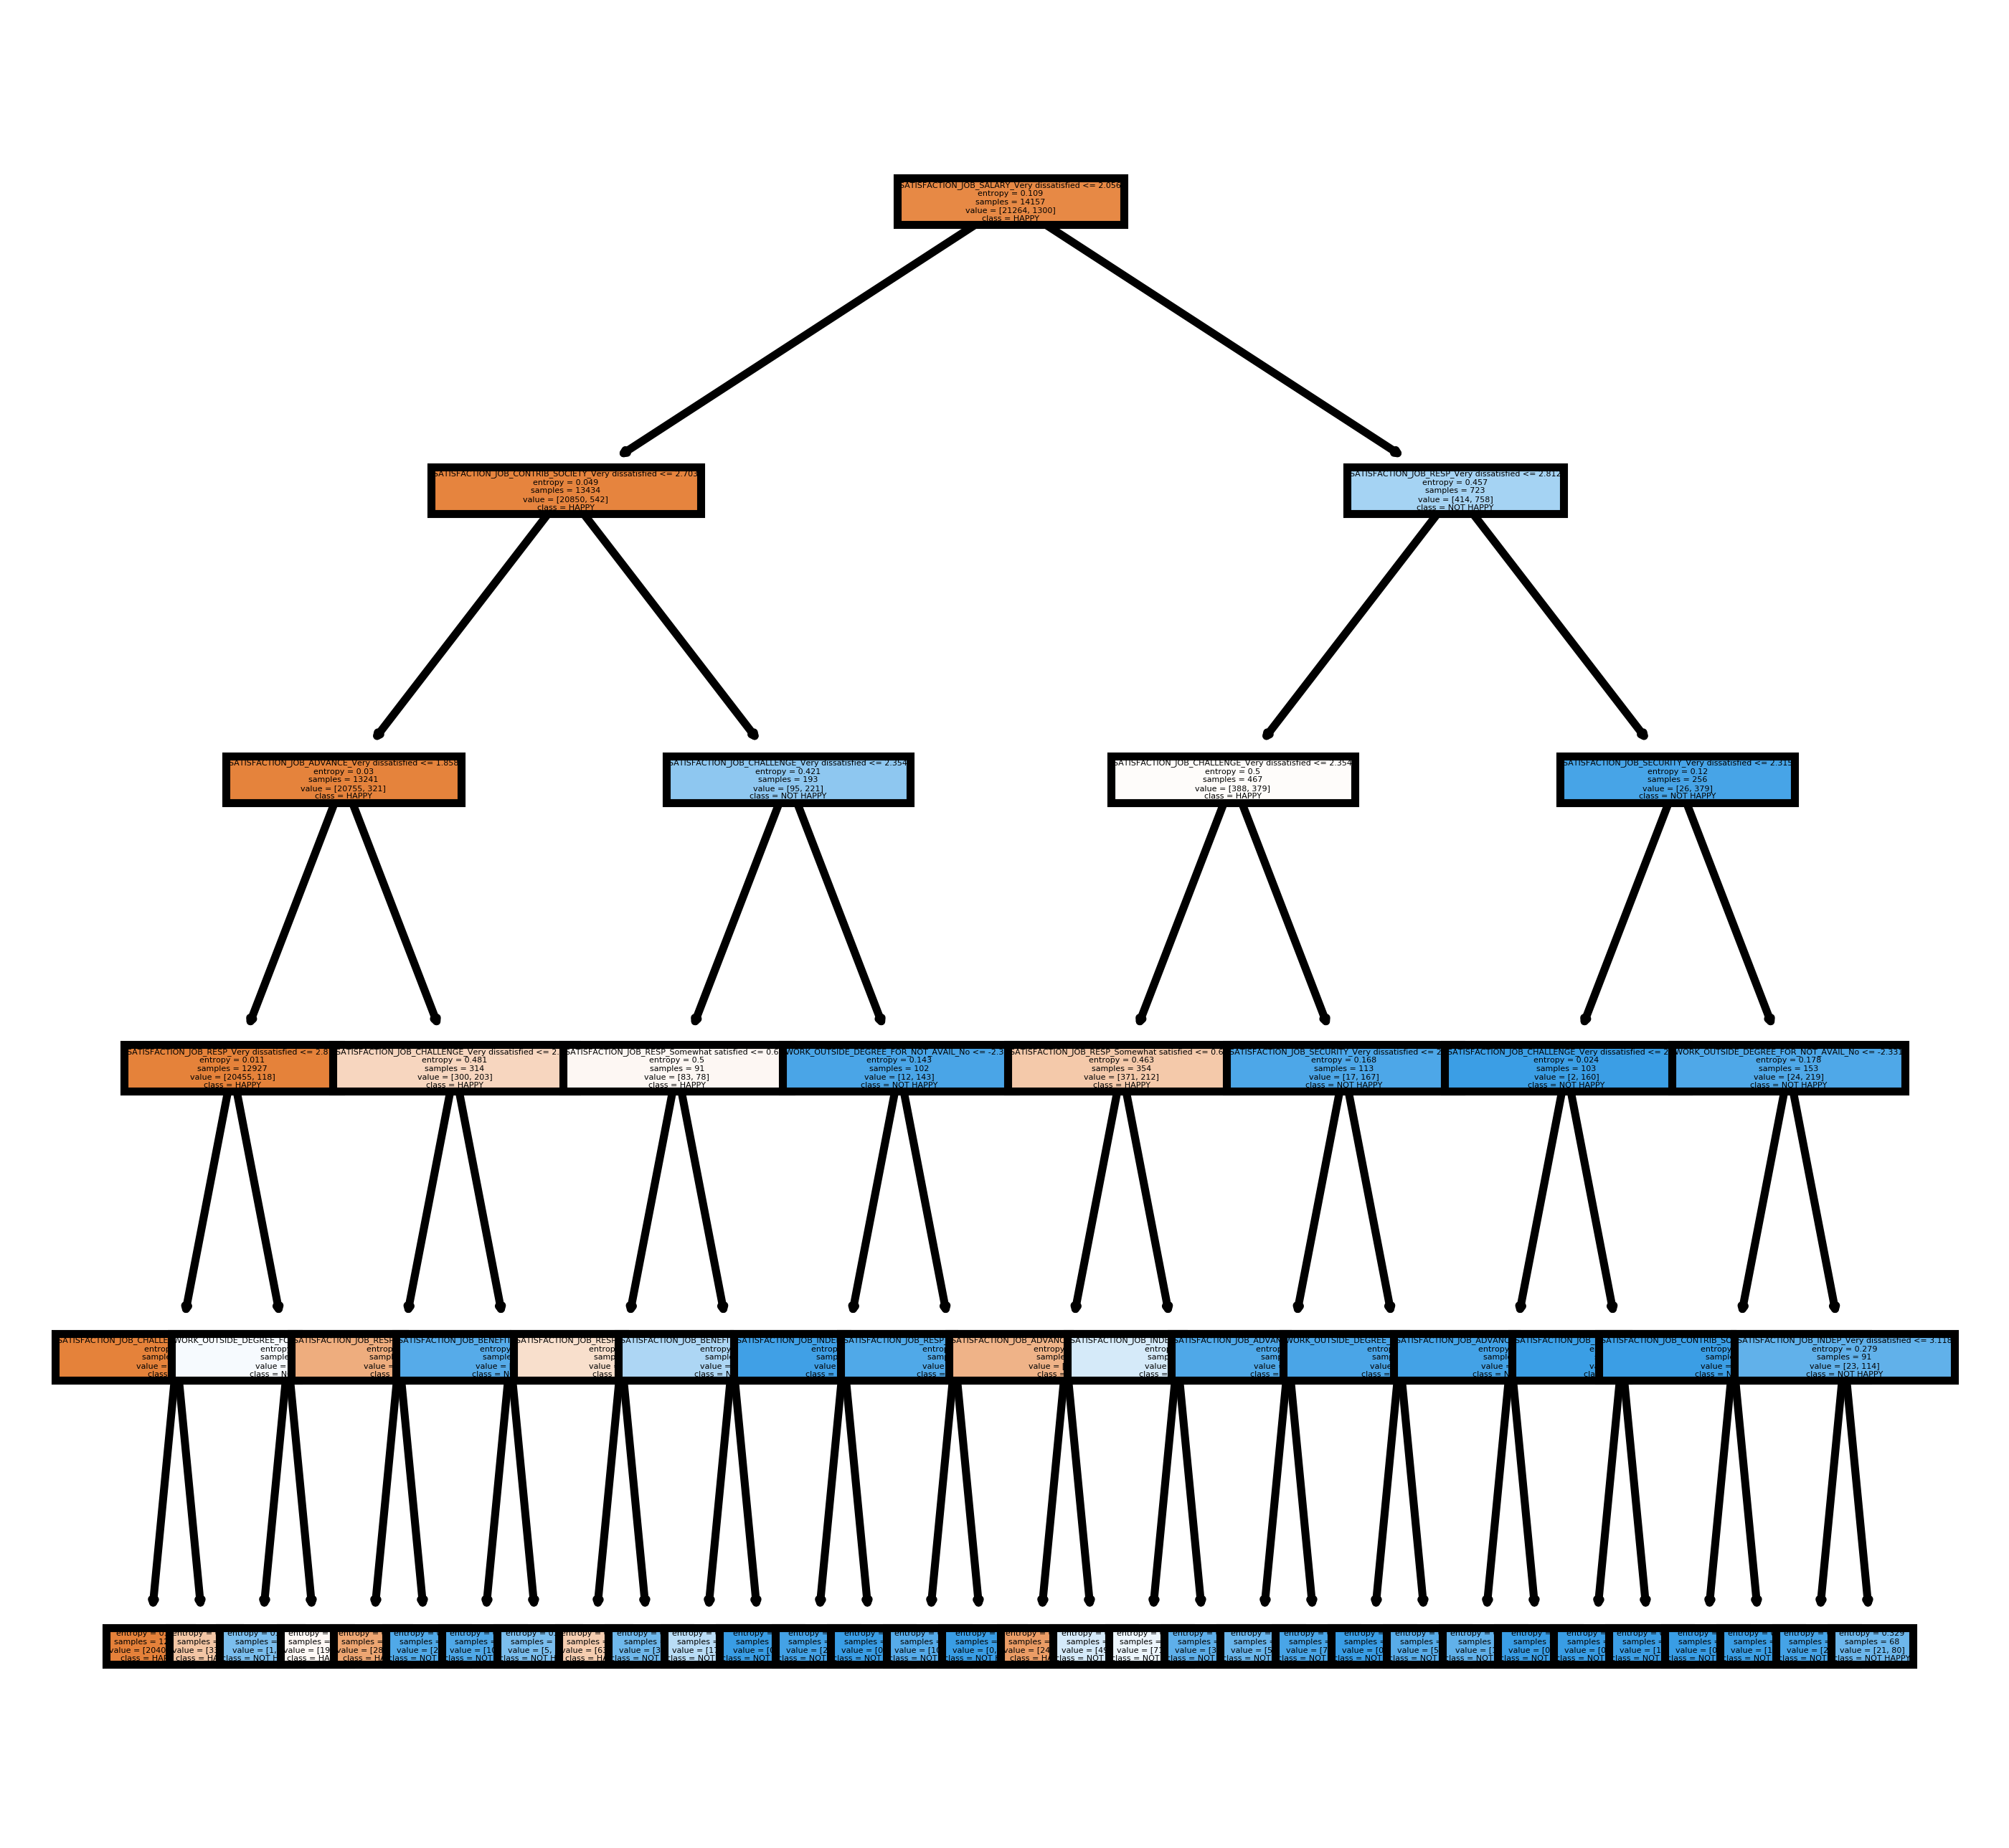

In [291]:
import graphviz
feature_namesvd = ['SATISFACTION_JOB_RESP_Somewhat satisfied',
'WORK_OUTSIDE_DEGREE_FOR_NOT_AVAIL_No',
'SATISFACTION_JOB_BENEFITS_Very dissatisfied',
'SATISFACTION_JOB_ADVANCE_Very dissatisfied',
'SATISFACTION_JOB_RESP_Very dissatisfied',
'SATISFACTION_JOB_CONTRIB_SOCIETY_Very dissatisfied',
'SATISFACTION_JOB_SECURITY_Very dissatisfied',
'SATISFACTION_JOB_INDEP_Very dissatisfied',
'SATISFACTION_JOB_SALARY_Very dissatisfied',
'SATISFACTION_JOB_CHALLENGE_Very dissatisfied']
target_namesvd = ['HAPPY','NOT HAPPY']


fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(my_modelvd.estimators_[0],
               feature_names = feature_namesvd, 
               class_names=target_namesvd,
               filled = True);
fig.savefig('rf_individualtreenothappy.png')

# HAPPY EMPLOYEES MODEL

In [230]:
modelmenew = allnewdatanowvd_vs

In [231]:
modelmenew = modelmenew.drop('REFID', axis=1)
modelmenew = modelmenew.drop('AGE', axis=1)

In [232]:
modelmenew = modelmenew.drop('SALARY_BINS', axis=1)

In [233]:
modelmenew = modelmenew.drop('AGE_BINS', axis=1)

In [234]:
X = modelmenew.drop('SATISFACTION_JOB', axis=1)

In [235]:
y = modelmenew['SATISFACTION_JOB']

In [236]:
X = pd.get_dummies(X, prefix_sep='_', drop_first=False)

In [237]:
y = pd.get_dummies(y, prefix_sep='_', drop_first=False)

In [238]:
X.shape

(28206, 369)

In [239]:
y.shape

(28206, 2)

In [240]:
y.sample(5)

,Very dissatisfied,Very satisfied
49212,0,1
47113,0,1
68001,0,1
65696,0,1
63839,0,1


In [241]:
print(X.columns.values)

['YEAR' 'GENDER_Female' 'GENDER_Male' 'RACE_Asian'
 'RACE_Under-represented minorities' 'RACE_White'
 'BIRTH_PLACE_Not in the US' 'BIRTH_PLACE_United States'
 'US_CITIZENSHIP_No' 'US_CITIZENSHIP_Yes'
 'US_CITIZEN_TYPE_Born abroad of American parents'
 'US_CITIZEN_TYPE_Born in US or US territories'
 'US_CITIZEN_TYPE_By naturalization' 'US_CITIZEN_TYPE_None'
 'TOTAL_CHILDREN_None' 'TOTAL_CHILDREN_One child'
 'TOTAL_CHILDREN_Two or more children'
 'FIELD_MAJOR_GROUP_BACHELOR_DEGREE_Biological, agricultural and environmental life sciences'
 'FIELD_MAJOR_GROUP_BACHELOR_DEGREE_Computer and mathematical sciences'
 'FIELD_MAJOR_GROUP_BACHELOR_DEGREE_Engineering'
 'FIELD_MAJOR_GROUP_BACHELOR_DEGREE_Non-science and engineering fields'
 'FIELD_MAJOR_GROUP_BACHELOR_DEGREE_Physical and related sciences'
 'FIELD_MAJOR_GROUP_BACHELOR_DEGREE_Science and engineering-related fields'
 'FIELD_MAJOR_GROUP_BACHELOR_DEGREE_Social and related sciences'
 'HIGHEST_DEGREE_Bachelor' 'HIGHEST_DEGREE_Doctorate'
 'H

In [242]:
y.shape

(28206, 2)

In [243]:
#ysd = y['Somewhat dissatisfied']

In [244]:
#yss = y['Somewhat satisfied']

In [245]:
yvd = y['Very dissatisfied']

In [246]:
yvs = y['Very satisfied']

In [247]:
#X_train, X_test, y_sd_train, y_sd_test = train_test_split(X, ysd, test_size = 0.2)

In [248]:
#X_train, X_test, y_ss_train, y_sd_test = train_test_split(X, yss, test_size = 0.2)

In [249]:
X_train, X_test, y_vd_train, y_sd_test = train_test_split(X, yvd, test_size = 0.2)

In [250]:
X_train, X_test, y_vs_train, y_sd_test = train_test_split(X, yvs, test_size = 0.2)

[1.50748704e-03 1.48208624e-03 1.62160943e-03 8.98100015e-04
 1.46924716e-03 1.48863537e-03 1.10846321e-03 1.11222422e-03
 5.74527164e-04 5.38988847e-04 2.05508291e-04 9.08830048e-04
 9.58713111e-04 7.82673759e-04 1.63608351e-03 9.15664514e-04
 1.35046658e-03 8.21319441e-04 6.34668775e-04 6.87478549e-04
 8.48189111e-04 5.56869827e-04 8.13233318e-04 1.47511681e-03
 1.16726253e-03 5.55217972e-04 1.14426972e-03 6.47451939e-04
 4.99192189e-04 1.36538579e-04 1.37948096e-04 4.32716008e-04
 5.01291533e-04 4.25602442e-04 2.93085514e-04 8.80013791e-04
 5.11684964e-04 4.33052378e-04 4.74677043e-04 6.58939825e-04
 8.20692589e-04 4.91938545e-04 4.16342430e-04 4.62906588e-04
 1.38269959e-04 5.28932982e-04 7.90471064e-04 5.84335665e-04
 7.49414064e-04 4.97471859e-04 8.25818670e-04 9.84552029e-04
 5.24398894e-04 8.45911561e-04 1.05869732e-03 9.75436322e-04
 2.00930121e-04 1.16077442e-03 6.32368240e-04 6.33522191e-04
 5.22325710e-04 2.44088688e-04 2.67107407e-04 3.94468763e-04
 5.12655166e-04 3.046961

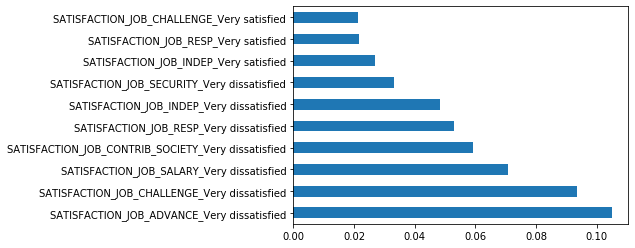

In [251]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
modelvs = RandomForestClassifier(n_estimators=100, random_state=1111)
modelvs.fit(X,yvs)
print(modelvs.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(modelvs.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()
for i in tqdm(range(50)):
    time.sleep(0.1)

In [252]:
print(X.columns.values)

['YEAR' 'GENDER_Female' 'GENDER_Male' 'RACE_Asian'
 'RACE_Under-represented minorities' 'RACE_White'
 'BIRTH_PLACE_Not in the US' 'BIRTH_PLACE_United States'
 'US_CITIZENSHIP_No' 'US_CITIZENSHIP_Yes'
 'US_CITIZEN_TYPE_Born abroad of American parents'
 'US_CITIZEN_TYPE_Born in US or US territories'
 'US_CITIZEN_TYPE_By naturalization' 'US_CITIZEN_TYPE_None'
 'TOTAL_CHILDREN_None' 'TOTAL_CHILDREN_One child'
 'TOTAL_CHILDREN_Two or more children'
 'FIELD_MAJOR_GROUP_BACHELOR_DEGREE_Biological, agricultural and environmental life sciences'
 'FIELD_MAJOR_GROUP_BACHELOR_DEGREE_Computer and mathematical sciences'
 'FIELD_MAJOR_GROUP_BACHELOR_DEGREE_Engineering'
 'FIELD_MAJOR_GROUP_BACHELOR_DEGREE_Non-science and engineering fields'
 'FIELD_MAJOR_GROUP_BACHELOR_DEGREE_Physical and related sciences'
 'FIELD_MAJOR_GROUP_BACHELOR_DEGREE_Science and engineering-related fields'
 'FIELD_MAJOR_GROUP_BACHELOR_DEGREE_Social and related sciences'
 'HIGHEST_DEGREE_Bachelor' 'HIGHEST_DEGREE_Doctorate'
 'H

In [253]:
#Xvs = X[['SATISFACTION_JOB_RESP_Somewhat satisfied','SATISFACTION_JOB_BENEFITS_Very satisfied','SATISFACTION_JOB_SECURITY_Very satisfied','SATISFACTION_JOB_CHALLENGE_Very satisfied','SATISFACTION_JOB_ADVANCE_Very satisfied','SATISFACTION_JOB_CONTRIB_SOCIETY_Very satisfied','SATISFACTION_JOB_SALARY_Very satisfied','SATISFACTION_JOB_INDEP_Very satisfied','SATISFACTION_JOB_RESP_Very satisfied']] 
Xvs = X[['SATISFACTION_JOB_SECURITY_Very satisfied','SATISFACTION_JOB_CHALLENGE_Very satisfied','SATISFACTION_JOB_ADVANCE_Very satisfied','SATISFACTION_JOB_CONTRIB_SOCIETY_Very satisfied','SATISFACTION_JOB_SALARY_Very satisfied','SATISFACTION_JOB_INDEP_Very satisfied','SATISFACTION_JOB_RESP_Very satisfied']] 

In [254]:
X_vstrain, X_vstest, y_vstrain, y_vstest = train_test_split(Xvs, yvs, test_size = 0.2, random_state =1111)

In [255]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_vstrain = feature_scaler.fit_transform(X_vstrain)
X_vstest = feature_scaler.transform(X_vstest)

In [256]:
from sklearn.ensemble import RandomForestClassifier
model_vs_new = RandomForestClassifier(n_estimators=100, random_state=1111)

In [257]:
model_vs_new

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1111,
                       verbose=0, warm_start=False)

In [258]:
model_vs_new.fit(X_vstrain, y_vstrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1111,
                       verbose=0, warm_start=False)

In [259]:
y_predict_vs = model_vs_new.predict(X_vstest)

In [260]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
accuracy_score(y_vstest, y_predict_vs)

0.9624246721020915

In [261]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_vstest, y_predict_vs))
print(classification_report(y_vstest, y_predict_vs))

[[ 203  123]
 [  89 5227]]
              precision    recall  f1-score   support

           0       0.70      0.62      0.66       326
           1       0.98      0.98      0.98      5316

    accuracy                           0.96      5642
   macro avg       0.84      0.80      0.82      5642
weighted avg       0.96      0.96      0.96      5642



# HAPPY RANDOMIZEDSEARCHCV

In [262]:
from sklearn.model_selection import RandomizedSearchCV

In [263]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [264]:
# Create the random grid
random_gridvs = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [265]:
pprint(random_gridvs)

Pretty printing has been turned ON


In [266]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfvs = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_randomvs = RandomizedSearchCV(estimator = rfvs, param_distributions = random_gridvs, n_iter = 100, cv = 5, verbose=2, random_state=1111, n_jobs = -1)
# Fit the random search model
rf_randomvs.fit(X_vstrain, y_vstrain)
#model_vs_new
#X_vstrain, X_vstest, y_vstrain, y_vstest

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 31.1min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [267]:
rf_randomvs.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': False}

In [268]:
def evaluate(model_vs_new, X_vstest, y_vstest):
    predictions = model_vs_new.predict(X_vstest)
    errors = abs(predictions - y_vstest)
    mape = 100 * np.mean(errors / y_vstest)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_modelvs = RandomForestClassifier(n_estimators = 10, random_state = 1111)
base_modelvs.fit(X_vstrain, y_vstrain)
#base_accuracyvs = evaluate(base_modelvs, X_vstest, y_vstest)
#base_accuracyvs = eval(base_modelvs, X_vstest, y_vstest)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1111,
                       verbose=0, warm_start=False)

In [269]:
rf_randomvs.best_estimator_
#random_accuracyvs = evaluate(best_randomvs, X_vstest, y_vstest)
#random_accuracyvs = eval(best_randomvs, X_vstest, y_vstest)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=100, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [270]:
#print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracyvs - base_accuracyvs) / base_accuracyvs))

# HAPPY GRIDSEARCHCV

In [271]:
from sklearn.model_selection import GridSearchCV

In [272]:
grid_search_cv_vs = GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1111,
                       verbose=0, warm_start=False),
                       param_grid={'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']},
                       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
                       scoring=None, verbose=0)

In [273]:
grid_search_cv_vs.fit(X_vstrain, y_vstrain)

GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=1111, verbose=0,
                                              warm_start=False),
             iid='warn', n_jobs=

In [274]:
grid_search_cv_vs.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=1111,
                       verbose=0, warm_start=False)

In [275]:
print(grid_search_cv_vs.best_score_)

0.9618861903917745


In [276]:
print(grid_search_cv_vs.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}


In [277]:
my_modelvs = grid_search_cv_vs.best_estimator_

In [278]:
my_modelvs

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=1111,
                       verbose=0, warm_start=False)

In [279]:
my_modelvs.fit(X_vstrain, y_vstrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=1111,
                       verbose=0, warm_start=False)

In [280]:
y_predict_vs_my_model = my_modelvs.predict(X_vstest)

In [281]:
accuracy_score(y_vstest, y_predict_vs_my_model)

0.9624246721020915

In [282]:
print(confusion_matrix(y_vstest, y_predict_vs_my_model))
print(classification_report(y_vstest, y_predict_vs_my_model))

[[ 203  123]
 [  89 5227]]
              precision    recall  f1-score   support

           0       0.70      0.62      0.66       326
           1       0.98      0.98      0.98      5316

    accuracy                           0.96      5642
   macro avg       0.84      0.80      0.82      5642
weighted avg       0.96      0.96      0.96      5642



In [287]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_vstest, y_predict_vs_my_model))
print('Mean Squared Error:', metrics.mean_squared_error(y_vstest, y_predict_vs_my_model))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_vstest, y_predict_vs_my_model)))

Mean Absolute Error: 4.044310528181496
Mean Squared Error: 0.037575327897908545
Root Mean Squared Error: 0.19384356553135454


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=1111,
                       verbose=0, warm_start=False)


In [283]:
from sklearn.datasets import *
from sklearn import tree
from dtreeviz.trees import *
from graphviz import Digraph
from graphviz import Graph

In [284]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

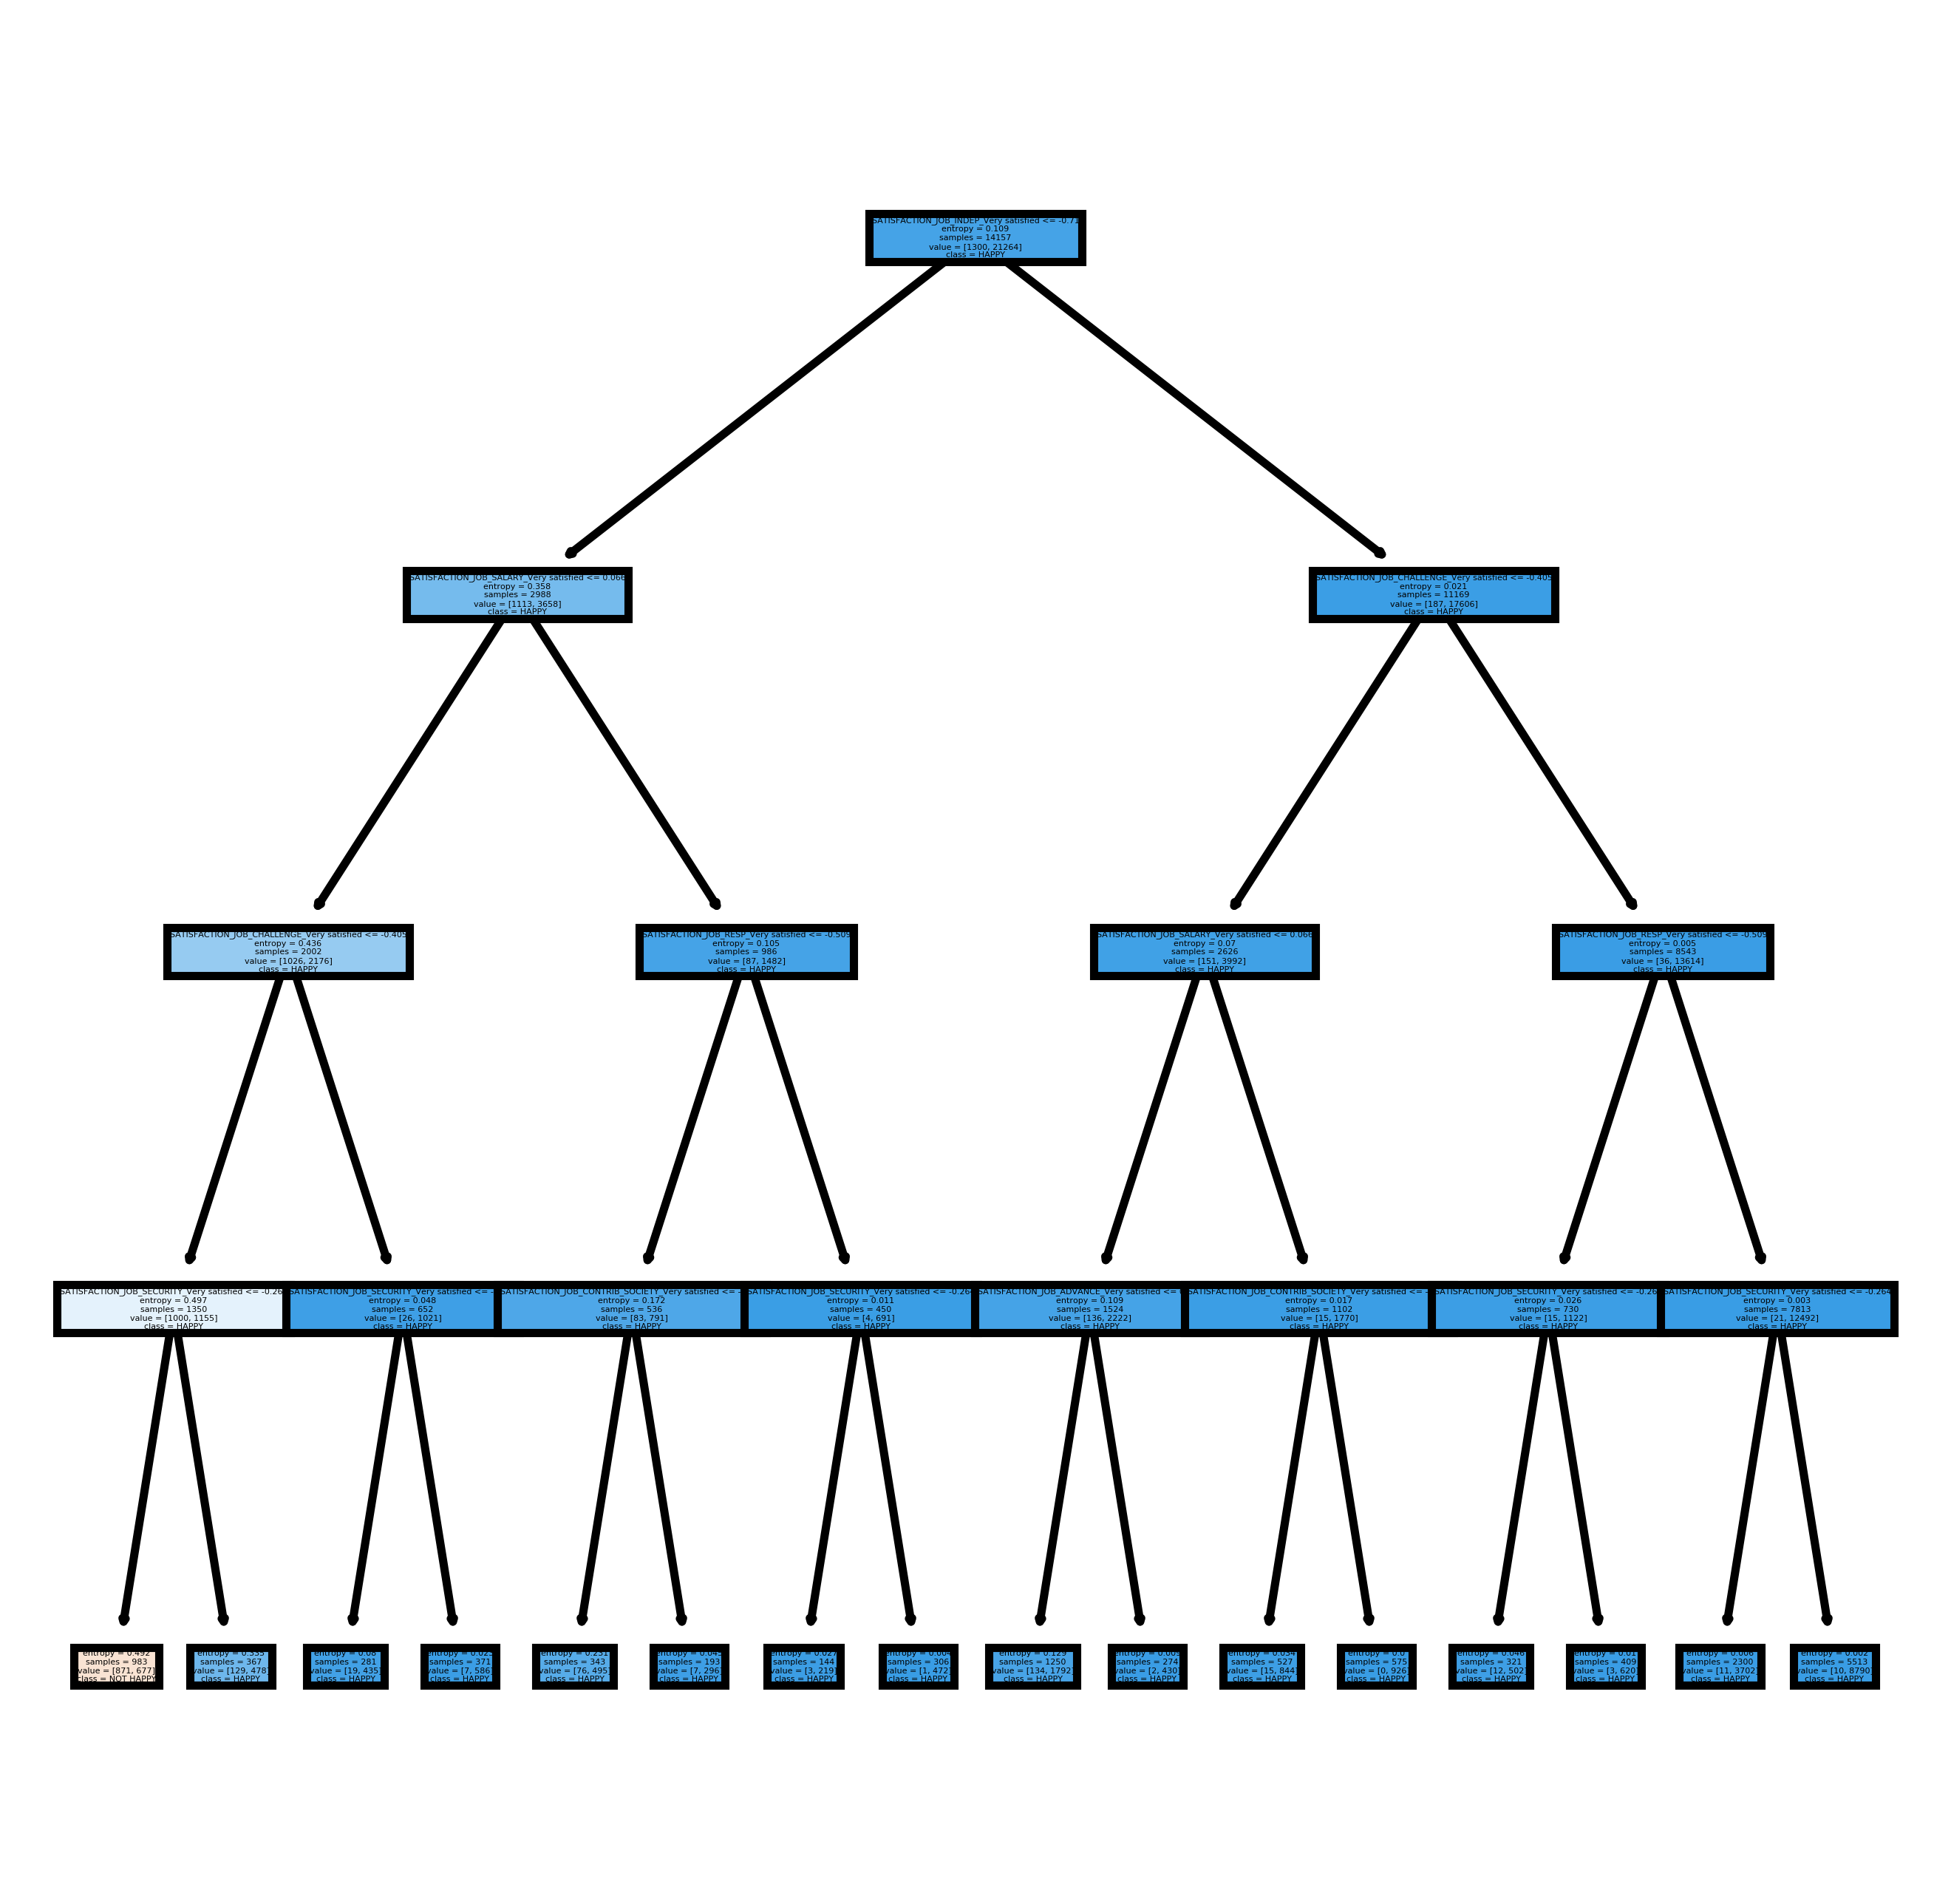

In [285]:
import graphviz
feature_namesvs = ['SATISFACTION_JOB_SECURITY_Very satisfied',
                   'SATISFACTION_JOB_CHALLENGE_Very satisfied',
                   'SATISFACTION_JOB_ADVANCE_Very satisfied',
                   'SATISFACTION_JOB_CONTRIB_SOCIETY_Very satisfied',
                   'SATISFACTION_JOB_SALARY_Very satisfied',
                   'SATISFACTION_JOB_INDEP_Very satisfied',
                   'SATISFACTION_JOB_RESP_Very satisfied']

target_namesvs = ['NOT HAPPY','HAPPY']





fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(my_modelvs.estimators_[0],
               feature_names = feature_namesvs, 
               class_names=target_namesvs,
               filled = True);
fig.savefig('rf_individualtreehappy.png')